In [1]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.data.download_data import *
from src.data.read_data import read_b_data
from src.features.landuse import *
import pyproj

import scrapy
from scrapy.crawler import CrawlerProcess
from twisted.internet import reactor
import scrapy
from scrapy.crawler import CrawlerRunner
from crochet import setup

from src.features.map_dataset import MapDataset
from src.visualization.mapper import *

from shapely.geometry import Polygon, MultiPoint, Point, MultiPolygon
from scipy.stats import poisson, gamma, nbinom
plt.rcParams.update({'font.size': 16})

In [4]:
url = 'http://service.nso.go.th/nso/web/statseries/statseries09.html'

url3 = 'http://service.nso.go.th/nso/web/statseries/statseries01.html'

In [3]:
data_folder = '../data/nso_data/'
report_folder = '../reports/map/'
pm_folder = '../data/pm25/'

In [9]:
res = requests.get(url)
# create a soup object of Berkeley earth website
soup = BeautifulSoup(res.text, features="lxml")

In [12]:
table_list = []
for link in soup.find_all('a'):
    if 'tables' in link.get('href'):
        table_list.append(link.get('href'))
        
for link in tqdm(table_list):
    dl_url = header_url + link
    name = '_'.join(link.split('/')[1:])
    filename = data_folder + name
    try:
        wget.download(dl_url, filename)
    except:
        pass

In [3]:
header_url = 'http://service.nso.go.th/nso/web/statseries/'

In [ ]:
url = 'http://service.nso.go.th/nso/web/statseries/statseries09.html'


data_folder_labor = '../data/nso_data/health/'

res = requests.get(url)
# create a soup object of Berkeley earth website
soup = BeautifulSoup(res.text, features="lxml")

table_list = []
for link in soup.find_all('a'):
    if 'tables' in link.get('href'):
        table_list.append(link.get('href'))
        
table_list.reverse()

for link in tqdm(table_list):
    dl_url = header_url + link
    name = '_'.join(link.split('/')[1:])
    filename = data_folder_labor + name
    if not os.path.exists(filename):
        try:
            wget.download(dl_url, filename)
        except:
            pass

  0%|                                                                                                                               | 0/326 [00:00<?, ?it/s]

 85% [..................................................................            ] 32768 / 38400

  0%|‚ñé                                                                                                                      | 1/326 [00:01<08:20,  1.54s/it]

 64% [.................................................                             ] 24576 / 38400

  1%|‚ñã                                                                                                                      | 2/326 [00:02<08:00,  1.48s/it]

 64% [.................................................                             ] 24576 / 38400

  1%|‚ñà                                                                                                                      | 3/326 [00:04<07:46,  1.44s/it]

100% [..............................................................................] 38400 / 38400

  1%|‚ñà‚ñç                                                                                                                     | 4/326 [00:05<07:37,  1.42s/it]

100% [..............................................................................] 38400 / 38400

  2%|‚ñà‚ñä                                                                                                                     | 5/326 [00:10<13:14,  2.47s/it]

 64% [.................................................                             ] 24576 / 38400

  2%|‚ñà‚ñà‚ñè                                                                                                                    | 6/326 [00:12<13:04,  2.45s/it]

 85% [..................................................................            ] 32768 / 38400

  2%|‚ñà‚ñà‚ñå                                                                                                                    | 7/326 [00:25<29:45,  5.60s/it]

 85% [..................................................................            ] 32768 / 38400

  2%|‚ñà‚ñà‚ñâ                                                                                                                    | 8/326 [00:27<22:58,  4.33s/it]

 64% [.................................................                             ] 24576 / 38400

  3%|‚ñà‚ñà‚ñà‚ñé                                                                                                                   | 9/326 [00:28<18:05,  3.42s/it]

 85% [..................................................................            ] 32768 / 38400

  3%|‚ñà‚ñà‚ñà‚ñå                                                                                                                  | 10/326 [00:36<25:27,  4.83s/it]

 92% [........................................................................      ] 32768 / 35328

  3%|‚ñà‚ñà‚ñà‚ñâ                                                                                                                  | 11/326 [00:44<29:41,  5.66s/it]

 64% [.................................................                             ] 24576 / 38400

  4%|‚ñà‚ñà‚ñà‚ñà‚ñé                                                                                                                 | 12/326 [00:49<28:12,  5.39s/it]

 64% [.................................................                             ] 24576 / 38400

  4%|‚ñà‚ñà‚ñà‚ñà‚ñã                                                                                                                 | 13/326 [00:50<21:48,  4.18s/it]

 43% [.................................                                             ] 16384 / 37888

  4%|‚ñà‚ñà‚ñà‚ñà‚ñà                                                                                                                 | 14/326 [00:51<17:03,  3.28s/it]

 61% [................................................                              ] 24576 / 39936

  5%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                                                                                | 15/326 [00:57<20:46,  4.01s/it]

 43% [.................................                                             ] 16384 / 37888

  5%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                                                                                | 16/326 [00:58<16:38,  3.22s/it]

 87% [....................................................................          ] 32768 / 37376

  5%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                                                                               | 17/326 [01:00<14:17,  2.77s/it]

 64% [..................................................                            ] 24576 / 37888

  6%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                                                                               | 18/326 [01:03<14:35,  2.84s/it]

 88% [.....................................................................         ] 32768 / 36864

  6%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                                                                               | 19/326 [01:04<12:29,  2.44s/it]

 43% [.................................                                             ] 16384 / 37888

  6%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                                                                              | 20/326 [01:06<10:53,  2.14s/it]

 43% [.................................                                             ] 16384 / 37888

  6%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                                                                              | 21/326 [01:07<09:23,  1.85s/it]

 86% [...................................................................           ] 32768 / 37888

  7%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                                                                              | 22/326 [01:11<13:06,  2.59s/it]

 64% [..................................................                            ] 24576 / 37888

  7%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                                                                             | 23/326 [01:13<11:27,  2.27s/it]

 80% [..............................................................                ] 32768 / 40960

  7%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                                                                             | 24/326 [01:14<10:13,  2.03s/it]

 86% [...................................................................           ] 32768 / 37888

  8%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                                                                             | 25/326 [01:19<14:28,  2.89s/it]

 64% [..................................................                            ] 24576 / 37888

  8%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                                                                            | 26/326 [01:23<16:17,  3.26s/it]

 43% [.................................                                             ] 16384 / 37888

  8%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                                                                            | 27/326 [01:25<13:22,  2.68s/it]

 86% [...................................................................           ] 32768 / 37888

  9%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                                                                           | 28/326 [01:36<25:32,  5.14s/it]

 64% [..................................................                            ] 24576 / 37888

  9%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                                                                           | 29/326 [01:37<20:05,  4.06s/it]

 43% [.................................                                             ] 16384 / 37888

  9%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                                                                           | 30/326 [01:40<18:48,  3.81s/it]

 65% [...................................................                           ] 24576 / 37376

 10%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                                                                          | 31/326 [01:42<15:19,  3.12s/it]

 64% [..................................................                            ] 24576 / 37888

 10%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                                                                          | 32/326 [01:43<13:02,  2.66s/it]

 86% [...................................................................           ] 32768 / 37888

 10%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                                                                        | 33/326 [03:08<2:13:15, 27.29s/it]

 86% [...................................................................           ] 32768 / 37888

 10%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                                                                        | 34/326 [03:14<1:42:04, 20.98s/it]

 64% [..................................................                            ] 24576 / 37888

 11%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                                                                       | 35/326 [03:16<1:13:32, 15.16s/it]

 86% [...................................................................           ] 32768 / 37888

 11%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                                                                         | 36/326 [03:19<56:06, 11.61s/it]

 86% [...................................................................           ] 32768 / 37888

 11%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                                                                        | 37/326 [03:28<51:06, 10.61s/it]

 65% [...................................................                           ] 24576 / 37376

 12%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                                                                        | 38/326 [03:29<37:34,  7.83s/it]

 64% [..................................................                            ] 24576 / 37888

 12%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                                                                        | 39/326 [03:41<44:01,  9.20s/it]

 86% [...................................................................           ] 32768 / 37888

 12%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                                                                       | 40/326 [03:45<35:48,  7.51s/it]

 86% [...................................................................           ] 32768 / 37888

 13%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                                                                       | 41/326 [03:46<27:09,  5.72s/it]

 86% [...................................................................           ] 32768 / 37888

 13%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                                                                      | 42/326 [03:48<21:03,  4.45s/it]

 76% [...........................................................                   ] 32768 / 43008

 13%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                                                                      | 43/326 [03:50<17:02,  3.61s/it]

 75% [..........................................................                    ] 32768 / 43520

 13%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                                                                      | 44/326 [03:52<15:24,  3.28s/it]

 87% [....................................................................          ] 32768 / 37376

 14%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                                                                     | 45/326 [03:54<13:12,  2.82s/it]

 87% [....................................................................          ] 32768 / 37376

 14%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                                                                     | 46/326 [03:56<11:34,  2.48s/it]

 76% [...........................................................                   ] 32768 / 43008

 14%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                                                                     | 47/326 [03:57<10:14,  2.20s/it]

 43% [.................................                                             ] 16384 / 37888

 15%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                                                                    | 48/326 [03:59<09:42,  2.10s/it]

 64% [..................................................                            ] 24576 / 37888

 15%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                                                                    | 49/326 [04:00<08:46,  1.90s/it]

 75% [..........................................................                    ] 32768 / 43520

 15%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                                                                    | 50/326 [04:05<13:01,  2.83s/it]

 87% [....................................................................          ] 32768 / 37376

 16%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                                                                   | 51/326 [04:26<37:24,  8.16s/it]

 86% [...................................................................           ] 32768 / 37888

 16%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                                                                   | 52/326 [04:34<37:07,  8.13s/it]

 94% [.........................................................................     ] 40960 / 43520

 16%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                                                                  | 53/326 [04:42<36:30,  8.02s/it]

 76% [...........................................................                   ] 32768 / 43008

 17%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                                                                  | 54/326 [04:44<27:48,  6.13s/it]

 85% [..................................................................            ] 32768 / 38400

 17%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                                                                  | 55/326 [04:45<21:36,  4.78s/it]

 75% [..........................................................                    ] 32768 / 43520

 17%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                                                                 | 56/326 [04:47<17:26,  3.88s/it]

 85% [..................................................................            ] 32768 / 38400

 17%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                                                                 | 57/326 [05:01<30:32,  6.81s/it]

 56% [............................................                                  ] 24576 / 43520

 18%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                                                                 | 58/326 [05:08<30:43,  6.88s/it]

 75% [..........................................................                    ] 32768 / 43520

 18%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                                                                | 59/326 [05:14<29:55,  6.72s/it]

 38% [.............................                                                 ] 16384 / 43008

 18%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                                                                | 60/326 [05:15<22:50,  5.15s/it]

 94% [.........................................................................     ] 40960 / 43520

 19%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                                                                | 61/326 [05:17<17:43,  4.01s/it]

 43% [..................................                                            ] 16384 / 37376

 19%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                                                               | 62/326 [05:18<14:15,  3.24s/it]

 64% [.................................................                             ] 24576 / 38400

 19%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                                                               | 63/326 [05:21<13:59,  3.19s/it]

 86% [...................................................................           ] 32768 / 37888

 20%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                                                              | 64/326 [05:26<16:19,  3.74s/it]

 75% [..........................................................                    ] 32768 / 43520

 20%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                                                              | 65/326 [05:32<18:21,  4.22s/it]

 64% [.................................................                             ] 24576 / 38400

 20%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                                                              | 66/326 [05:33<14:30,  3.35s/it]

 75% [..........................................................                    ] 32768 / 43520

In [ ]:
url2 = 'http://service.nso.go.th/nso/web/statseries/statseries03.html'

data_folder_labor = '../data/nso_data/labor/'

res = requests.get(url2)
# create a soup object of Berkeley earth website
soup = BeautifulSoup(res.text, features="lxml")

table_list = []
for link in soup.find_all('a'):
    if 'tables' in link.get('href'):
        table_list.append(link.get('href'))
        
for link in tqdm(table_list):
    dl_url = header_url + link
    name = '_'.join(link.split('/')[1:])
    filename = data_folder_labor + name
    if not os.path.exists(filename):
        try:
            wget.download(dl_url, filename)
        except:
            pass

In [ ]:
url3 = 'http://service.nso.go.th/nso/web/statseries/statseries01.html'

data_folder  = '../data/nso_data/population/'

res = requests.get(url3)
# create a soup object of Berkeley earth website
soup = BeautifulSoup(res.text, features="lxml")

table_list = []
for link in soup.find_all('a'):
    if 'tables' in link.get('href'):
        table_list.append(link.get('href'))
        
for link in tqdm(table_list):
    dl_url = header_url + link
    name = '_'.join(link.split('/')[1:])
    filename = data_folder + name
    
    try:
        wget.download(dl_url, filename)
    except:
        pass

In [ ]:
url4 = 'http://service.nso.go.th/nso/web/statseries/statseries11.html'

data_folder  = '../data/nso_data/income/'

res = requests.get(url3)
# create a soup object of Berkeley earth website
soup = BeautifulSoup(res.text, features="lxml")

table_list = []
for link in soup.find_all('a'):
    if 'tables' in link.get('href'):
        table_list.append(link.get('href'))
        
for link in tqdm(table_list):
    dl_url = header_url + link
    name = '_'.join(link.split('/')[1:])
    filename = data_folder + name
    
    try:
        wget.download(dl_url, filename)
    except:
        pass

In [ ]:
url5 = 'http://service.nso.go.th/nso/web/statseries/statseries14.html'

data_folder  = '../data/nso_data/landuse/'

res = requests.get(url3)
# create a soup object of Berkeley earth website
soup = BeautifulSoup(res.text, features="lxml")

table_list = []
for link in soup.find_all('a'):
    if 'tables' in link.get('href'):
        table_list.append(link.get('href'))
        
for link in tqdm(table_list):
    dl_url = header_url + link
    name = '_'.join(link.split('/')[1:])
    filename = data_folder + name
    
    try:
        wget.download(dl_url, filename)
    except:
        pass

In [ ]:
url6 = 'http://service.nso.go.th/nso/web/statseries/statseries16.html'

data_folder  = '../data/nso_data/industry/'
os.makedir(data_folder)

res = requests.get(url3)
# create a soup object of Berkeley earth website
soup = BeautifulSoup(res.text, features="lxml")

table_list = []
for link in soup.find_all('a'):
    if 'tables' in link.get('href'):
        table_list.append(link.get('href'))
        
for link in tqdm(table_list):
    dl_url = header_url + link
    name = '_'.join(link.split('/')[1:])
    filename = data_folder + name
    
    try:
        wget.download(dl_url, filename)
    except:
        pass

In [2]:
url_list = ['http://service.nso.go.th/nso/web/statseries/statseries16.html', 
            'http://service.nso.go.th/nso/web/statseries/statseries14.html', 
            'http://service.nso.go.th/nso/web/statseries/statseries11.html',
            'http://service.nso.go.th/nso/web/statseries/statseries01.html',
            'http://service.nso.go.th/nso/web/statseries/statseries03.html',
            'http://service.nso.go.th/nso/web/statseries/statseries09.html'
           ]


folder_list = ['../data/nso_data/industry/', 
              '../data/nso_data/landuse/', 
              '../data/nso_data/income/', 
              '../data/nso_data/population/',
              '../data/nso_data/labor/', '../data/nso_data/health/']

In [8]:
url_folder_tuple = []
header_url = 'http://service.nso.go.th/nso/web/statseries/'

for url, folder in tqdm(zip(url_list, folder_list)):
    if not os.path.exists(folder):
        os.mkdir(folder)
    res = requests.get(url)
    # create a soup object of Berkeley earth website
    soup = BeautifulSoup(res.text, features="lxml")
    
    table_len = 0 
    
    for link in soup.find_all('a'):
        if 'tables' in link.get('href'):
            dl_url =   link.get('href')
            name = '_'.join(dl_url.split('/')[1:])
            filename = folder + name
            url_folder_tuple.append([header_url + dl_url, filename])
            table_len += 1
            
    print(url, folder, table_len)

1it [00:01,  1.44s/it]

http://service.nso.go.th/nso/web/statseries/statseries16.html ../data/nso_data/industry/ 83


2it [00:02,  1.45s/it]

http://service.nso.go.th/nso/web/statseries/statseries14.html ../data/nso_data/landuse/ 161


3it [00:04,  1.49s/it]

http://service.nso.go.th/nso/web/statseries/statseries11.html ../data/nso_data/income/ 5


4it [00:06,  1.54s/it]

http://service.nso.go.th/nso/web/statseries/statseries01.html ../data/nso_data/population/ 168


5it [00:08,  1.66s/it]

http://service.nso.go.th/nso/web/statseries/statseries03.html ../data/nso_data/labor/ 328


6it [00:09,  1.62s/it]

http://service.nso.go.th/nso/web/statseries/statseries09.html ../data/nso_data/health/ 326


In [2]:
def download_url(arr):
    
    download_url = arr[0]
    filename = arr[1]
    
    if not os.path.exists(filename):
        try:
            wget.download(download_url, filename)
        except:
            pass
    

In [6]:
download_url(url_folder_tuple[50])

100% [..............................................................................] 28672 / 28672

In [5]:
np.random.shuffle(url_folder_tuple)

In [6]:
Parallel(n_jobs=-1)(delayed(download_url)(arr=arr) for arr in tqdm(url_folder_tuple))


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1071/1071 [02:45<00:00,  6.49it/s]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# New Links

In [8]:
url_list = ['http://statbbi.nso.go.th/staticreport/page/sector/th/01.aspx',
            'http://statbbi.nso.go.th/staticreport/page/sector/th/02.aspx',
            'http://statbbi.nso.go.th/staticreport/page/sector/th/05.aspx',
            'http://statbbi.nso.go.th/staticreport/page/sector/th/07.aspx',
            'http://statbbi.nso.go.th/staticreport/page/sector/th/08.aspx',
            'http://statbbi.nso.go.th/staticreport/page/sector/th/11.aspx',
            'http://statbbi.nso.go.th/staticreport/page/sector/th/21.aspx'
           ]

head_folder = '../data/nso_data/'
folder_list = [head_folder + 'pop1/', 
              head_folder + 'labor1/',
              head_folder + 'health1/',
              head_folder + 'proverty1/',
              head_folder + 'income1/',
              head_folder + 'agri1/', 
               head_folder + 'resource/']

In [9]:
url_folder_tuple = []
header_url = 'http://statbbi.nso.go.th/staticreport/'

for url, folder in tqdm(zip(url_list, folder_list)):
    if not os.path.exists(folder):
        os.mkdir(folder)
    res = requests.get(url)
    # create a soup object of Berkeley earth website
    soup = BeautifulSoup(res.text, features="lxml")
    
    table_len = 0 
    
    for link in soup.find_all('a'):
        if '../../../' in link.get('href'):
            dl_url =   link.get('href')
            dl_url = dl_url.replace('../../../', '')
            name = '_'.join(dl_url.split('/')[1:])
            filename = folder + name
            url_folder_tuple.append([header_url + dl_url, filename])
            table_len += 1
            
    print(url, folder, table_len)

1it [00:00,  1.02it/s]

http://statbbi.nso.go.th/staticreport/page/sector/th/01.aspx ../data/nso_data/pop1/ 40


2it [00:01,  1.02it/s]

http://statbbi.nso.go.th/staticreport/page/sector/th/02.aspx ../data/nso_data/labor1/ 22


3it [00:02,  1.06it/s]

http://statbbi.nso.go.th/staticreport/page/sector/th/05.aspx ../data/nso_data/health1/ 21


4it [00:03,  1.13it/s]

http://statbbi.nso.go.th/staticreport/page/sector/th/07.aspx ../data/nso_data/proverty1/ 3


5it [00:04,  1.19it/s]

http://statbbi.nso.go.th/staticreport/page/sector/th/08.aspx ../data/nso_data/income1/ 10


6it [00:04,  1.26it/s]

http://statbbi.nso.go.th/staticreport/page/sector/th/11.aspx ../data/nso_data/agri1/ 13


7it [00:05,  1.17it/s]

http://statbbi.nso.go.th/staticreport/page/sector/th/21.aspx ../data/nso_data/resource/ 30


In [10]:
np.random.shuffle(url_folder_tuple)

In [ ]:
Parallel(n_jobs=-1)(delayed(download_url)(arr=arr) for arr in tqdm(url_folder_tuple))


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                | 100/139 [00:25<00:10,  3.65it/s]

# Explore Health Data

In [3]:
data_folder = '../data/nso_data/'

In [120]:
income1 = pd.read_excel(data_folder + 'income_prov/income.xlsx')
income1.columns = income1.iloc[1]
income1 = income1.iloc[2:, 1:]
income1 = income1.set_index('‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î')
# convert year to Christian year
income1.columns = income1.columns.astype(int) - 543
income1 = income1.dropna()
income1 = income1[[2017, 2019]].reset_index()

In [124]:
income2 = pd.read_excel(data_folder + 'income_prov/income1.xls')
income2.set_index('‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏ï‡πà‡∏≠‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏ï‡πà‡∏≠‡∏Ñ‡∏£‡∏±‡∏ß‡πÄ‡∏£‡∏∑‡∏≠‡∏ô ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡∏†‡∏≤‡∏Ñ ‡πÅ‡∏•‡∏∞‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î ‡∏û.‡∏®. 2541 - 2558')
income2.columns = income2.iloc[3]
income2 = income2.iloc[5:]

thainame = income2.iloc[:, 0].dropna().values
thainame = [ s.rstrip().lstrip() for s in thainame]

income2 = income2.iloc[:, 2:]
income2.columns = income2.columns.dropna().to_list() + ['province'] 
income2 = income2.set_index('province')
income2.columns = income2.columns.astype(int)
income2 = income2.dropna(how='all')

income2['thaiprov'] = thainame[:-2]
income2 = income2.reset_index()
 

In [125]:
income2.head()

province     1998     2000     2002     2004     2006     2007  \
0     Whole Kingdom  12492.0  12150.0  13736.0  14963.0  17787.0  18660.0   
1   Greater Bangkok  24929.0  25242.0  28239.0  28135.0  33088.0  35007.0   
2           Bangkok  26054.0  26909.0  29589.0  29843.0  36658.0  39020.0   
3      Samut Prakan  18100.0  15745.0  19680.0  19946.0  20382.0  21302.0   
4        Nonthaburi  24211.0  24566.0  29119.0  26658.0  31152.0  32743.0   

      2009     2011     2013          2015         thaiprov  
0  20904.0  23235.9  25194.0  26914.846584  ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£  
1  37732.0  41630.6  43058.0  41002.390519         ‡∏ï‡∏≠‡∏ô‡∏û‡∏¥‡πÄ‡∏®‡∏©  
2  42380.0  48951.0  49190.8  45571.700000    ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£  
3  23359.0  23797.9  29575.3  25457.200000      ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£  
4  34626.0  35119.7  30663.6  36884.000000          ‡∏ô‡∏ô‡∏ó‡∏ö‡∏∏‡∏£‡∏µ

In [129]:
income = income2.merge(income1, left_on='thaiprov', right_on='‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î', how='outer')
income = income.drop(['‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î'], axis=1)

In [130]:
income.to_csv(data_folder + 'income_prov/income_98_19.csv', index=False)

# Income data

In [165]:
income = pd.read_csv(data_folder + 'income_prov/income_98_19.csv')
income = income.drop('thaiprov', axis=1).set_index('province')
income.columns = income.columns.astype(int)
income.head()

1998     2000     2002     2004     2006     2007  \
province                                                                
Whole Kingdom    12492.0  12150.0  13736.0  14963.0  17787.0  18660.0   
Greater Bangkok  24929.0  25242.0  28239.0  28135.0  33088.0  35007.0   
Bangkok          26054.0  26909.0  29589.0  29843.0  36658.0  39020.0   
Samut Prakan     18100.0  15745.0  19680.0  19946.0  20382.0  21302.0   
Nonthaburi       24211.0  24566.0  29119.0  26658.0  31152.0  32743.0   

                    2009     2011     2013          2015      2017      2019  
province                                                                      
Whole Kingdom    20904.0  23235.9  25194.0  26914.846584  26946.43  26018.42  
Greater Bangkok  37732.0  41630.6  43058.0  41002.390519       NaN       NaN  
Bangkok          42380.0  48951.0  49190.8  45571.700000  45707.31  39459.36  
Samut Prakan     23359.0  23797.9  29575.3  25457.200000  28711.77  24729.42  
Nonthaburi       34626.0  35119.7  30663.6  36884.000000  40860.88  37502.22

In [204]:
avg_income = income.mean(axis=1).astype(int).sort_values()
cm_income = avg_income.loc['Chiang Mai']
near_income = avg_income[(avg_income < cm_income +1000) & (avg_income > cm_income - 2000) ]
near_income = near_income.drop(['Northeastern Region', 'Northern Region'])

In [241]:
# regions map

temp = pd.read_csv(data_folder + 'income_prov/income_98_19.csv')
provinces = temp[['province', 'thaiprov']]
provinces = pd.concat([provinces,  provinces[provinces.isin(regions)]['province']], axis=1)
provinces = provinces.fillna(method='ffill')
provinces.columns = ['province', 'thaiprov', 'region']

provinces.head()

province         thaiprov           region
0    Whole Kingdom  ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£    Whole Kingdom
1  Greater Bangkok         ‡∏ï‡∏≠‡∏ô‡∏û‡∏¥‡πÄ‡∏®‡∏©  Greater Bangkok
2          Bangkok    ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£  Greater Bangkok
3     Samut Prakan      ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£  Greater Bangkok
4       Nonthaburi          ‡∏ô‡∏ô‡∏ó‡∏ö‡∏∏‡∏£‡∏µ  Greater Bangkok

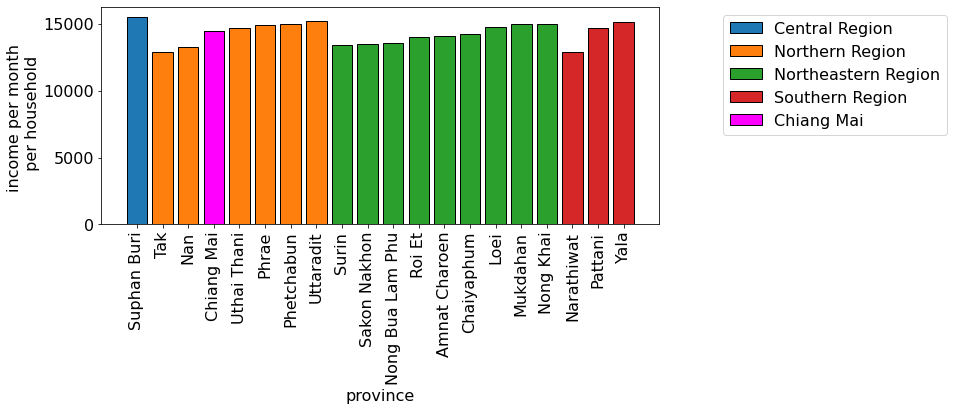

In [268]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))

province_list = []
for region in provinces['region'].unique():
    # select province
    prov_in_region = provinces[provinces['region'] == region]['province'].to_list()
    df = near_income[near_income.index.isin(prov_in_region)]
    province_list += df.index.to_list()
    if len(df) > 0:
        ax.bar(df.index, df, label=region, edgecolor='black')
 
df = near_income.loc[['Chiang Mai']]
ax.bar(df.index, df, color='magenta', label='Chiang Mai', edgecolor='black')

ax.legend(bbox_to_anchor=(1.1, 1.0))
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

ax.set_xlabel('province')
ax.set_ylabel('income per month \n per household');


In [184]:
avg_income.index[avg_income.index.str.contains('Region')]

Index(['Northeastern Region', 'Northern Region', 'Central Region',
       'Southern Region'],
      dtype='object', name='province')

In [266]:
air_avg = pd.read_excel(data_folder + 'resource/air_prov_2019.xlsx', header=[2, 3, 4, 5], na_values=['#'])
# drop the first columns
air_avg = air_avg.iloc[:, 1:]
air_avg.iloc[:,0] = air_avg.iloc[:,0].fillna(method='ffill')
 

In [264]:
# selet only province and avg PM2.5
pm10_avg = pd.concat([air_avg[air_avg.columns[0]], air_avg[air_avg.columns[-4]]], axis=1).dropna()
pm10_avg.columns = ['province', 'avgPM10']
pm10_avg = pm10_avg.groupby('province').mean()

In [282]:
# obtain english to thai province map
thai_prov_list = [provinces[provinces['province']==s]['thaiprov'].values[0] for s in province_list]

In [301]:
# use thainame to look up the pm10 
pm10_short_list = []
for thai_prov, prov in zip(thai_prov_list, province_list):
    if thai_prov in pm10_avg.index:
        pm10 = pm10_avg.loc[thai_prov,'avgPM10']
    else:
        pm10 = 0
        
 
    pm10_short_list.append([prov, float(pm10)])
    
pm10_short_list = np.vstack(pm10_short_list)
pm10_short_list = pd.DataFrame(pm10_short_list, columns=['province', 'avgPM10'])
pm10_short_list['avgPM10'] = pm10_short_list['avgPM10'].astype(float)

Text(0.5, 1.0, 'average PM10 in 2019')

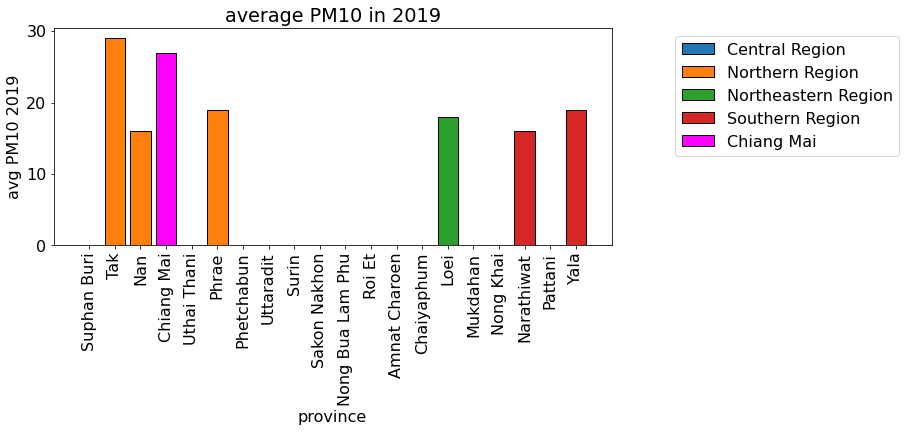

In [310]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))
#ax.bar(pm10_short_list['province'], pm10_short_list['avgPM10'])

for region in provinces['region'].unique():
    # select province
    prov_in_region = provinces[provinces['region'] == region]['province'].to_list()
    df = pm10_short_list[pm10_short_list['province'].isin(prov_in_region)]
     
    if len(df) > 0:
        ax.bar(df['province'], df['avgPM10'], label=region, edgecolor='black')

df = pm10_short_list[pm10_short_list['province'] == 'Chiang Mai']
ax.bar(df['province'], df['avgPM10'], color='magenta', label='Chiang Mai', edgecolor='black')

ax.set_xlabel('province')
ax.set_ylabel('avg PM10 2019')
ax.legend(bbox_to_anchor=(1.1, 1.0))
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

ax.set_title('average PM10 in 2019')

# Labor

In [329]:
files = glob(data_folder + 'labor_prov/*2.9*')

file_dict = {}
for file in files:
    k = '_'.join(file.split('\\')[-1].split('_')[1:-1])
    file_dict[k] = file

In [330]:
# look for the files
names = [ '_'.join(s.split(' ')) for s in province_list]
use_files = [ file_dict[s] for s in names]

In [389]:
agr_labor_df = []
total_df = []
for use_file, province in zip(use_files, province_list):
    labor = pd.read_excel(use_file)
    # drop the first columns 
    labor = labor.iloc[:, 1:]
    # extract year
    years = labor.iloc[3].dropna().str.replace('(', '').str.replace(')','').astype(int).to_list()
    # drop the first few rows 
    labor = labor.iloc[5:, :]
    labor.columns = ['occupation'] + years
    labor = labor[~labor[2007].isna()]

    # add gender 
    labor['gender'] = labor['occupation'][labor['occupation'].isin(['Total', 'Male', 'Female'])]
    labor['gender'] = labor['gender'].fillna(method='ffill')

    # clean up occupation columns
    labor['occupation'] = [ s.rstrip().lstrip() for s in labor['occupation']]
    agr_labor = labor[labor['occupation']== '6. Skilled agricultural and fishery workers']
    agr_labor = agr_labor[agr_labor['gender'].isin(['Male', 'Female'])]
    agr_labor = agr_labor.drop('occupation', axis=1)
    agr_labor['province'] = province
    agr_labor_df.append(agr_labor)
    
    total = labor[labor['occupation'] == 'Total']
    total = total.drop('occupation', axis=1)
    total['province'] = province
    total_df.append(total)
    
agr_labor_df = pd.concat(agr_labor_df, ignore_index=True)
total_df = pd.concat(total_df, ignore_index=True)

In [387]:
total = labor[labor['occupation'] == 'Total']
total = total.drop('occupation', axis=1)

In [393]:
labor_2016 = agr_labor_df[[2016, 'gender', 'province']]

Text(0, 0.5, 'population in\nskilled agricultural\nand fishery workers')

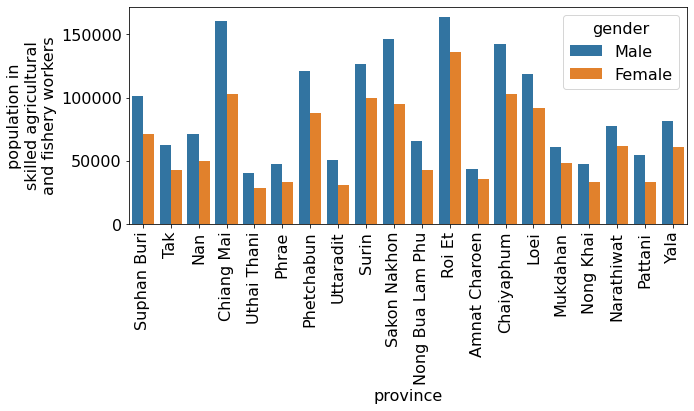

In [380]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.barplot(x='province', y=2016, hue='gender', data=labor_2016, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_ylabel('population in\nskilled agricultural\nand fishery workers')

In [410]:
df1 = labor_2016[labor_2016['gender'] == 'Male']
df1[2016] = (df1[2016].values/total_df[2016].values)*100 
df1[2016] = df1[2016].astype(int)

df2 = labor_2016[labor_2016['gender'] == 'Female']
df2[2016] = (df2[2016].values/total_df[2016].values)*100 
df2[2016] = df2[2016].astype(int)

percent_agr_labor = pd.concat([df1, df2])

Text(0, 0.5, 'population in\nskilled agricultural\nand fishery workers\n(%)')

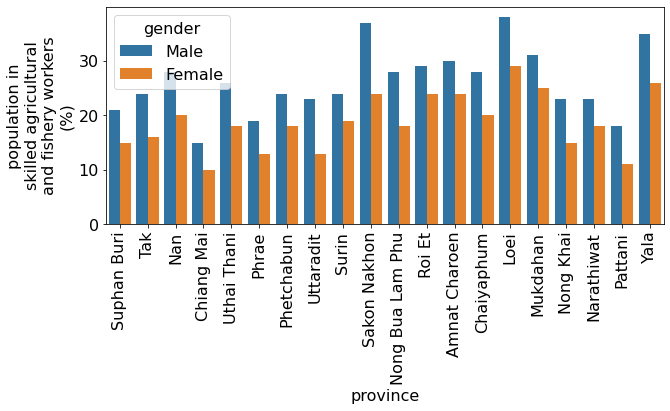

In [413]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.barplot(x='province', y=2016, hue='gender', data=percent_agr_labor, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_ylabel('population in\nskilled agricultural\nand fishery workers\n(%)')

# Health Outcome

In [459]:
population = pd.read_excel(data_folder + 'data/pop_province_sex_area.xlsx', header=[2])
population['‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î'] = population['‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î'].fillna(method='ffill')
# select total popoulation
population = population[population['‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•'] == '‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏£‡∏ß‡∏°']
population = population.set_index('‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î')
population = population.iloc[:, 2:]
population.columns = (population.columns - 543).astype(int)

In [463]:
# select the short_list
pop_short_list = population.loc[thai_prov_list,:]
pop_short_list.index = province_list

## Out Patients

In [530]:
files = glob(data_folder + 'health_prov/*out*')

file_dict = {}
for file in files:
    k = '_'.join(file.split('\\')[-1].split('_')[1:-1])
    file_dict[k] = file

In [531]:
# look for the files
names = [ '_'.join(s.split(' ')) for s in province_list]
use_files = [ file_dict[s] for s in names]

In [532]:
dis_list = ['Diseases of the respiratory system', 'Certain conditions criginating in the perinatal period', 
            'Congenital malformations, deformations and chromosomal\n    abnormalities',
           'Symptoms, signs and abnormal clinical and laboratory findings,\n    not elsewhere classified']

out_patient = []

for use_file, province in zip(use_files, province_list):
    
    pat = pd.read_excel(use_file)
    # drop the first columns 
    pat = pat.iloc[:, 2:]
    # extract year
    years = pat.iloc[4].dropna().str.replace('(', '').str.replace(')','').astype(int).to_list()
    # drop the first few rows 
    pat = pat.iloc[6:, :]
    pat.columns = years + ['disease']
    pat = pat.dropna()
    pat['disease'] = [ s.rstrip().lstrip() for s in pat['disease']]
    
    focus_group = pat[pat['disease'].isin(dis_list)]
    focus_group['province'] = province
    out_patient.append(focus_group)
    
out_patient = pd.concat(out_patient, ignore_index=True)     

In [533]:
pop2014 = pop_short_list[2014]

In [534]:
res_2014 = out_patient[out_patient['disease'] =='Diseases of the respiratory system'].set_index('province')[2014]
res_2014_per = ((res_2014/pop2014)*100) 

In [535]:
birth_2014 = out_patient[out_patient['disease'] !='Diseases of the respiratory system'][[2014, 'province']]
birth_2014 = birth_2014.groupby('province').sum().iloc[:,0]
birth_2014_per = ((birth_2014/pop2014)*100) 
# rearrange index 
birth_2014_per = birth_2014_per.loc[province_list]

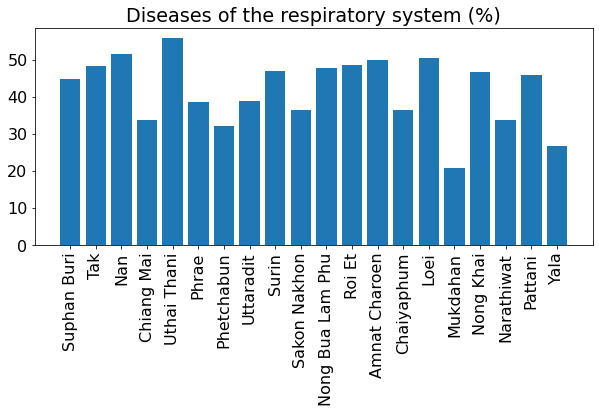

In [536]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.bar(res_2014_per.index, res_2014_per.iloc[:])
ax.set_title('Diseases of the respiratory system (%)')
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


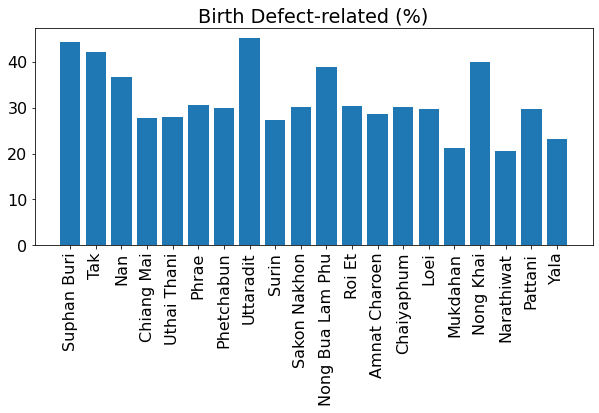

In [537]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.bar(birth_2014_per.index, birth_2014_per.iloc[:])
ax.set_title('Birth Defect-related (%)')
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## In Patients

In [524]:
files = glob(data_folder + 'health_prov/*in*')

file_dict = {}
for file in files:
    k = '_'.join(file.split('\\')[-1].split('_')[1:-1])
    file_dict[k] = file
    
# look for the files
names = [ '_'.join(s.split(' ')) for s in province_list]
use_files = [ file_dict[s] for s in names]

## Dead

In [577]:
sub_province_list = province_list[1:4] + province_list[-3:]
sub_province_list

['Tak', 'Nan', 'Chiang Mai', 'Narathiwat', 'Pattani', 'Yala']

In [578]:
files = glob(data_folder + 'health_prov/*rates*')

file_dict = {}
for file in files:
    k = '_'.join(file.split('\\')[-1].split('_')[1:-1])
    file_dict[k] = file
    
# look for the files
names = [ '_'.join(s.split(' ')) for s in sub_province_list]
use_files = [ file_dict[s] for s in names]

In [579]:
dead_cause = []

for use_file, province in zip(use_files, sub_province_list):
    
    pat = pd.read_excel(use_file)
    
    pat = pat.iloc[:, 1:]
    # extract year
    years = pat.iloc[3].dropna().str.replace('(', '').str.replace(')','').astype(int).to_list()
    # drop the first few rows 
    pat = pat.iloc[5:, :]
    pat.columns = years + ['cause']
    pat = pat.dropna()
    pat['cause'] = [ s.rstrip().lstrip() for s in pat['cause']]
    pat['gender'] = pat['cause'][pat['cause'].isin(['Total','Male','Female'])]
    pat['gender'] = pat['gender'].fillna(method='ffill')
    sub_dead = pat[pat['cause'] =='Pneumonia and other diseases of lung']
    sub_dead['province'] = province
    sub_dead = sub_dead.drop('cause', axis=1)
    dead_cause.append(sub_dead)
    
dead_cause = pd.concat(dead_cause, ignore_index=True)

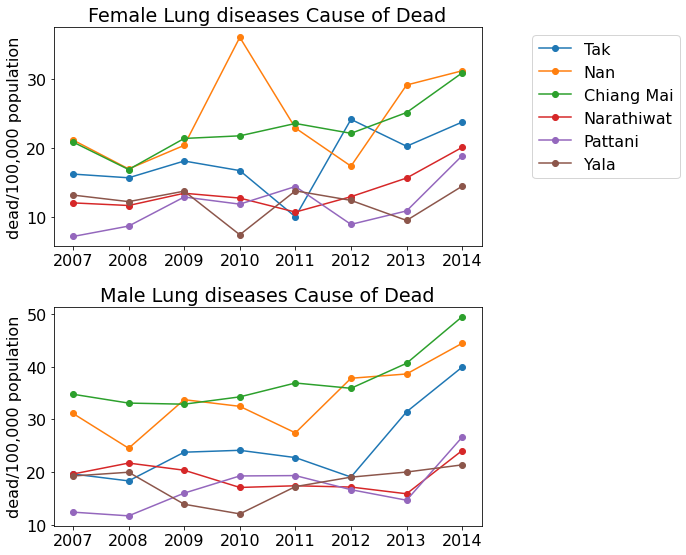

In [581]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

fm_dead = dead_cause[dead_cause['gender']=='Female'].set_index('province').drop('gender', axis=1)
m_dead = dead_cause[dead_cause['gender']=='Male'].set_index('province').drop('gender', axis=1)

years = np.arange(2007, 2015)

for prov in fm_dead.index.unique():
    f = fm_dead.loc[prov,:]
    m = m_dead.loc[prov,:]
    ax[0].plot(years, f.values, label=prov, marker='o')
    ax[1].plot(years, m.values, label=prov, marker='o')
    
    ax[0].set_title('Female Lung diseases Cause of Dead')
    ax[1].set_title('Male Lung diseases Cause of Dead')
    
for a in ax:
    a.set_ylabel('dead/100,000 population')
    
ax[0].legend(bbox_to_anchor=(1.1, 1.0), ncol=1)    
plt.tight_layout()

In [560]:
m

2007      19.2722
2008      19.9854
2009      13.9125
2010      12.0837
2011      17.2601
2012      19.0538
2013      20.0216
2014      21.3828
gender       Male
Name: Yala, dtype: object

# Make Map 

In [1]:
map_folder = '../data/world_maps/'

In [76]:
filename = map_folder + 'THA.gdb'
# select province level
prov_map = gpd.read_file(filename, driver='FileGDB', layer=2)
prov_map['geometry'].shape
# overide old crs and convert
crs = pyproj.CRS('EPSG:4326')
prov_map['geometry'] = prov_map['geometry'].set_crs(crs, allow_override=True)

In [10]:
sub_province_list = prov_map['admin1Name_en']

In [11]:
files = glob(data_folder + 'health_prov/*rates*')

file_dict = {}
for file in files:
    k = '_'.join(file.split('\\')[-1].split('_')[1:-1])
    file_dict[k] = file
    
# look for the files
names = [ '_'.join(s.split(' ')) for s in sub_province_list]
use_files = [ file_dict[s] for s in names]

In [68]:
dead_cause = pd.DataFrame()

for use_file, province in zip(use_files, sub_province_list):
    
    pat = pd.read_excel(use_file)
    
    pat = pat.iloc[:, 1:]
     
    # extract year
    years = pat.iloc[3].dropna().to_list() 
    years = [float(str(year).replace('(', '').replace(')','')) for year in years]
    years = [int(year) for year in years]
    if province == 'Samut Prakan':
        years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
    # drop the first few rows 
    pat = pat.iloc[5:, :]
    pat.columns = years + ['cause']
    if province == 'Bueng Kan':
        pat = pat.iloc[:38,:]
        pat = pat.dropna(how='all')
    else:
        pat = pat.dropna()
        
        
    pat['cause'] = [ s.rstrip().lstrip() for s in pat['cause']]
    pat['gender'] = pat['cause'][pat['cause'].isin(['Total','Male','Female'])]
    pat['gender'] = pat['gender'].fillna(method='ffill')
    sub_dead = pat[pat['cause'] =='Pneumonia and other diseases of lung']
    sub_dead['province'] = province
    sub_dead = sub_dead.drop('cause', axis=1)
    
    if len(sub_dead) == 0:
        print(use_file)
    
    dead_cause = pd.concat([dead_cause, sub_dead], ignore_index=True)
    #dead_cause.append(sub_dead)
    
#dead_cause = pd.concat(dead_cause, ignore_index=True)

In [82]:
fm_dead = dead_cause[dead_cause['gender']=='Female'].set_index('province').drop('gender', axis=1)[[2014]]
m_dead = dead_cause[dead_cause['gender']=='Male'].set_index('province').drop('gender', axis=1)[[2014]]

fm_dead.columns = ['female_dead_14']
m_dead.columns = ['male_dead_14']

In [84]:
lung_map = prov_map.merge(fm_dead, left_on ='admin1Name_en', right_index=True, how='left')
lung_map = lung_map.merge(m_dead, left_on ='admin1Name_en', right_index=True, how='left')
lung_map = lung_map.fillna(0)

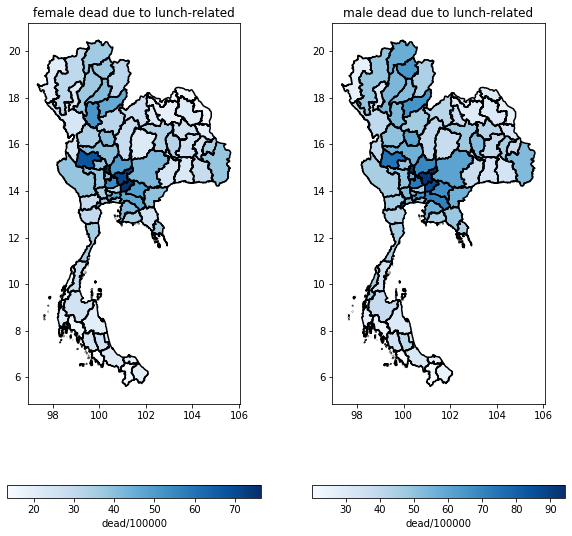

In [85]:
_, ax = plt.subplots(1, 2, figsize=(10,10))
lung_map.plot(column='female_dead_14',
           ax=ax[0],legend=True,
           legend_kwds={'label': "dead/100000",
                       'orientation': "horizontal"},  cmap='Blues')

lung_map.plot(column='male_dead_14',
           ax=ax[1],legend=True,
           legend_kwds={'label': "dead/100000",
                       'orientation': "horizontal"},  cmap='Blues')

lung_map.boundary.plot(ax=ax[0], color='black')
lung_map.boundary.plot(ax=ax[1], color='black')


ax[0].set_title("female dead due to lunch-related")
ax[1].set_title("male dead due to lunch-related")

plt.savefig(report_folder + 'th_lung_province.png')

In [110]:
mean_df = []
for province in sub_province_list:
    
    filename = pm_folder + '_'.join(province.split(' ')) + '.txt'
    if os.path.exists(filename):
        df, _ = read_b_data(filename)
        df = df.set_index('datetime')
        df = add_season(df, start_month='-09-01', end_month='-04-30', next_year=True)
        mean_value = df['PM2.5'].mean()
            
    else:
        mean_value = np.nan
        
    mean_dict = {'province': province,
                'PM2.5': mean_value}
    mean_df.append(mean_dict)
    
mean_df = pd.DataFrame(mean_df)

In [111]:
pm25_map = prov_map.merge(mean_df, left_on ='admin1Name_en', right_on='province', how='left')


Text(0.5, 1.0, 'Average PM2.5 in Winter')

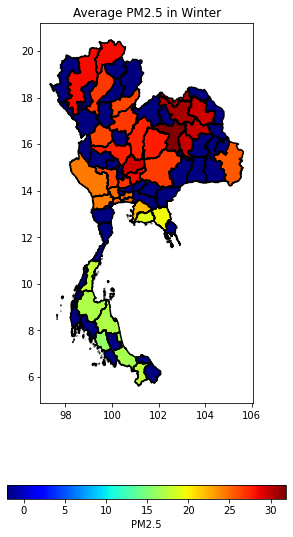

In [112]:
_, ax = plt.subplots(1, 1, figsize=(5,10))
pm25_map.plot(column='PM2.5',
           ax=ax,legend=True,
           legend_kwds={'label': "PM2.5",
                       'orientation': "horizontal"},  cmap='jet',
             missing_kwds={
         "color": "lightgrey",
         "edgecolor": "red",
            "hatch": "///",
           "label": "Missing values"    },)

 
pm25_map.boundary.plot(ax=ax, color='black')


ax.set_title("Average PM2.5 in Winter")

# Correct the rate

## Lung dead rate

In [7]:
map_folder = '../data/world_maps/'

In [60]:
filename = map_folder + 'THA.gdb'
# select province level
prov_map = gpd.read_file(filename, driver='FileGDB', layer=2)
prov_map['geometry'].shape
# overide old crs and convert
crs = pyproj.CRS('EPSG:4326')
prov_map['geometry'] = prov_map['geometry'].set_crs(crs, allow_override=True)
province_list = prov_map['admin1Name_en'].to_list()

In [65]:
# dictionary to conver Thai province name to English 
prov_dict = prov_map[['admin1Name_en', 'admin1Name_th']]
prov_dict.columns = ['province', 'province_th']

region_dict = pd.DataFrame({'province_th': ['‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£', '‡∏†‡∏≤‡∏Ñ‡∏Å‡∏•‡∏≤‡∏á', '‡∏†‡∏≤‡∏Ñ‡πÄ‡∏´‡∏ô‡∏∑‡∏≠', '‡∏†‡∏≤‡∏Ñ‡∏ï‡∏∞‡∏ß‡∏±‡∏ô‡∏≠‡∏≠‡∏Å‡πÄ‡∏â‡∏µ‡∏¢‡∏á‡πÄ‡∏´‡∏ô‡∏∑‡∏≠', '‡∏†‡∏≤‡∏Ñ‡πÉ‡∏ï‡πâ'],
              'province': ['Whole Kingdom', 'Central Region', 'Northern Region', 'Northeastern Region', 'Southern Region']})

prov_dict = pd.concat([prov_dict, region_dict], ignore_index=True)

In [16]:
files = glob(data_folder + 'health_prov/*rates*')

file_dict = {}
for file in files:
    k = '_'.join(file.split('\\')[-1].split('_')[1:-1])
    file_dict[k] = file
    
# look for the files
names = [ '_'.join(s.split(' ')) for s in province_list]
use_files = [ file_dict[s] for s in names]

In [17]:
dead_cause = pd.DataFrame()

for use_file, province in zip(use_files, province_list):
    
    pat = pd.read_excel(use_file)
    
    pat = pat.iloc[:, 1:]
     
    # extract year
    years = pat.iloc[3].dropna().to_list() 
    years = [float(str(year).replace('(', '').replace(')','')) for year in years]
    years = [int(year) for year in years]
    if province == 'Samut Prakan':
        years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
    # drop the first few rows 
    pat = pat.iloc[5:, :]
    pat.columns = years + ['cause']
    if province == 'Bueng Kan':
        pat = pat.iloc[:38,:]
        pat = pat.dropna(how='all')
    else:
        pat = pat.dropna()
        
        
    pat['cause'] = [ s.rstrip().lstrip() for s in pat['cause']]
    pat['gender'] = pat['cause'][pat['cause'].isin(['Total','Male','Female'])]
    pat['gender'] = pat['gender'].fillna(method='ffill')
    sub_dead = pat[pat['cause'] =='Pneumonia and other diseases of lung']
    sub_dead['province'] = province
    sub_dead = sub_dead.drop('cause', axis=1)
    
    if len(sub_dead) == 0:
        print(use_file)
    
    dead_cause = pd.concat([dead_cause, sub_dead], ignore_index=True)
    #dead_cause.append(sub_dead)
    
#dead_cause = pd.concat(dead_cause, ignore_index=True)

In [19]:
dead_cause.to_csv(data_folder + 'process/lung_dead_prov.csv', index=False)

In [53]:
dead_cause.head()

2007       2008       2009       2010       2011       2012  \
0  11.926543  12.730365  11.887362  16.152001  18.807598  16.359677   
1  14.061959  14.591203  12.396716  17.183053  18.764543  17.134840   
2   9.781067  10.860534  11.375455  15.115444  18.850852  15.581848   
3  24.280813  23.540242  28.439114  23.868945  35.498882  32.045413   
4  28.506688  30.655368  31.385029  29.949962  35.141665  34.488325   

        2013       2014  gender       province  
0  27.265729  36.529534   Total  Amnat Charoen  
1  29.368576  37.840229    Male  Amnat Charoen  
2  25.157771  35.217280  Female  Amnat Charoen  
3  44.396368  48.651507   Total      Ang Thong  
4  52.121951  58.728959    Male      Ang Thong

## Population

In [22]:
population = pd.read_excel(data_folder + 'data/pop_province_sex_area.xlsx', header=[2])
population.head()

‡∏†‡∏≤‡∏Ñ          ‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î            ‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•         2553  \
0  ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£  ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£              ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏£‡∏ß‡∏°  63878267.00   
1              NaN              NaN              ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏ä‡∏≤‡∏¢  31451801.00   
2              NaN              NaN             ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏´‡∏ç‡∏¥‡∏á  32426466.00   
3              NaN              NaN       ‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏ó‡∏µ‡πà (‡∏ï‡∏£.‡∏Å‡∏°.)    513140.00   
4              NaN              NaN  ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏ô‡∏≤‡πÅ‡∏ô‡πà‡∏ô ‡∏ï‡πà‡∏≠ ‡∏ï‡∏£.‡∏Å‡∏°.       124.49   

          2554         2555         2556         2557         2558  \
0  64076033.00  64456695.00  64785909.00  65124716.00  65729098.00   
1  31529148.00  31700727.00  31845971.00  31999008.00  32280886.00   
2  32546885.00  32755968.00  32939938.00  33125708.00  33448212.00   
3    513140.00    513140.00    513140.00    513140.00    513140.00   
4       124.87       125.61       126.25       126.91       128.09   

          2559          2560          2561         2562  
0  65931550.00  6.618850e+07  6.641398e+07  66558935.00  
1  32357808.00  3.246491e+07  3.255627e+07  32605100.00  
2  33573742.00  3.372360e+07  3.385771e+07  33953835.00  
3    513140.00  5.131395e+05  5.131395e+05    513140.00  
4       128.49  1.289900e+02  1.294300e+02       129.71

In [66]:
# population from 2010 - 2019
population = pd.read_excel(data_folder + 'data/pop_province_sex_area.xlsx', header=[2])
population['‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î'] = population['‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î'].fillna(method='ffill')
# select total popoulation
population = population[population['‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•'].isin(['‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏£‡∏ß‡∏°','‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏ä‡∏≤‡∏¢','‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏´‡∏ç‡∏¥‡∏á'])]
population = population.set_index(['‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î','‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•'])
population = population.iloc[:, 1:]
cols  = (population.columns - 543).astype(int).to_list()

population = population.reset_index()
population.columns = ['province_th', 'gender_th'] + cols

# replace gender with english
gender_dict = pd.DataFrame({'gender_th': ['‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏£‡∏ß‡∏°','‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏ä‡∏≤‡∏¢','‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏´‡∏ç‡∏¥‡∏á'],
'gender':['Total','Male','Female']})
population = population.merge(gender_dict, on='gender_th', how='left')
# replace province name with the Thailand 
population = population.merge(prov_dict, on='province_th', how='left')


In [111]:
# population from 2010 - 2019
pop2 = pd.read_excel(data_folder + 'pop_province/00000_Whole_Kingdom_1.1.1.xls', header=[2])
pop2 = pop2.iloc[:257, 1:].dropna(how='all')

# extract year
years = pop2.iloc[1].dropna().to_list() 
years = [float(str(year).replace('(', '').replace(')','')) for year in years]
years = [int(year) for year in years] 
 
pop2.columns = years + ['province']

pop2 = pop2.iloc[2:,:]

# add gender columns
pop2['gender'] = 'Total'
idxs = pop2[pop2['province']== 'Male'].index
pop2.loc[idxs, 'gender'] = 'Male'
idxs = pop2[pop2['province']== 'Female'].index
pop2.loc[idxs, 'gender'] = 'Female'

# remove gender from the province
idxs = pop2[pop2['province'].isin( ['Male', 'Female'])].index
pop2.loc[idxs,'province'] = np.nan
pop2['province'] = pop2['province'].fillna(method='ffill')

# remove The word province from the province columns
pop2['province'] = pop2['province'].str.replace(' Province', '')
# select data before 2010
pop2 = pop2[np.arange(2006, 2010).tolist() + ['province', 'gender']]

In [114]:
population = population.merge(pop2, on =['province', 'gender'], how='outer')

In [124]:
population.to_csv(data_folder  + 'process/pop_prov.csv', index=False )

In [126]:
population

province_th       province    gender_th  gender        2019  \
0    ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£  Whole Kingdom   ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏£‡∏ß‡∏°   Total  66558935.0   
1    ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£  Whole Kingdom   ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏ä‡∏≤‡∏¢    Male  32605100.0   
2    ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£  Whole Kingdom  ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏´‡∏ç‡∏¥‡∏á  Female  33953835.0   
3      ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£        Bangkok   ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏£‡∏ß‡∏°   Total   5666264.0   
4      ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£        Bangkok   ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏ä‡∏≤‡∏¢    Male   2669316.0   
..               ...            ...          ...     ...         ...   
241             ‡∏¢‡∏∞‡∏•‡∏≤           Yala   ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏ä‡∏≤‡∏¢    Male    266860.0   
242             ‡∏¢‡∏∞‡∏•‡∏≤           Yala  ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏´‡∏ç‡∏¥‡∏á  Female    269470.0   
243         ‡∏ô‡∏£‡∏≤‡∏ò‡∏¥‡∏ß‡∏≤‡∏™     Narathiwat   ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏£‡∏ß‡∏°   Total    808020.0   
244         ‡∏ô‡∏£‡∏≤‡∏ò‡∏¥‡∏ß‡∏≤‡∏™     Narathiwat   ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏ä‡∏≤‡∏¢    Male    400017.0   
245         ‡∏ô‡∏£‡∏≤‡∏ò‡∏¥‡∏ß‡∏≤‡∏™     Narathiwat  ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏´‡∏ç‡∏¥‡∏á  Female    408003.0   

           2018        2017        2016        2015        2014        2013  \
0    66413979.0  66188503.0  65931550.0  65729098.0  65124716.0  64785909.0   
1    32556271.0  32464906.0  32357808.0  32280886.0  31999008.0  31845971.0   
2    33857708.0  33723597.0  33573742.0  33448212.0  33125708.0  32939938.0   
3     5676648.0   5682415.0   5686646.0   5696409.0   5692284.0   5686252.0   
4     2679453.0   2682962.0   2687253.0   2695051.0   2695519.0   2694921.0   
..          ...         ...         ...         ...         ...         ...   
241    264928.0    262057.0    259452.0    257124.0    254056.0    251023.0   
242    267398.0    265238.0    262827.0    261015.0    257855.0    255115.0   
243    802474.0    796239.0    789681.0    783082.0    774799.0    766145.0   
244    397100.0    393837.0    390832.0    387631.0    383850.0    379462.0   
245    405374.0    402402.0    398849.0    395451.0    390949.0    386683.0   

           2012        2011        2010        2009        2008        2007  \
0    64456695.0  64076033.0  63878267.0  63525062.0  63389730.0  63038247.0   
1    31700727.0  31529148.0  31451801.0  31293096.0  31255869.0  31095942.0   
2    32755968.0  32546885.0  32426466.0  32231966.0  32133861.0  31942305.0   
3     5673560.0   5674843.0   5701394.0   5702595.0   5710883.0   5716248.0   
4     2690754.0   2692954.0   2709568.0   2713535.0   2722313.0   2727574.0   
..          ...         ...         ...         ...         ...         ...   
241    248437.0    244903.0    241769.0    238215.0    236178.0    234166.0   
242    252377.0    248864.0    245611.0    242119.0    239349.0    236525.0   
243    757397.0    747372.0    737162.0    728071.0    719930.0    711517.0   
244    375340.0    370019.0    364898.0    360367.0    356481.0    352404.0   
245    382057.0    377353.0    372264.0    367704.0    363449.0    359113.0   

           2006  
0    62828706.0  
1    31007857.0  
2    31820849.0  
3     5695956.0  
4     2721273.0  
..          ...  
241    232827.0  
242    235425.0  
243    707171.0  
244    349935.0  
245    357236.0  

[246 rows x 18 columns]

## Putting data together

In [125]:
population = pd.read_csv(data_folder  + 'process/pop_prov.csv')  

In [20]:
dead_cause = pd.read_csv(data_folder + 'process/lung_dead_prov.csv')

# Rate Adjustment

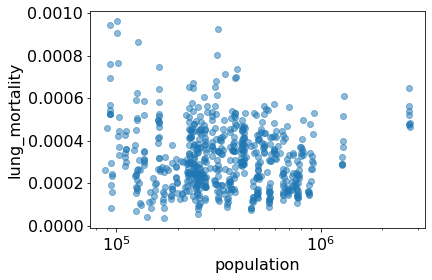

In [448]:
plt.scatter(dead_male_rate['pop'], dead_male_rate['rate'], alpha=0.5)
plt.xlabel('population')
plt.ylabel('lung_mortality')

plt.xscale('log')

In [452]:
dead_male_rate[dead_male_rate['rate'] > 0.0008]

province  year       dead       pop      rate       count
516         Saraburi  2013  80.486525  311374.0  0.000805  250.614112
519        Sing Buri  2013  96.490883  101384.0  0.000965   97.826316
559     Nakhon Nayok  2014  86.498388  127503.0  0.000865  110.288040
592  Samut Songkhram  2014  94.313335   93316.0  0.000943   88.009431
593         Saraburi  2014  92.530337  313285.0  0.000925  289.883665
596        Sing Buri  2014  90.834592  101181.0  0.000908   91.907349

In [453]:
dead_male_rate[dead_male_rate['province'].str.contains('Samut Sakhon')]

province  year       dead       pop      rate       count
56   Samut Sakhon  2007  45.037089  228254.0  0.000450  102.798958
132  Samut Sakhon  2008  44.776963  231803.0  0.000448  103.794343
208  Samut Sakhon  2009  45.871756  234714.0  0.000459  107.667434
284  Samut Sakhon  2010  54.166138  237906.0  0.000542  128.864492
360  Samut Sakhon  2011  48.007681  241183.0  0.000480  115.786366
437  Samut Sakhon  2012  49.279897  245830.0  0.000493  121.144772
514  Samut Sakhon  2013  55.947997  251059.0  0.000559  140.462481
591  Samut Sakhon  2014  51.580895  256880.0  0.000516  132.501004

What we are seeing here is the rate for provinces with small population is high. Samut Songkhrams is right next to Samut Sakorn, but the rate are soo difference, this cannot be true. Note that, the rate for Saraburi is probably real because of high enough population.

## Partially pooled

What we want is a model which deferes to the data when there is enough: those province with large populations, but regularizes the values from counties with small populations. What sort of a prior can help us here?

Why not borrow statistical strength from the overall average while not accepting it entirely? This leads naturally to the concept of a hierarchical model: one in which we have a separate poisson for each province, with a separate rate parameter for each province. But we assume that all of these rate parameters  ùúÉùëó  are draws from the same $Gamma(\alpha, \beta) distribution.

Modeling in this way has two advantages: (a) as we shall see, it helps us develop a computational strategy to solve the problem, and (b) it allows estimates of the probabilities of any one of the units (here, one of the experiments) to borrow strength from all the data as a whole through the estimation of the hyperparameters  ùõº  and  ùõΩ . In other words, if some of the experiments had lower sample sizes or other outlier like behavior, the procedure helps "regularize" this.

The likelihood is a product of poissons, each with a different rate parameter:

$$\cal L = \prod_{j} Poisson(y_{j}, 5\,\theta_{j}n_{j})$$

The prior is

$$p(\theta_{j}) \sim Gamma(\alpha, \beta)$$

The posterior distribution then simply turns out to be another Gamma!

$$p(\theta_{j} | \{y_j\}) \propto \cal L(\{y_j\} | \{\theta_{j}\}) \times p(\theta_{j}) \propto Gamma(\alpha + y_{j}, \beta + 5\,n_{j})$$

To calculate this postrior one MUST integrate or **marginalize** over all other parameters. Notice that all the poissons separate out.

In [436]:
# prior of the rate 
prior = lambda theta, a,b: gamma.pdf(theta, a, 0., 1./b)
# likelyhood
like1 = lambda yj, thetaj, nj: poisson.pmf(yj, 5.*thetaj*nj)
posterior = lambda thetaj,a,b,yj, nj: gamma.pdf(thetaj, a+yj, 0., 1./(b+5.*nj))


The mean of this posterior distribution is 

$$\frac{\alpha + y_{j}}{\beta + 5\,n_{j}}$$

which can be used to estimate the death rates in all the counties.

In [437]:
meanpost = lambda yj,nj,a,b: (a+yj)/(b + 5*nj)

The posterior predictive turns out to be simple too. Its a negative binomial distribution:

$$p(y^{*} | \{y_{j}\}) = NegBin(\alpha, \frac{\beta}{5\,n_{j}})$$

We can use this somewhat self-referentially on the same counties (or hold some out) to estimate the number of deaths in these counties. 


In [438]:
postpred = lambda y,a,b,nj: nbinom.pmf(y, a, b/(5.*nj))
meanpostpred=lambda nj, a,b: 5.*nj*(a/b)
varpostpred=lambda nj,a,b: meanpostpred(nj,a,b)*(1. +  meanpostpred(nj,a,b)/a)

 We use the mean and the variance of the negative binomial distribution, respectively:

$$ 5\,n_{j}\frac{\alpha}{\beta}$$

and

$$ 5\,n_{j}\frac{\alpha}{\beta} + \left(5\,n_{j}\frac{\alpha}{\beta}\right)^{2}\frac{1}{\alpha}$$

and equate these to the empirically calculated mean and variance of the number of deaths: this fixes $\alpha$ and $\beta$ for us from all the data while the individual Gamma function posterior draws retain information from that counties contribution to the likelihood and thus only allow for partial pooling.

In [456]:
meany=dead_male_rate['count'].mean()
vary=dead_male_rate['count'].var()
meanpop=dead_male_rate['pop'].mean()
meanpopsquared=np.mean(dead_male_rate['pop']**2)

In [458]:
abyb=meany/(5.*meanpop)
est_a = (25.*meanpopsquared*abyb*abyb)/(vary - meany) 
est_b = est_a/abyb

print(est_a, est_b)

1.0477423802222077 16104.121168928204


In [459]:
abyb

6.506051272414384e-05

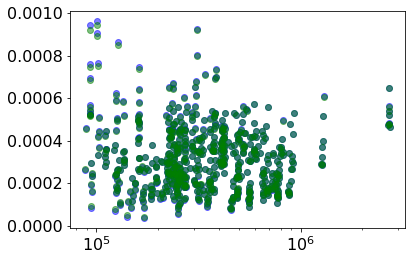

In [469]:
plt.scatter(dead_male_rate['pop'], dead_male_rate['rate'], alpha=0.5, color='blue')


# adjust the rate of the old plot
vals=zip(dead_male_rate['count'], dead_male_rate['pop'])
meanposts=[meanpost(yjay, njay, est_a, est_b) for (yjay, njay) in vals]
plt.scatter(dead_male_rate['pop'], 5*np.array(meanposts), color="green", alpha=0.5)
 
plt.xscale('log')

In [471]:
dead_male_rate['adjusted_rate'] = 5*np.array(meanposts)

In [473]:
dead_male_rate[dead_male_rate['province'].str.contains('Samut Sakhon')]

province  year       dead       pop      rate       count  \
56   Samut Sakhon  2007  45.037089  228254.0  0.000450  102.798958   
132  Samut Sakhon  2008  44.776963  231803.0  0.000448  103.794343   
208  Samut Sakhon  2009  45.871756  234714.0  0.000459  107.667434   
284  Samut Sakhon  2010  54.166138  237906.0  0.000542  128.864492   
360  Samut Sakhon  2011  48.007681  241183.0  0.000480  115.786366   
437  Samut Sakhon  2012  49.279897  245830.0  0.000493  121.144772   
514  Samut Sakhon  2013  55.947997  251059.0  0.000559  140.462481   
591  Samut Sakhon  2014  51.580895  256880.0  0.000516  132.501004   

     adjusted_rate  
56        0.000449  
132       0.000446  
208       0.000457  
284       0.000539  
360       0.000478  
437       0.000491  
514       0.000557  
591       0.000513

In [475]:
dead_male_rate[dead_male_rate['province'].str.contains('Samut Songkhram')]

province  year       dead      pop      rate      count  \
57   Samut Songkhram  2007  54.436581  93526.0  0.000544  50.912357   
133  Samut Songkhram  2008  52.446243  93331.0  0.000524  48.948603   
209  Samut Songkhram  2009  69.691641  93204.0  0.000697  64.955397   
285  Samut Songkhram  2010  52.515942  93405.0  0.000525  49.052516   
361  Samut Songkhram  2011  56.773143  93302.0  0.000568  52.970478   
438  Samut Songkhram  2012  76.131246  93217.0  0.000761  70.967264   
515  Samut Songkhram  2013  52.543536  93295.0  0.000525  49.020492   
592  Samut Songkhram  2014  94.313335  93316.0  0.000943  88.009431   

     adjusted_rate  
57        0.000537  
133       0.000518  
209       0.000685  
285       0.000518  
361       0.000560  
438       0.000747  
515       0.000519  
592       0.000923

In [479]:
dead_male_new = dead_male_rate.groupby('province').mean() 

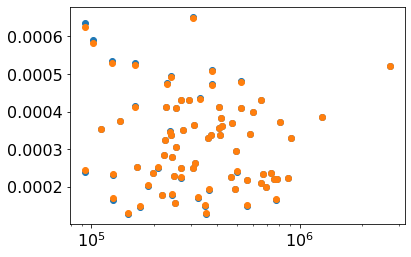

In [484]:
plt.scatter(dead_male_new['pop'], dead_male_new['rate'])
plt.scatter(dead_male_new['pop'], dead_male_new['adjusted_rate'])

plt.xscale('log')

In [477]:
# use province_list to keep the bar plot in the same order
dead_male_short = pd.DataFrame(index=province_list, columns =['lung'])
dead_male_short = dead_male_short.merge(dead_male_new, right_index=True, left_index=True, how='left', suffixes=('_x', ''))
dead_male_short = dead_male_short[['adjusted_rate']]

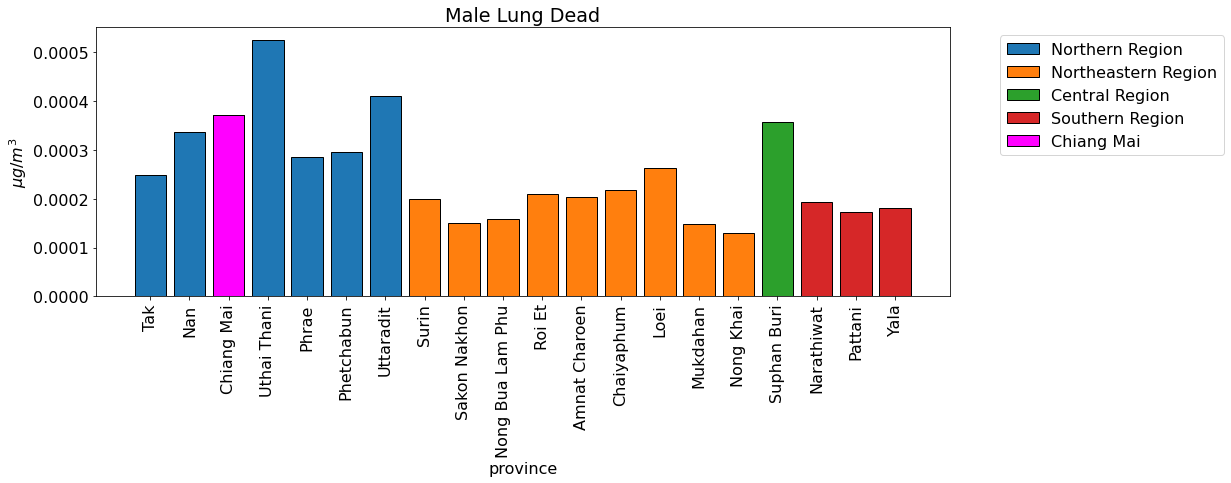

In [478]:
fig, ax = plt.subplots(1,1, figsize=(14, 7))
#ax.bar(pm10_short_list['province'], pm10_short_list['avgPM10'])


for region in region_list:
    # select province
    prov_in_region = provinces[provinces['region'] == region]['province'].to_list()
    # select only province near Chiang Mai
    # use province_list to keep the bar plot in the same order

    prov_in_region = [s for s in province_list if s in prov_in_region]
    df = dead_male_short.loc[prov_in_region]
     
    if len(df) > 0:
        ax.bar(df.index, df['adjusted_rate'], label=region, edgecolor='black')
# highlight Chiang Mai
df = dead_male_short.loc[['Chiang Mai']]
ax.bar(df.index, df['adjusted_rate'], color='magenta', label='Chiang Mai', edgecolor='black')

ax.set_xlabel('province')
ax.set_ylabel('$\mu g/m^3$')
ax.legend(bbox_to_anchor=(1.05, 1.0))
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Male Lung Dead')
plt.tight_layout()

Find the p-value associated with the Z-score where the population mean is 1.75m given a list X containing the heights of the basketball players in Python?

In [2]:
import statsmodels.stats.weightstats as sms 
from scipy.stats import norm 

x = [2.06,2.08,1.88,1.91,
2.06,2.01,1.98,2.13,2.01,2.06,2.01,
2.13,2.11,2.01,2.06,2.01]

s = sms.ztest(x, value=1.75); 
print(s)
print( 2*norm.sf(16.06960894924432) )

(16.069608949244316, 4.1670677724647245e-58)
4.167067772464368e-58


Use scipy's t-test to compare the heights of the Golden State Warriors X with the Cleveland Cavaliers Y i.e. are they significantly different populations?

In [3]:
from scipy import stats

x = [2.06,2.08,1.88,1.91,
2.06,2.01,1.98,2.13,2.01,2.06,2.01,
2.13,2.11,2.01,2.06,2.01]

y = [1.91,1.96,2.06,1.91,
1.96,2.03,2.03,2.01,2.08,2.06,2.03,
2.08,1.88,1.98,2.06,2.11]

print( stats.ttest_ind(x, y, equal_var=True) )
print( stats.ttest_ind(x, y, equal_var=False) )

Ttest_indResult(statistic=0.914952019225675, pvalue=0.36751280326452773)
Ttest_indResult(statistic=0.914952019225675, pvalue=0.36751503743577896)


$ Z = \frac{(p_1 - p_2)}{\sqrt{p(1-p)(\frac{1}{n_1} + \frac{1}{n_2})}} $


$ Z = \frac{(p_1 - p1)}{\sqrt{p(1-p)(\frac{1}{n_1} )}} $

Null hypothesis: population proportion is equal to hypothesized proportion
Alternative hypothesis: population proportion is not equal to hypothesized proportion (two -tailed)

https://sixsigmastudyguide.com/one-and-two-sample-proportion-hypothesis-tests/?fbclid=IwAR2ht6xg8viuFKu_nZ90W_Q2sb9zo4loNJwBJb-XCaaNZaLvZTZfC-m2ekI

# Smoking Rate

In [503]:
folder = '../data/nso_data/smoke/'
to_folder = '../data/nso_data/process/'
files = glob(folder + '*')
print(len(files))

16


In [504]:
files

['../data/nso_data/smoke\\clean_2001.csv',
 '../data/nso_data/smoke\\clean_2004.csv',
 '../data/nso_data/smoke\\clean_2007.csv',
 '../data/nso_data/smoke\\clean_2011.csv',
 '../data/nso_data/smoke\\clean_2013.csv',
 '../data/nso_data/smoke\\clean_2014.csv',
 '../data/nso_data/smoke\\clean_2015.csv',
 '../data/nso_data/smoke\\sector_TH_report_sector_05_5_TH_smoker.xlsx',
 '../data/nso_data/smoke\\sector_TH_report_sector_05_6_TH_smoker.xlsx',
 '../data/nso_data/smoke\\‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏≠‡∏≤‡∏¢‡∏∏ 15 ‡∏õ‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô‡πÑ‡∏õ ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡∏´‡∏°‡∏ß‡∏î‡∏≠‡∏≤‡∏¢‡∏∏   ‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà   ‡πÄ‡∏û‡∏®‡πÅ‡∏•‡∏∞‡πÄ‡∏Ç‡∏ï‡∏Å‡∏≤‡∏£‡∏õ‡∏Å‡∏Ñ‡∏£‡∏≠‡∏á   ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£   ‡∏û.‡∏®. 2544.xls',
 '../data/nso_data/smoke\\‡∏õ‡∏µ 2547 ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏≠‡∏≤‡∏¢‡∏∏ 11 ‡∏õ‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô‡πÑ‡∏õ ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà ‡∏Å‡∏•‡∏∏‡πà‡

In [377]:
files[8]

'../data/nso_data/smoke\\‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏≠‡∏≤‡∏¢‡∏∏ 15 ‡∏õ‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô‡πÑ‡∏õ ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡∏´‡∏°‡∏ß‡∏î‡∏≠‡∏≤‡∏¢‡∏∏   ‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà   ‡πÄ‡∏û‡∏®‡πÅ‡∏•‡∏∞‡πÄ‡∏Ç‡∏ï‡∏Å‡∏≤‡∏£‡∏õ‡∏Å‡∏Ñ‡∏£‡∏≠‡∏á   ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£   ‡∏û.‡∏®. 2544.xls'

In [378]:
file = files[8]
print(file)
df = pd.read_excel(file)
df.head(10)

../data/nso_data/smoke\‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏≠‡∏≤‡∏¢‡∏∏ 15 ‡∏õ‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô‡πÑ‡∏õ ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡∏´‡∏°‡∏ß‡∏î‡∏≠‡∏≤‡∏¢‡∏∏   ‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà   ‡πÄ‡∏û‡∏®‡πÅ‡∏•‡∏∞‡πÄ‡∏Ç‡∏ï‡∏Å‡∏≤‡∏£‡∏õ‡∏Å‡∏Ñ‡∏£‡∏≠‡∏á   ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£   ‡∏û.‡∏®. 2544.xls


‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏ó‡∏µ‡πà   2  ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏≠‡∏≤‡∏¢‡∏∏ 15 ‡∏õ‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô‡πÑ‡∏õ  ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡∏´‡∏°‡∏ß‡∏î‡∏≠‡∏≤‡∏¢‡∏∏  ‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà  ‡πÄ‡∏û‡∏®‡πÅ‡∏•‡∏∞‡πÄ‡∏Ç‡∏ï‡∏Å‡∏≤‡∏£‡∏õ‡∏Å‡∏Ñ‡∏£‡∏≠‡∏á  ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£  ‡∏û.‡∏®. 2544  \
0                                                NaN                                                                                   
1                        ‡πÄ‡∏Ç‡∏ï‡∏Å‡∏≤‡∏£‡∏õ‡∏Å‡∏Ñ‡∏£‡∏≠‡∏á:1) ‡πÉ‡∏ô‡πÄ‡∏Ç‡∏ï‡πÄ‡∏ó‡∏®‡∏ö‡∏≤‡∏•                                                                                   
2                                                NaN                                                                                   
3                                                NaN                                                                                   
4                                                NaN                                                                                   
5                         ‡∏†‡∏≤‡∏Ñ ‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î‡πÅ‡∏•‡∏∞‡πÄ‡∏Ç‡∏ï‡∏Å‡∏≤‡∏£‡∏õ‡∏Å‡∏Ñ‡∏£‡∏≠‡∏á                                                                                   
6                                    ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£                                                                                   
7                                                NaN                                                                                   
8                                                NaN                                                                                   
9                                                NaN                                                                                   

          Unnamed: 1    Unnamed: 2             Unnamed: 3  \
0                NaN           NaN                    NaN   
1  ‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î:<‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î>           NaN                    NaN   
2                NaN           NaN                    NaN   
3                NaN           NaN                    NaN   
4                NaN           NaN                    NaN   
5                ‡∏†‡∏≤‡∏Ñ           NaN              Re F54 Tt   
6                NaN           NaN                    NaN   
7   1) ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£           NaN                    NaN   
8                NaN  ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£                    NaN   
9                NaN           NaN  01. ‡∏õ‡∏±‡∏à‡∏à‡∏∏‡∏ö‡∏±‡∏ô‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà   

              Unnamed: 4 Unnamed: 5      Unnamed: 6 Unnamed: 7  \
0                    NaN        NaN             NaN        NaN   
1                    NaN        NaN             NaN        NaN   
2                    NaN        NaN             NaN        NaN   
3                    NaN   ‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)  05. 15 - 19 ‡∏õ‡∏µ        NaN   
4                    NaN        ‡πÄ‡∏û‡∏®         01. ‡∏ä‡∏≤‡∏¢   02. ‡∏´‡∏ç‡∏¥‡∏á   
5   ‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà        NaN             NaN        NaN   
6                    NaN        NaN             NaN        NaN   
7                    NaN        NaN             NaN        NaN   
8                    NaN        NaN          325832     353667   
9                    NaN        NaN         37001.6        NaN   

       Unnamed: 8 Unnamed: 9  ... Unnamed: 13     Unnamed: 14 Unnamed: 15  \
0             NaN        NaN  ...         NaN             NaN         NaN   
1             NaN        NaN  ...         NaN             NaN         NaN   
2             NaN        NaN  ...         NaN             NaN         NaN   
3  06. 20 - 24 ‡∏õ‡∏µ        NaN  ...         NaN  09. 35 - 39 ‡∏õ‡∏µ         NaN   
4         01. ‡∏ä‡∏≤‡∏¢   02. ‡∏´‡∏ç‡∏¥‡∏á  ...    02. ‡∏´‡∏ç‡∏¥‡∏á         01. ‡∏ä‡∏≤‡∏¢    02. ‡∏´‡∏ç‡∏¥‡∏á   
5             NaN        NaN  ...         NaN             NaN         NaN 

In [337]:
year = 2558 - 543
print(year)

2015


In [147]:
df = pd.read_excel(file)

# set columns
df.columns = ['region', 'age', 'gender'] + df.iloc[5].dropna().to_list()
# remove top rows 
df = df.iloc[7:]
df.iloc[:,0] = df.iloc[:,0].fillna(method='ffill')
df.iloc[:,1] = df.iloc[:,1].fillna(method='ffill')
df.iloc[:,2] = df.iloc[:,2].fillna(method='ffill')

df.iloc[:,0] = df.iloc[:,0].str.split('.', expand=True).iloc[:, 1].str.lstrip()
df.iloc[:,1] = df.iloc[:,1].str.split('.', expand=True).iloc[:, 1].str.lstrip()
#df.iloc[:,2] = df.iloc[:,2].str.split('.', expand=True).iloc[:, 1].str.lstrip()

df['gender'] = df['gender'].str.replace('‡∏ä‡∏≤‡∏¢', 'Male')
df['gender'] = df['gender'].str.replace('‡∏´‡∏ç‡∏¥‡∏á', 'Female')

df = df.dropna(axis=1, how='all')

df.head(10)

region   age ‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà 01) ‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö  \
7           ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£   ‡∏ä‡∏≤‡∏¢               517414       11702.8   
8           ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£  ‡∏´‡∏ç‡∏¥‡∏á               625805       2560.11   
9                 ‡∏†‡∏≤‡∏Ñ‡∏Å‡∏•‡∏≤‡∏á   ‡∏ä‡∏≤‡∏¢               955544       30944.9   
10                ‡∏†‡∏≤‡∏Ñ‡∏Å‡∏•‡∏≤‡∏á  ‡∏´‡∏ç‡∏¥‡∏á          1.31389e+06        277.04   
11               ‡∏†‡∏≤‡∏Ñ‡πÄ‡∏´‡∏ô‡∏∑‡∏≠   ‡∏ä‡∏≤‡∏¢               588266       7741.47   
12               ‡∏†‡∏≤‡∏Ñ‡πÄ‡∏´‡∏ô‡∏∑‡∏≠  ‡∏´‡∏ç‡∏¥‡∏á               754279       1784.93   
13  ‡∏†‡∏≤‡∏Ñ‡∏ï‡∏∞‡∏ß‡∏±‡∏ô‡∏≠‡∏≠‡∏Å‡πÄ‡∏â‡∏µ‡∏¢‡∏á‡πÄ‡∏´‡∏ô‡∏∑‡∏≠   ‡∏ä‡∏≤‡∏¢               851891       14642.1   
14  ‡∏†‡∏≤‡∏Ñ‡∏ï‡∏∞‡∏ß‡∏±‡∏ô‡∏≠‡∏≠‡∏Å‡πÄ‡∏â‡∏µ‡∏¢‡∏á‡πÄ‡∏´‡∏ô‡∏∑‡∏≠  ‡∏´‡∏ç‡∏¥‡∏á           1.2944e+06       953.221   
15                 ‡∏†‡∏≤‡∏Ñ‡πÉ‡∏ï‡πâ   ‡∏ä‡∏≤‡∏¢               380037       15099.1   
16                 ‡∏†‡∏≤‡∏Ñ‡πÉ‡∏ï‡πâ  ‡∏´‡∏ç‡∏¥‡∏á               681722       349.625   

   02) ‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö‡πÅ‡∏ï‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô 03) ‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö‡πÅ‡∏ï‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö‡πÑ‡∏°‡πà‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô 04) ‡∏™‡∏π‡∏ö‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô  \
7                    4791.34                      54050.6       32659.1   
8                    2574.87                      4172.62       4430.38   
9                    27450.2                       239575        110254   
10                   3429.36                       8041.6       4089.26   
11                   5616.65                       163758         38735   
12                       NaN                      18695.8       4912.83   
13                   12668.8                       356571       83282.4   
14                   311.051                      9139.48           NaN   
15                   6469.14                       226731       73563.5   
16                   929.503                      6328.77       197.036   

   05) ‡∏™‡∏π‡∏ö‡πÅ‡∏ï‡πà‡πÑ‡∏°‡πà‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô 01) ‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö 02) ‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö‡πÅ‡∏ï‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô  \
7          1.37657e+06        165571                    169972   
8          2.61493e+06         21242                   4632.81   
9          2.35903e+06        417392                    325100   
10         5.20732e+06       20007.8                   30997.1   
11         1.15139e+06        345575                    148002   
12         2.85006e+06       50529.7                   8967.79   
13          1.3686e+06        450304                    198077   
14         4.48443e+06       17551.7                   9800.35   
15              710097        188342                    100579   
16         2.22235e+06       15281.9                   12873.6   

   03) ‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö‡πÅ‡∏ï‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö‡πÑ‡∏°‡πà‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô 04) ‡∏™‡∏π‡∏ö‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô 05) ‡∏™‡∏π‡∏ö‡πÅ‡∏ï‡πà‡πÑ‡∏°‡πà‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô  \
7                        624050        198951              246360   
8                       29048.6       13864.9              484340   
9                    1.6439e+06        438094              459896   
10                       100306       31121.2         1.27477e+06   
11                  1.03572e+06        162818              294932   
12                      93589.5       24270.3              893385   
13                  2.03166e+06        234211              329908   
14                      44089.6       9251.91         1.58511e+06   
15                  1.06061e+06        170456              161842   
16                        32564       6009.04              606486   

   01) ‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö 02) ‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö‡πÅ‡∏ï‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô 03) ‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö‡πÅ‡∏ï‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö‡πÑ‡∏°‡πà‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô  \
7        55053.3                   39294.6                      35538.1   
8        2553.71                   

In [88]:
# drop gender == nan columns because they are total columns 
df = df[~df['gender'].isna()]


# drop younger than 15 because some files does not have this data 
df = df[df['age'] != '‡∏ô‡πâ‡∏≠‡∏¢‡∏Å‡∏ß‡πà‡∏≤ 11']
df = df[df['age'] != '11-14']

In [89]:
df['region'].unique()

array(['‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£', '‡∏†‡∏≤‡∏Ñ‡∏Å‡∏•‡∏≤‡∏á', '‡∏†‡∏≤‡∏Ñ‡πÄ‡∏´‡∏ô‡∏∑‡∏≠', '‡∏†‡∏≤‡∏Ñ‡∏ï‡∏∞‡∏ß‡∏±‡∏ô‡∏≠‡∏≠‡∏Å‡πÄ‡∏â‡∏µ‡∏¢‡∏á‡πÄ‡∏´‡∏ô‡∏∑‡∏≠',
       '‡∏†‡∏≤‡∏Ñ‡πÉ‡∏ï‡πâ', None], dtype=object)

In [90]:
# drop region == nan columns because they are total columns 

df = df[~df['region'].isna()]
# clean region name
region_dict = {'‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£': 'Greater Bangkok',
               '‡∏†‡∏≤‡∏Ñ‡∏Å‡∏•‡∏≤‡∏á':'Central Region', 
               '‡∏†‡∏≤‡∏Ñ‡πÄ‡∏´‡∏ô‡∏∑‡∏≠':'Northern Region',
               '‡∏†‡∏≤‡∏Ñ‡∏ï‡∏∞‡∏ß‡∏±‡∏ô‡∏≠‡∏≠‡∏Å‡πÄ‡∏â‡∏µ‡∏¢‡∏á‡πÄ‡∏´‡∏ô‡∏∑‡∏≠':'Northeastern Region',
               '‡∏†‡∏≤‡∏Ñ‡πÉ‡∏ï‡πâ':'Southern Region'}

df['region'] = df['region'].replace(region_dict)

In [93]:
col_dict = {'1. ‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö‡πÅ‡∏•‡∏∞‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö': 'never',
               '2. ‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö ‡πÅ‡∏ï‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏£‡∏∞‡∏à‡∏≥':'former frequent', 
                '3. ‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö ‡πÅ‡∏ï‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö‡∏ô‡∏≤‡∏ô‡πÜ ‡∏Ñ‡∏£‡∏±‡πâ‡∏á':'former occasional',
               '4. ‡∏™‡∏π‡∏ö‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏£‡∏∞‡∏à‡∏≥':'frequent', 
                '5. ‡∏™‡∏π‡∏ö‡∏ô‡∏≤‡∏ô‡πÜ ‡∏Ñ‡∏£‡∏±‡πâ‡∏á':'occasional',
                '6. ‡πÑ‡∏°‡πà‡∏ó‡∏£‡∏≤‡∏ö':'unknown'}
    
df = df.rename(columns=col_dict)

In [96]:
col_dict = {'1.‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö ‡πÅ‡∏•‡∏∞‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö': 'never',
               '2.‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö ‡πÅ‡∏ï‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏£‡∏∞‡∏à‡∏≥':'former frequent', 
                '3.‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö ‡πÅ‡∏ï‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö‡∏ô‡∏≤‡∏ô ‡πÜ ‡∏Ñ‡∏£‡∏±‡πâ‡∏á':'former occasional',
               '4.‡∏™‡∏π‡∏ö‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏£‡∏∞‡∏à‡∏≥':'frequent', 
                '5.‡∏™‡∏π‡∏ö‡∏ô‡∏≤‡∏ô ‡πÜ ‡∏Ñ‡∏£‡∏±‡πâ‡∏á':'occasional',
                '6. ‡πÑ‡∏°‡πà‡∏ó‡∏£‡∏≤‡∏ö':'unknown'}
    
df = df.rename(columns=col_dict)

In [98]:
df = df.groupby(['region', 'gender'], as_index=False).sum() 
df

region  gender         never           ‡∏£‡∏ß‡∏°  former frequent  \
0       Central Region  Female  2.787458e+07  2.787458e+07     1.217538e+06   
1       Central Region    Male  3.532014e+06  3.532014e+06     5.650570e+05   
2      Greater Bangkok  Female  7.513009e+06  7.513009e+06     2.227531e+05   
3      Greater Bangkok    Male  1.547127e+06  1.547127e+06     2.001662e+05   
4  Northeastern Region  Female  3.780315e+07  3.780315e+07     1.694772e+06   
5  Northeastern Region    Male  4.342590e+06  4.342590e+06     8.226978e+05   
6      Northern Region  Female  2.022279e+07  2.022279e+07     1.628771e+06   
7      Northern Region    Male  2.529919e+06  2.529919e+06     6.677815e+05   
8      Southern Region  Female  1.503094e+07  1.503094e+07     5.659334e+05   
9      Southern Region    Male  1.685373e+06  1.685373e+06     2.627071e+05   

   former occasional           ‡∏£‡∏ß‡∏°      frequent    occasional           ‡∏£‡∏ß‡∏°  
0        560700.1292  1.778238e+06  4.345334e+06  7.889587e+05  5.134292e+06  
1        252052.3882  8.171093e+05  1.984175e+06  3.571590e+05  2.341334e+06  
2        162297.6817  3.850508e+05  7.833599e+05  1.306090e+05  9.139689e+05  
3        129986.4039  3.301526e+05  6.997340e+05  1.192875e+05  8.190214e+05  
4        740581.4237  2.435354e+06  7.501125e+06  1.100115e+06  8.601240e+06  
5        345256.6432  1.167954e+06  3.628893e+06  5.229452e+05  4.151838e+06  
6        586689.0393  2.215460e+06  3.717099e+06  6.365724e+05  4.353672e+06  
7        231116.9898  8.988985e+05  1.583111e+06  2.352733e+05  1.818385e+06  
8        249696.9589  8.156304e+05  3.279773e+06  4.940312e+05  3.773804e+06  
9        112448.7908  3.751559e+05  1.570741e+06  2.312354e+05  1.801976e+06

In [99]:
df = df.drop('‡∏£‡∏ß‡∏°', axis=1)
df['year'] = year

In [100]:
df

region  gender         never  former frequent  \
0       Central Region  Female  2.787458e+07     1.217538e+06   
1       Central Region    Male  3.532014e+06     5.650570e+05   
2      Greater Bangkok  Female  7.513009e+06     2.227531e+05   
3      Greater Bangkok    Male  1.547127e+06     2.001662e+05   
4  Northeastern Region  Female  3.780315e+07     1.694772e+06   
5  Northeastern Region    Male  4.342590e+06     8.226978e+05   
6      Northern Region  Female  2.022279e+07     1.628771e+06   
7      Northern Region    Male  2.529919e+06     6.677815e+05   
8      Southern Region  Female  1.503094e+07     5.659334e+05   
9      Southern Region    Male  1.685373e+06     2.627071e+05   

   former occasional      frequent    occasional  year  
0        560700.1292  4.345334e+06  7.889587e+05  2011  
1        252052.3882  1.984175e+06  3.571590e+05  2011  
2        162297.6817  7.833599e+05  1.306090e+05  2011  
3        129986.4039  6.997340e+05  1.192875e+05  2011  
4        740581.4237  7.501125e+06  1.100115e+06  2011  
5        345256.6432  3.628893e+06  5.229452e+05  2011  
6        586689.0393  3.717099e+06  6.365724e+05  2011  
7        231116.9898  1.583111e+06  2.352733e+05  2011  
8        249696.9589  3.279773e+06  4.940312e+05  2011  
9        112448.7908  1.570741e+06  2.312354e+05  2011

In [101]:
df.to_csv(folder + f'clean_{year}.csv' ,index=False)

In [136]:
file = files[3]
print(file)
df = pd.read_excel(file)
df.head(10)

../data/nso_data/smoke\‡∏õ‡∏µ 2554 ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏≠‡∏≤‡∏¢‡∏∏ 15 ‡∏õ‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô‡πÑ‡∏õ   ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡∏´‡∏°‡∏ß‡∏î‡∏≠‡∏≤‡∏¢‡∏∏   ‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà   ‡πÄ‡∏û‡∏®‡πÅ‡∏•‡∏∞‡πÄ‡∏Ç‡∏ï‡∏Å‡∏≤‡∏£‡∏õ‡∏Å‡∏Ñ‡∏£‡∏≠‡∏á   ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£.xls


‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏ó‡∏µ‡πà   2  ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏≠‡∏≤‡∏¢‡∏∏ 15 ‡∏õ‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô‡πÑ‡∏õ  ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡∏´‡∏°‡∏ß‡∏î‡∏≠‡∏≤‡∏¢‡∏∏  ‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà  ‡πÄ‡∏û‡∏®‡πÅ‡∏•‡∏∞‡πÄ‡∏Ç‡∏ï‡∏Å‡∏≤‡∏£‡∏õ‡∏Å‡∏Ñ‡∏£‡∏≠‡∏á  ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£  ‡∏û.‡∏®. 2544  \
0                                                NaN                                                                                   
1                        ‡πÄ‡∏Ç‡∏ï‡∏Å‡∏≤‡∏£‡∏õ‡∏Å‡∏Ñ‡∏£‡∏≠‡∏á:1) ‡πÉ‡∏ô‡πÄ‡∏Ç‡∏ï‡πÄ‡∏ó‡∏®‡∏ö‡∏≤‡∏•                                                                                   
2                                                NaN                                                                                   
3                                                NaN                                                                                   
4                                                NaN                                                                                   
5                         ‡∏†‡∏≤‡∏Ñ ‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î‡πÅ‡∏•‡∏∞‡πÄ‡∏Ç‡∏ï‡∏Å‡∏≤‡∏£‡∏õ‡∏Å‡∏Ñ‡∏£‡∏≠‡∏á                                                                                   
6                                    ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£                                                                                   
7                                                NaN                                                                                   
8                                                NaN                                                                                   
9                                                NaN                                                                                   

          Unnamed: 1 Unnamed: 2             Unnamed: 3             Unnamed: 4  \
0                NaN        NaN                    NaN                    NaN   
1  ‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î:<‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î>        NaN                    NaN                    NaN   
2                NaN        NaN                    NaN                    NaN   
3                NaN        NaN                    NaN                    NaN   
4                NaN        NaN                    NaN                    NaN   
5                ‡∏†‡∏≤‡∏Ñ        ‡πÄ‡∏û‡∏®              Re F54 Tt   ‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà   
6                NaN        NaN                    NaN                    NaN   
7   1) ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£        NaN                    NaN                    NaN   
8                NaN    01. ‡∏ä‡∏≤‡∏¢                    NaN                    NaN   
9                NaN        NaN  01. ‡∏õ‡∏±‡∏à‡∏à‡∏∏‡∏ö‡∏±‡∏ô‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà                    NaN   

  Unnamed: 5      Unnamed: 6      Unnamed: 7       Unnamed: 8      Unnamed: 9  \
0        NaN             NaN             NaN              NaN             NaN   
1        NaN             NaN             NaN              NaN             NaN   
2        NaN             NaN             NaN              NaN             NaN   
3   ‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)  05. 15 - 19 ‡∏õ‡∏µ  06. 20 - 24 ‡∏õ‡∏µ  07. 25 - 29 ‡∏õ‡∏µ   08. 30 - 34 ‡∏õ‡∏µ   
4        NaN    ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£    ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£     ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£    ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£   
5        NaN             NaN             NaN              NaN             NaN   
6        NaN     1.80152e+06     1.96152e+06      2.01342e+06      1.9226e+06   
7        NaN          679499          807832           869163          834970   
8        NaN          325832          382832           403663          395992   
9        NaN         37001.6          128565           171403          173909   

      Unnamed: 10     Unnamed: 11     Unnamed: 12      Unnamed: 13  \
0             NaN             NaN             NaN

In [137]:
year = 2544 - 543
print(year)

2001


In [138]:
df.columns = df.iloc[3,:].fillna(df.iloc[5,:]).to_list()
df = df.iloc[7:]

In [139]:
df = df.dropna(axis=1, how='all')
col_dict = {'‡∏†‡∏≤‡∏Ñ':'region',
            '‡πÄ‡∏û‡∏®':'gender',
           '‡∏£‡∏ß‡∏°': 'total'}
    
df = df.rename(columns=col_dict)

In [140]:
df.iloc[:,0] = df.iloc[:,0].str.split(')', expand=True).iloc[:, 1].str.lstrip()
df.iloc[:,1] = df.iloc[:,1].str.split('.', expand=True).iloc[:, 1].str.lstrip()
df.iloc[:,2] = df.iloc[:,2].str.split('.', expand=True).iloc[:, 1].str.lstrip()
df.iloc[:,3] = df.iloc[:,3].str.split('.', expand=True).iloc[:, 1].str.lstrip()


df.iloc[:,0] = df.iloc[:,0].fillna(method='ffill')
df.iloc[:,1] = df.iloc[:,1].fillna(method='ffill')
df.iloc[:,2] = df.iloc[:,3].fillna(method='ffill')

In [142]:
df.head(10)

region gender             Re F54 Tt  ‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà  \
7   ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£    NaN                   NaN                   NaN   
8   ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£    ‡∏ä‡∏≤‡∏¢                   NaN                   NaN   
9   ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£    ‡∏ä‡∏≤‡∏¢                   NaN                   NaN   
10  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£    ‡∏ä‡∏≤‡∏¢    ‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏£‡∏∞‡∏à‡∏≥    ‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏£‡∏∞‡∏à‡∏≥   
11  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£    ‡∏ä‡∏≤‡∏¢  ‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà‡∏ô‡∏≤‡∏ô ‡πÜ ‡∏Ñ‡∏£‡∏±‡πâ‡∏á  ‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà‡∏ô‡∏≤‡∏ô ‡πÜ ‡∏Ñ‡∏£‡∏±‡πâ‡∏á   
12  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£    ‡∏ä‡∏≤‡∏¢  ‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà‡∏ô‡∏≤‡∏ô ‡πÜ ‡∏Ñ‡∏£‡∏±‡πâ‡∏á                   NaN   
13  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£   ‡∏´‡∏ç‡∏¥‡∏á  ‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà‡∏ô‡∏≤‡∏ô ‡πÜ ‡∏Ñ‡∏£‡∏±‡πâ‡∏á                   NaN   
14  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£   ‡∏´‡∏ç‡∏¥‡∏á  ‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà‡∏ô‡∏≤‡∏ô ‡πÜ ‡∏Ñ‡∏£‡∏±‡πâ‡∏á                   NaN   
15  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£   ‡∏´‡∏ç‡∏¥‡∏á    ‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏£‡∏∞‡∏à‡∏≥    ‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏£‡∏∞‡∏à‡∏≥   
16  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£   ‡∏´‡∏ç‡∏¥‡∏á  ‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà‡∏ô‡∏≤‡∏ô ‡πÜ ‡∏Ñ‡∏£‡∏±‡πâ‡∏á  ‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà‡∏ô‡∏≤‡∏ô ‡πÜ ‡∏Ñ‡∏£‡∏±‡πâ‡∏á   

   05. 15 - 19 ‡∏õ‡∏µ 06. 20 - 24 ‡∏õ‡∏µ 07. 25 - 29 ‡∏õ‡∏µ  08. 30 - 34 ‡∏õ‡∏µ  \
7          679499         807832          869163         834970   
8          325832         382832          403663         395992   
9         37001.6         128565          171403         173909   
10        25196.3         110283          145611         154682   
11        11805.3        18281.8         25791.3        19226.6   
12         288830         254268          232261         222083   
13         353667         424999          465499         438978   
14            NaN        7315.46          3882.8        13349.1   
15            NaN        6208.01          3882.8        12097.2   
16            NaN        1107.45             NaN        1251.93   

   09. 35 - 39 ‡∏õ‡∏µ 10. 40 - 49 ‡∏õ‡∏µ 11. 50 - 59 ‡∏õ‡∏µ 12. 60 ‡∏õ‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô‡πÑ‡∏õ        total  
7          727623    1.14537e+06         638026          599408  6.30189e+06  
8          350653         551440         304099          265124  2.97963e+06  
9          160086         237141         104666         47593.6  1.06036e+06  
10         140283         209352        98331.8         45280.7       929020  
11        19802.4        27788.7        6333.77         2312.82       131343  
12         190567         314300         199433          217530  1.91927e+06  
13         376971         593927         333928          334285  3.32225e+06  
14        9740.97        14558.3        12269.5         8533.37      69649.5  
15        8336.05        11974.3          11837         7476.95      61812.2  
16        1404.92        2584.08        432.462         1056.42      7837.26

In [131]:
df.columns

Index(['‡∏†‡∏≤‡∏Ñ', '‡πÄ‡∏û‡∏®', 'Re F54 Tt', ' ‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà', '05. 15 - 19 ‡∏õ‡∏µ',
       '06. 20 - 24 ‡∏õ‡∏µ', '07. 25 - 29 ‡∏õ‡∏µ ', '08. 30 - 34 ‡∏õ‡∏µ', '09. 35 - 39 ‡∏õ‡∏µ',
       '10. 40 - 49 ‡∏õ‡∏µ', '11. 50 - 59 ‡∏õ‡∏µ', '12. 60 ‡∏õ‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô‡πÑ‡∏õ', '‡∏£‡∏ß‡∏°'],
      dtype='object')

In [505]:
file = files[-1]
print(file)
df = pd.read_excel(file)
df.head(10)
print(df.shape)

../data/nso_data/smoke\‡∏õ‡∏µ 2558 ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏≠‡∏≤‡∏¢‡∏∏ 15 ‡∏õ‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô‡πÑ‡∏õ ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà ‡πÄ‡∏Ç‡∏ï‡∏Å‡∏≤‡∏£‡∏õ‡∏Å‡∏Ñ‡∏£‡∏≠‡∏á ‡∏†‡∏≤‡∏Ñ ‡πÄ‡∏û‡∏®‡πÅ‡∏•‡∏∞‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏.xls
(24, 25)


In [506]:
year = 2558  - 543
print(year)

2015


In [508]:
df.columns = df.iloc[6,:].fillna(df.iloc[7,:]).to_list()
df = df.iloc[8:]

In [509]:
df = df.dropna(axis=1, how='all')
col_dict = {'‡∏†‡∏≤‡∏Ñ':'region',
            '‡πÄ‡∏û‡∏®':'gender',
           '‡∏£‡∏ß‡∏°': 'total'}
    
df = df.rename(columns=col_dict)

In [510]:
df.iloc[:,0] = df.iloc[:,0].str.split(')', expand=True).iloc[:, 1].str.lstrip()
df.iloc[:,1] = df.iloc[:,1].str.split(')', expand=True).iloc[:, 1].str.lstrip()
#df.iloc[:,2] = df.iloc[:,2].str.split(')', expand=True).iloc[:, 1].str.lstrip()


df.iloc[:,0] = df.iloc[:,0].fillna(method='ffill')
#df.iloc[:,1] = df.iloc[:,1].fillna(method='ffill')
 

In [511]:
region_dict = {'‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£': 'Greater Bangkok',
               '‡∏†‡∏≤‡∏Ñ‡∏Å‡∏•‡∏≤‡∏á':'Central Region', 
               '‡∏†‡∏≤‡∏Ñ‡πÄ‡∏´‡∏ô‡∏∑‡∏≠':'Northern Region',
               '‡∏†‡∏≤‡∏Ñ‡∏ï‡∏∞‡∏ß‡∏±‡∏ô‡∏≠‡∏≠‡∏Å‡πÄ‡∏â‡∏µ‡∏¢‡∏á‡πÄ‡∏´‡∏ô‡∏∑‡∏≠':'Northeastern Region',
               '‡∏†‡∏≤‡∏Ñ‡πÉ‡∏ï‡πâ':'Southern Region'}

df['region'] = df['region'].replace(region_dict)

In [512]:
df['gender'] = df['gender'].str.replace('‡∏ä‡∏≤‡∏¢', 'Male')
df['gender'] = df['gender'].str.replace('‡∏´‡∏ç‡∏¥‡∏á', 'Female')

In [513]:
df = df[~df['gender'].isna()]

In [517]:
col_dict = {'1. ‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö': 'never',
               '    2.1 ‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô':'former frequent', 
                '    2.2 ‡πÑ‡∏°‡πà‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô':'former occasional', '    2.3 ‡πÑ‡∏°‡πà‡∏ó‡∏£‡∏≤‡∏ö':'unknown',
               '    3.1 ‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô':'frequent', 
                '    3.2 ‡πÑ‡∏°‡πà‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô':'occasional',
                 '4. ‡πÑ‡∏°‡πà‡∏ó‡∏£‡∏≤‡∏ö':'unknown'}
    
df = df.rename(columns=col_dict)

In [477]:
col_dict = {'01. ‡∏ä‡∏≤‡∏¢': 'Male',
               '02. ‡∏´‡∏ç‡∏¥‡∏á':'Female'}
    
df = df.rename(columns=col_dict)

In [515]:
df.columns.unique()

Index([           'region',            'gender',      '1. ‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö',
          '    2.1 ‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô', '    2.2 ‡πÑ‡∏°‡πà‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô',   '    2.3 ‡πÑ‡∏°‡πà‡∏ó‡∏£‡∏≤‡∏ö',
          '    3.1 ‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô', '    3.2 ‡πÑ‡∏°‡πà‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô',        '4. ‡πÑ‡∏°‡πà‡∏ó‡∏£‡∏≤‡∏ö',
                       nan],
      dtype='object')

In [518]:
df.head(10)

region  gender        never former frequent  \
9       Greater Bangkok  Female       402900         3601.46   
10      Greater Bangkok    Male       558058             NaN   
12       Central Region  Female       954009         8324.97   
13       Central Region    Male  1.29589e+06         2461.74   
15      Northern Region  Female       571639         9925.87   
16      Northern Region    Male       777529         7656.75   
18  Northeastern Region  Female       850293         19214.1   
19  Northeastern Region    Male   1.3882e+06         11821.2   
21      Southern Region  Female       404408            3570   
22      Southern Region    Male       676199         2806.92   

   former occasional  unknown frequent occasional  unknown        never  ...  \
9            18107.2  5128.45   105042      28860      NaN  1.32347e+06  ...   
10           3757.52      NaN  1338.67    1213.21      NaN  2.63448e+06  ...   
12             45102  6319.82   258056    68337.1  4848.29  2.32324e+06  ...   
13           747.994  1500.93  3439.63    3914.93  2810.49  5.31564e+06  ...   
15           16755.1  3636.52   175125      36076  406.072  1.10406e+06  ...   
16           144.804  2159.67  3568.22    2220.81      NaN  2.76868e+06  ...   
18           52847.5  5751.13   404672    88719.8    12051  1.20826e+06  ...   
19           5135.82  654.758  3443.89    10422.9  129.831  4.40007e+06  ...   
21             20004  8063.08   214685    49350.4  4243.96       679336  ...   
22           1518.34  1780.11  2438.38    1007.51      NaN  2.24468e+06  ...   

   occasional  unknown        never former frequent former occasional  \
9      134187  9852.41       229173           64834           60398.2   
10    56147.6  2178.51       547338         688.767           3486.78   
12     369196  23887.2       426977          276844            177163   
13    35295.7  23242.9  1.42858e+06         9977.89           16864.1   
15     123487  2791.54       258714          355043            109816   
16    14339.8  175.341  1.03705e+06         57675.9           28110.8   
18     222258   6533.8       308171          493810            166657   
19    2803.16  1489.42  1.74605e+06         14199.6           10221.4   
21     148863  2804.54       139122          163510           60561.6   
22    5399.97  3328.38       664408         5764.66           3542.56   

    unknown frequent occasional  unknown          NaN  
9   880.269  55386.8      14700  3830.46  3.59394e+06  
10      NaN      NaN        NaN      NaN  3.88141e+06  
12  2899.51   243748    38896.9  454.853   7.8531e+06  
13  1720.43  19387.9     1955.5  215.204  8.31623e+06  
15  4613.68   258617    21759.9  339.772  4.57519e+06  
16  1733.33  43310.8    10335.5  469.526  4.90292e+06  
18  3617.41   489620      32760  338.966  7.14245e+06  
19  465.198  14492.2    2414.23      NaN  7.70601e+06  
21  2578.42   167253    19785.7      NaN  3.50643e+06  
22  73.1531  5289.12     1158.6  462.851  3.68054e+06  

[10 rows x 24 columns]

In [479]:
df.columns

Index([               'region',                     nan,
                   'Re F54 Tt', ' ‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà',
                        'Male',                'Female',
                        'Male',                'Female',
                        'Male',                'Female',
                        'Male',                'Female',
                        'Male',                'Female',
                        'Male',                'Female',
                        'Male',                'Female',
                        'Male',                'Female',
                           nan],
      dtype='object')

In [480]:
df['behavior'] =  df['Re F54 Tt'].fillna('') + df[' ‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà'].fillna('')

In [481]:
df = df.drop('Re F54 Tt', axis=1)
df = df.drop(' ‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà', axis=1)

In [482]:
df

region           NaN     Male   Female     Male   Female  \
7       Greater Bangkok           NaN      NaN      NaN      NaN      NaN   
8       Greater Bangkok  ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£   325832   353667   382832   424999   
9       Greater Bangkok           NaN  37001.6      NaN   128565  7315.46   
10      Greater Bangkok           NaN  25196.3      NaN   110283  6208.01   
11      Greater Bangkok           NaN  11805.3      NaN  18281.8  1107.45   
12      Greater Bangkok           NaN   288830   353667   254268   417684   
13       Central Region           NaN      NaN      NaN      NaN      NaN   
14       Central Region  ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£   203245   203519   224300   225717   
15       Central Region           NaN  21144.6  838.902  78842.5  2162.87   
16       Central Region           NaN  17471.9  563.734  65324.1  1579.48   
17       Central Region           NaN  3672.73  275.168  13518.4  583.385   
18       Central Region           NaN   182100   202680   145457   223554   
19      Northern Region           NaN      NaN      NaN      NaN      NaN   
20      Northern Region  ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£  98632.9  97916.9   100837  97956.9   
21      Northern Region           NaN  10501.8  427.671  37927.6  888.646   
22      Northern Region           NaN  7943.27  350.406  31017.9   738.06   
23      Northern Region           NaN  2558.53  77.2657  6909.71  150.586   
24      Northern Region           NaN  88131.1  97489.2  62909.3  97068.3   
25      Northern Region           NaN      NaN      NaN      NaN      NaN   
26  Northeastern Region           NaN      NaN      NaN      NaN      NaN   
27  Northeastern Region  ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£   172292   168969   175167   166298   
28  Northeastern Region           NaN  26356.7  923.796  74958.6   776.76   
29  Northeastern Region           NaN  20545.5  706.557  66317.8  626.775   
30  Northeastern Region           NaN  5811.22  217.239  8640.78  149.985   
31  Northeastern Region           NaN   145935   168045   100208   165521   
32      Southern Region           NaN      NaN      NaN      NaN      NaN   
33      Southern Region  ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£  87637.9  89808.9  78996.9  84418.9   
34      Southern Region           NaN  13234.8  940.242  36980.3   1131.2   
35      Southern Region           NaN  11425.3  545.538  31245.6  1105.31   
36      Southern Region           NaN  1809.59  394.704  5734.74  25.8979   
37      Southern Region           NaN  74403.1  88868.7  42016.6  83287.7   

       Male   Female     Male   Female     Male   Female     Male   Female  \
7       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
8    403663   465499   395992   438978   350653   376971   551440   593927   
9    171403   3882.8   173909  13349.1   160086  9740.97   237141  14558.3   
10   145611   3882.8   154682  12097.2   140283  8336.05   209352  11974.3   
11  25791.3      NaN  19226.6  1251.93  19802.4  1404.92  27788.7  2584.08   
12   232261   461616   222083   425629   190567   367230   314300   579368   
13      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
14   234550   238757   232058   234500   206965   213614   327473   346278   
15   110033  7713.83   106001  8931.51  97808.8  4665.64   150705  15018.7   
16  93936.7  6216.86  88462.2  6160.42  86526.4  3756.37   132006  12644.5   
17  16096.5  1496.97  17538.5   2771.1  11282.4  909.265  18698.1  2374.17   
18   124517   231043   126057   225568   109156   208948   176768   331259   
19      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
20   102598  93920.9  96286.9  92138.9  92413.9  98427.9   172207   180408   
21  47588.5  1803.45  47946.3  2034.65  45081.4  2648.17  79684.4  8474.75   
22  39129.5  1456.48    41054  1549.27  39276.3  2332.31  68691.1  6704.32   
23  8458.95  346.969  6892.28  485.384  5805.13  315.859  10993.3  1770.43   
24  55009.4  92117.4  48256.

In [483]:
df = df[df['behavior'] != '']
df = df[df['behavior'] != '01. ‡∏õ‡∏±‡∏à‡∏à‡∏∏‡∏ö‡∏±‡∏ô‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà']

In [484]:
df = df.dropna(axis=1, how='all')

In [520]:
temp = df.melt(id_vars=['region', 'gender'], value_name='', var_name='behavior')
temp = temp.dropna()

In [521]:
temp['behavior'].unique()

array(['never', 'former frequent', 'former occasional', 'unknown',
       'frequent', 'occasional'], dtype=object)

In [361]:
temp = temp[~temp['behavior'].isna()]

In [487]:
behavior_dict = {'1. ‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö':'never', '    2.1 ‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô':'former frequent', '    2.2 ‡πÑ‡∏°‡πà‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô':'former occasional',
       '    2.3 ‡πÑ‡∏°‡πà‡∏ó‡∏£‡∏≤‡∏ö':'unknown', '    3.1 ‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô':'frequent', '    3.2 ‡πÑ‡∏°‡πà‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô':'occasional',
       '4. ‡πÑ‡∏°‡πà‡∏ó‡∏£‡∏≤‡∏ö':'unknown', 
        '‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö‡πÅ‡∏•‡∏∞‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö ': 'never', 
                 '‡∏õ‡∏Å‡∏ï‡∏¥‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö ‡πÅ‡∏ï‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö ': 'former occasional',
               '‡∏õ‡∏Å‡∏ï‡∏¥‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö ‡πÅ‡∏ï‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö ‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏£‡∏∞‡∏à‡∏≥': 'former frequent', 
                 '‡∏õ‡∏Å‡∏ï‡∏¥‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö ‡πÅ‡∏ï‡πà‡πÄ‡∏Ñ‡∏¢‡∏™‡∏π‡∏ö ‡∏ô‡∏≤‡∏ô‡πÜ‡∏Ñ‡∏£‡∏±‡πâ‡∏á': 'former occasional',
               '‡∏õ‡∏Å‡∏ï‡∏¥‡∏™‡∏π‡∏ö ':'frequent', '‡∏õ‡∏Å‡∏ï‡∏¥‡∏™‡∏π‡∏ö ‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏£‡∏∞‡∏à‡∏≥':'frequent', '‡∏õ‡∏Å‡∏ï‡∏¥‡∏™‡∏π‡∏ö ‡∏ô‡∏≤‡∏ô‡πÜ‡∏Ñ‡∏£‡∏±‡πâ‡∏á': 'occasional',
                '01. ‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏£‡∏∞‡∏à‡∏≥':'frequent', '02. ‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà‡∏ô‡∏≤‡∏ô ‡πÜ ‡∏Ñ‡∏£‡∏±‡πâ‡∏á':'occasional',
       '02. ‡πÑ‡∏°‡πà‡∏™‡∏π‡∏ö‡∏ö‡∏∏‡∏´‡∏£‡∏µ‡πà':'never', '03. ‡πÑ‡∏°‡πà‡∏ó‡∏£‡∏≤‡∏ö':'unknown'}
temp['behavior'] = temp['behavior'].replace(behavior_dict)

In [488]:
temp.head()

region    behavior gender         
0  Greater Bangkok    frequent   Male  25196.3
1  Greater Bangkok  occasional   Male  11805.3
2  Greater Bangkok       never   Male   288830
3   Central Region    frequent   Male  17471.9
4   Central Region  occasional   Male  3672.73

In [523]:
temp = temp.groupby(['region' ,'behavior', 'gender'], as_index=False).sum()

In [524]:
temp

region           behavior  gender              
0        Central Region    former frequent  Female  6.163397e+05
1        Central Region    former frequent    Male  4.158652e+04
2        Central Region  former occasional  Female  6.224532e+05
3        Central Region  former occasional    Male  5.444452e+04
4        Central Region           frequent  Female  2.336758e+06
5        Central Region           frequent    Male  9.602598e+04
6        Central Region              never  Female  3.704222e+06
7        Central Region              never    Male  8.040108e+06
8        Central Region         occasional  Female  4.764297e+05
9        Central Region         occasional    Male  4.116613e+04
10       Central Region            unknown  Female  9.690279e+04
11       Central Region            unknown    Male  4.290215e+04
12      Greater Bangkok    former frequent  Female  2.609384e+05
13      Greater Bangkok    former frequent    Male  1.590668e+04
14      Greater Bangkok  former occasional  Female  2.688505e+05
15      Greater Bangkok  former occasional    Male  2.030812e+04
16      Greater Bangkok           frequent  Female  8.919991e+05
17      Greater Bangkok           frequent    Male  4.041865e+04
18      Greater Bangkok              never  Female  1.955539e+06
19      Greater Bangkok              never    Male  3.739877e+06
20      Greater Bangkok         occasional  Female  1.777473e+05
21      Greater Bangkok         occasional    Male  5.736077e+04
22      Greater Bangkok            unknown  Female  3.886123e+04
23      Greater Bangkok            unknown    Male  7.543094e+03
24  Northeastern Region    former frequent  Female  9.384134e+05
25  Northeastern Region    former frequent    Male  6.026831e+04
26  Northeastern Region  former occasional  Female  5.745295e+05
27  Northeastern Region  former occasional    Male  3.740159e+04
28  Northeastern Region           frequent  Female  2.878510e+06
29  Northeastern Region           frequent    Male  5.233274e+04
30  Northeastern Region              never  Female  2.366721e+06
31  Northeastern Region              never    Male  7.534318e+06
32  Northeastern Region         occasional  Female  3.437375e+05
33  Northeastern Region         occasional    Male  1.564025e+04
34  Northeastern Region            unknown  Female  4.053765e+04
35  Northeastern Region            unknown    Male  6.043699e+03
36      Northern Region    former frequent  Female  6.591593e+05
37      Northern Region    former frequent    Male  1.055227e+05
38      Northern Region  former occasional  Female  3.496010e+05
39      Northern Region  former occasional    Male  5.423036e+04
40      Northern Region           frequent  Female  1.423963e+06
41      Northern Region           frequent    Male  1.270283e+05
42      Northern Region              never  Female  1.934414e+06
43      Northern Region              never    Male  4.583260e+06
44      Northern Region         occasional  Female  1.813233e+05
45      Northern Region         occasional    Male  2.689612e+04
46      Northern Region            unknown  Female  2.672462e+04
47      Northern Region            unknown    Male  5.983563e+03
48      Southern Region    former frequent  Female  3.221358e+05
49      Southern Region    former frequent    Male  2.432785e+04
50      Southern Region  former occasional  Female  1.971985e+05
51      Southern Region  former occasional    Male  1.561720e+04
52      Southern Region           frequent  Female  1.516676e+06
53      Southern Region           frequent    Male  3.745877e+04
54      Southern Region              never  Female  1.222867e+06
55      Southern Region              never    Male  3.585283e+06
56      Southern Region         occasional  Female  2.179990e+05
57      Southern Region         occasional    Male  7.566083e+03
58      Southern Region            unknown  Female  2.954971e+04
59      Southern Region            unknown    Male  1.029140e+04

In [525]:
temp = temp.pivot_table(index=['region','gender'], columns='behavior').reset_index()

In [526]:
temp

region  gender                                    \
behavior                              former frequent former occasional   
0              Central Region  Female     616339.6889       622453.2304   
1              Central Region    Male      41586.5199        54444.5180   
2             Greater Bangkok  Female     260938.4006       268850.5359   
3             Greater Bangkok    Male      15906.6824        20308.1158   
4         Northeastern Region  Female     938413.3564       574529.5111   
5         Northeastern Region    Male      60268.3094        37401.5933   
6             Northern Region  Female     659159.2689       349601.0157   
7             Northern Region    Male     105522.6676        54230.3613   
8             Southern Region  Female     322135.7550       197198.5330   
9             Southern Region    Male      24327.8462        15617.1982   

                                                               
behavior      frequent         never   occasional     unknown  
0         2.336758e+06  3.704222e+06  476429.6740  96902.7885  
1         9.602598e+04  8.040108e+06   41166.1280  42902.1536  
2         8.919991e+05  1.955539e+06  177747.2772  38861.2314  
3         4.041865e+04  3.739877e+06   57360.7673   7543.0941  
4         2.878510e+06  2.366721e+06  343737.4778  40537.6522  
5         5.233274e+04  7.534318e+06   15640.2525   6043.6992  
6         1.423963e+06  1.934414e+06  181323.3478  26724.6178  
7         1.270283e+05  4.583260e+06   26896.1184   5983.5629  
8         1.516676e+06  1.222867e+06  217999.0255  29549.7067  
9         3.745877e+04  3.585283e+06    7566.0831  10291.3994

In [527]:
temp.columns[0]

('region', '')

In [528]:
col = [' '.join(col).strip() for col in temp.columns.values]
col

['region',
 'gender',
 'former frequent',
 'former occasional',
 'frequent',
 'never',
 'occasional',
 'unknown']

In [529]:
temp.columns = col

In [531]:
temp['year'] = year

In [544]:
temp['gender'] = temp['gender'].str.replace('Female','male')
temp['gender'] = temp['gender'].str.replace('Male','Female')
temp['gender'] = temp['gender'].str.replace('male','Male')

In [545]:
temp

region  gender  former frequent  former occasional  \
0       Central Region    Male      616339.6889        622453.2304   
1       Central Region  FeMale       41586.5199         54444.5180   
2      Greater Bangkok    Male      260938.4006        268850.5359   
3      Greater Bangkok  FeMale       15906.6824         20308.1158   
4  Northeastern Region    Male      938413.3564        574529.5111   
5  Northeastern Region  FeMale       60268.3094         37401.5933   
6      Northern Region    Male      659159.2689        349601.0157   
7      Northern Region  FeMale      105522.6676         54230.3613   
8      Southern Region    Male      322135.7550        197198.5330   
9      Southern Region  FeMale       24327.8462         15617.1982   

       frequent         never   occasional     unknown  year  
0  2.336758e+06  3.704222e+06  476429.6740  96902.7885  2015  
1  9.602598e+04  8.040108e+06   41166.1280  42902.1536  2015  
2  8.919991e+05  1.955539e+06  177747.2772  38861.2314  2015  
3  4.041865e+04  3.739877e+06   57360.7673   7543.0941  2015  
4  2.878510e+06  2.366721e+06  343737.4778  40537.6522  2015  
5  5.233274e+04  7.534318e+06   15640.2525   6043.6992  2015  
6  1.423963e+06  1.934414e+06  181323.3478  26724.6178  2015  
7  1.270283e+05  4.583260e+06   26896.1184   5983.5629  2015  
8  1.516676e+06  1.222867e+06  217999.0255  29549.7067  2015  
9  3.745877e+04  3.585283e+06    7566.0831  10291.3994  2015

In [547]:
temp.to_csv(folder + f'clean_{year}.csv' ,index=False)

In [552]:
files = glob(folder + 'clean*.csv')
files

['../data/nso_data/smoke\\clean_2001.csv',
 '../data/nso_data/smoke\\clean_2004.csv',
 '../data/nso_data/smoke\\clean_2007.csv',
 '../data/nso_data/smoke\\clean_2011.csv',
 '../data/nso_data/smoke\\clean_2013.csv',
 '../data/nso_data/smoke\\clean_2014.csv',
 '../data/nso_data/smoke\\clean_2015.csv']

In [553]:
df_all  = [ ]
for file in files:
    df = pd.read_csv(file)
    df_all.append(df)
    
df_all = pd.concat(df_all)

In [554]:
df_all.to_csv(to_folder + 'smoke.csv', index=False)

# Cause Of Dead Data

In [556]:
mdataset = MapDataset('Thailand')
mdataset.load_()

In [558]:
files = glob(mdataset.health_folder + 'Cause of Death/*')

In [565]:
df_all  = [ ]
for file in files:
    df = pd.read_excel(file)
    df_all.append(df)
    
df_all = pd.concat(df_all)

In [568]:
df_all.head()

year  ‡∏£‡∏´‡∏±‡∏™‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î ‡∏ä‡∏∑‡πà‡∏≠‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î  ‡∏£‡∏´‡∏±‡∏™‡πÄ‡∏û‡∏® gender  \
0  2552            0         NaN        1    ‡∏ä‡∏≤‡∏¢   
1  2552            0         NaN        1    ‡∏ä‡∏≤‡∏¢   
2  2552            0         NaN        1    ‡∏ä‡∏≤‡∏¢   
3  2552            0         NaN        1    ‡∏ä‡∏≤‡∏¢   
4  2552            0         NaN        1    ‡∏ä‡∏≤‡∏¢   

                   cause_of_dead  number  
0                   ‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡πÄ‡∏õ‡πá‡∏ô‡∏û‡∏¥‡∏©       1  
1  ‡πÇ‡∏£‡∏Ñ‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á‡∏•‡∏≥‡πÑ‡∏™‡πâ‡πÉ‡∏´‡∏ç‡πà‡πÅ‡∏•‡∏∞‡∏ó‡∏ß‡∏≤‡∏£‡∏´‡∏ô‡∏±‡∏Å       1  
2                   ‡πÇ‡∏£‡∏Ñ‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á‡∏ï‡∏±‡∏ö       2  
3          ‡πÇ‡∏£‡∏Ñ‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á‡∏´‡∏•‡∏≠‡∏î‡∏•‡∏°‡πÅ‡∏•‡∏∞‡∏õ‡∏≠‡∏î       1  
4                   ‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á‡∏≠‡∏∑‡πà‡∏ô ‡πÜ       1

In [563]:
df_all.columns

Index(['‡∏õ‡∏µ', '‡∏£‡∏´‡∏±‡∏™‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î', '‡∏ä‡∏∑‡πà‡∏≠‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î', '‡∏£‡∏´‡∏±‡∏™‡πÄ‡∏û‡∏®', '‡∏ä‡∏∑‡πà‡∏≠‡πÄ‡∏û‡∏®',
       '‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ï‡∏≤‡∏¢', '‡∏à‡∏≥‡∏ô‡∏ß‡∏ô'],
      dtype='object')

In [567]:
df_all.columns = ['year', '‡∏£‡∏´‡∏±‡∏™‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î', '‡∏ä‡∏∑‡πà‡∏≠‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î', '‡∏£‡∏´‡∏±‡∏™‡πÄ‡∏û‡∏®', 'gender',
       'cause_of_dead', 'number']

In [569]:
df_all['gender'] = df_all['gender'].str.replace('‡∏ä‡∏≤‡∏¢', 'Male')
df_all['gender'] = df_all['gender'].str.replace('‡∏´‡∏ç‡∏¥‡∏á', 'Female')

In [572]:
df_all = df_all[~df_all['‡∏ä‡∏∑‡πà‡∏≠‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î'].isna()]
df_all = df_all.drop('‡∏£‡∏´‡∏±‡∏™‡πÄ‡∏û‡∏®', axis=1)

In [573]:
df_all

year  ‡∏£‡∏´‡∏±‡∏™‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î    ‡∏ä‡∏∑‡πà‡∏≠‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î  gender  \
20     2552           10  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£    Male   
21     2552           10  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£    Male   
22     2552           10  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£    Male   
23     2552           10  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£    Male   
24     2552           10  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£    Male   
...     ...          ...            ...     ...   
10256  2562           96       ‡∏ô‡∏£‡∏≤‡∏ò‡∏¥‡∏ß‡∏≤‡∏™  Female   
10257  2562           96       ‡∏ô‡∏£‡∏≤‡∏ò‡∏¥‡∏ß‡∏≤‡∏™  Female   
10258  2562           96       ‡∏ô‡∏£‡∏≤‡∏ò‡∏¥‡∏ß‡∏≤‡∏™  Female   
10259  2562           96       ‡∏ô‡∏£‡∏≤‡∏ò‡∏¥‡∏ß‡∏≤‡∏™  Female   
10260  2562           96       ‡∏ô‡∏£‡∏≤‡∏ò‡∏¥‡∏ß‡∏≤‡∏™  Female   

                                           cause_of_dead  number  
20     ‡∏≠‡∏≤‡∏Å‡∏≤‡∏£‡∏ó‡πâ‡∏≠‡∏á‡∏£‡πà‡∏ß‡∏á ‡∏Å‡∏£‡∏∞‡πÄ‡∏û‡∏≤‡∏∞‡πÅ‡∏•‡∏∞‡∏•‡∏≥‡πÑ‡∏™‡πâ‡∏≠‡∏±‡∏Å‡πÄ‡∏™‡∏ö‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏ï‡∏¥‡∏î‡πÄ‡∏ä‡∏∑‡πâ‡∏≠      22  
21                                    ‡∏ß‡∏±‡∏ì‡πÇ‡∏£‡∏Ñ‡∏ó‡∏≤‡∏á‡πÄ‡∏î‡∏¥‡∏ô‡∏´‡∏≤‡∏¢‡πÉ‡∏à     261  
22                                          ‡∏ß‡∏±‡∏ì‡πÇ‡∏£‡∏Ñ‡∏≠‡∏∑‡πà‡∏ô ‡πÜ      20  
23                                              ‡∏ö‡∏≤‡∏î‡∏ó‡∏∞‡∏¢‡∏±‡∏Å       2  
24                                          ‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡πÄ‡∏õ‡πá‡∏ô‡∏û‡∏¥‡∏©    1495  
...                                                  ...     ...  
10256                                    ‡∏Å‡∏≤‡∏£‡∏û‡∏•‡∏±‡∏î‡∏ï‡∏Å ‡∏´‡∏Å‡∏•‡πâ‡∏°       9  
10257                            ‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ï‡∏Å‡∏ô‡πâ‡∏≥‡∏à‡∏°‡∏ô‡πâ‡∏≥       6  
10258                                          ‡∏Ü‡πà‡∏≤‡∏ï‡∏±‡∏ß‡∏ï‡∏≤‡∏¢       1  
10259                                          ‡∏ñ‡∏π‡∏Å‡∏ó‡∏≥‡∏£‡πâ‡∏≤‡∏¢       2  
10260                              ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏à‡∏≤‡∏Å‡∏†‡∏≤‡∏¢‡∏ô‡∏≠‡∏Å‡∏≠‡∏∑‡πà‡∏ô ‡πÜ      14  

[106742 rows x 6 columns]

In [577]:
prov_dict = mdataset.prov_map[['admin1Name_th', 'admin1Name_en']]
prov_dict.columns = ['admin1Name_th', 'province']

In [579]:
df_all = df_all.merge(prov_dict, left_on='‡∏ä‡∏∑‡πà‡∏≠‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î', right_on='admin1Name_th', how='left')

In [581]:
df_all = df_all.drop('‡∏ä‡∏∑‡πà‡∏≠‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î', axis=1)

In [585]:
df_all['year'] -=  543 

In [582]:
df_all['cause_of_dead'].unique()

array(['‡∏≠‡∏≤‡∏Å‡∏≤‡∏£‡∏ó‡πâ‡∏≠‡∏á‡∏£‡πà‡∏ß‡∏á ‡∏Å‡∏£‡∏∞‡πÄ‡∏û‡∏≤‡∏∞‡πÅ‡∏•‡∏∞‡∏•‡∏≥‡πÑ‡∏™‡πâ‡∏≠‡∏±‡∏Å‡πÄ‡∏™‡∏ö‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏ï‡∏¥‡∏î‡πÄ‡∏ä‡∏∑‡πâ‡∏≠',
       '‡∏ß‡∏±‡∏ì‡πÇ‡∏£‡∏Ñ‡∏ó‡∏≤‡∏á‡πÄ‡∏î‡∏¥‡∏ô‡∏´‡∏≤‡∏¢‡πÉ‡∏à', '‡∏ß‡∏±‡∏ì‡πÇ‡∏£‡∏Ñ‡∏≠‡∏∑‡πà‡∏ô ‡πÜ', '‡∏ö‡∏≤‡∏î‡∏ó‡∏∞‡∏¢‡∏±‡∏Å', '‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡πÄ‡∏õ‡πá‡∏ô‡∏û‡∏¥‡∏©',
       '‡πÇ‡∏£‡∏Ñ‡∏û‡∏¥‡∏©‡∏™‡∏∏‡∏ô‡∏±‡∏Ç‡∏ö‡πâ‡∏≤', '‡πÇ‡∏£‡∏Ñ‡πÑ‡∏Ç‡πâ‡πÄ‡∏•‡∏∑‡∏≠‡∏î‡∏≠‡∏≠‡∏Å', '‡πÇ‡∏£‡∏Ñ‡πÑ‡∏ß‡∏£‡∏±‡∏™‡∏ï‡∏±‡∏ö‡∏≠‡∏±‡∏Å‡πÄ‡∏™‡∏ö',
       '‡∏Å‡∏≤‡∏£‡∏ï‡∏¥‡∏î‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡πÄ‡∏≠‡∏ä‡πÑ‡∏≠‡∏ß‡∏µ/‡πÄ‡∏≠‡∏î‡∏™‡πå', '‡∏°‡∏≤‡∏•‡∏≤‡πÄ‡∏£‡∏µ‡∏¢',
       '‡πÇ‡∏£‡∏Ñ‡∏ï‡∏¥‡∏î‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏™‡∏¥‡∏ï‡∏≠‡∏∑‡πà‡∏ô ‡πÜ', '‡πÇ‡∏£‡∏Ñ‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á‡∏õ‡∏≤‡∏Å‡πÅ‡∏•‡∏∞‡∏•‡∏≥‡∏Ñ‡∏≠',
       '‡πÇ‡∏£‡∏Ñ‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á‡∏´‡∏•‡∏≠‡∏î‡∏≠‡∏≤‡∏´‡∏≤‡∏£', '‡πÇ‡∏£‡∏Ñ‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á‡∏Å‡∏£‡∏∞‡πÄ‡∏û‡∏≤‡∏∞‡∏≠‡∏≤‡∏´‡∏≤‡∏£',
       '‡πÇ‡∏£‡∏Ñ‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á‡∏•‡∏≥‡πÑ‡∏™‡πâ‡πÉ‡∏´‡∏ç‡πà‡πÅ‡∏•‡∏∞‡∏ó‡∏ß‡∏≤‡∏£‡∏´‡∏ô‡∏±‡∏Å', '‡πÇ‡∏£‡∏Ñ‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á‡∏ï‡∏±‡

In [586]:
df_all.columns

Index(['year', '‡∏£‡∏´‡∏±‡∏™‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î', 'gender', 'cause_of_dead', 'number',
       'admin1Name_th', 'province'],
      dtype='object')

In [587]:
df_all = df_all.drop('‡∏£‡∏´‡∏±‡∏™‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î', axis=1)

In [588]:
df_all.to_csv(to_folder + 'cause_of_dead.csv', index=False)

# In Patient 

In [2]:
folder = '../data/nso_data/In-Out Patient/'
to_folder = '../data/nso_data/process/'
files = glob(folder + '*_In-patient*.xls*')

files = [s for s in files if 'No-Gender' not in s]
files

['../data/nso_data/In-Out Patient\\2550_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2551_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2552_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2553_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2554_In-patient.xlsx',
 '../data/nso_data/In-Out Patient\\2555_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2556_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2557_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2558_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2559_In-patient_Province.xls',
 '../data/nso_data/In-Out Patient\\2560_In-patient_Province.xls',
 '../data/nso_data/In-Out Patient\\2561_In-patient_Province.xlsx',
 '../data/nso_data/In-Out Patient\\2562_In-patient_Province.xlsx']

In [170]:
file = files[9]
print(file)
xl = pd.ExcelFile(file)
print(xl.sheet_names)
sheet_name = 'All Diagnosis'
df = pd.read_excel(file, sheet_name=sheet_name)
print(df.shape)
df.head(10)

../data/nso_data/In-Out Patient\2559_In-patient_Province.xls
['All Diagnosis', 'Principal Diagnosis']
(905, 159)


‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÉ‡∏ô ‡∏Å‡∏±‡∏ö‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏õ‡πà‡∏ß‡∏¢‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£ 100,000 ‡∏Ñ‡∏ô ‡∏£‡∏ß‡∏°‡∏ó‡∏∏‡∏Å‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡∏ô‡∏¥‡∏à‡∏â‡∏±‡∏¢‡πÇ‡∏£‡∏Ñ ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏õ‡πà‡∏ß‡∏¢  298 ‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ ‡πÄ‡∏û‡∏® ‡∏£‡∏≤‡∏¢‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î ‡∏õ‡∏µ ‡∏û.‡∏®. 2559  \
0  (‡∏ê‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ú‡∏π‡πâ‡∏õ‡∏ß‡∏¢‡πÉ‡∏ô‡∏£‡∏≤‡∏¢‡∏ö‡∏∏‡∏Ñ‡∏Ñ‡∏• ‡∏´‡∏•‡∏±‡∏Å‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô‡∏™‡∏∏‡∏Ç‡∏†‡∏≤‡∏û‡∏ñ‡πâ‡∏ß...                                                                                      
1                                                NaN                                                                                      
2                                     ‡∏£‡∏´‡∏±‡∏™\n‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                                                                      
3                                                NaN                                                                                      
4                                                NaN                                                                                      
5                                                NaN                                                                                      
6                                                NaN                                                                                      
7                                                001                                                                                      
8                                                NaN                                                                                      
9                                                NaN                                                                                      

                     Unnamed: 1 Unnamed: 2  Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0                           NaN        NaN         NaN        NaN        NaN   
1                           NaN        NaN         NaN        NaN        NaN   
2  ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏õ‡πà‡∏ß‡∏¢ (‡πÇ‡∏£‡∏Ñ/‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ)        ‡πÄ‡∏û‡∏®  ‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®        NaN     ‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà   
3                           NaN        NaN       ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô      ‡∏≠‡∏±‡∏ï‡∏£‡∏≤      ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô   
4                ‡∏£‡∏ß‡∏°‡∏ó‡∏∏‡∏Å‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ        ‡∏£‡∏ß‡∏°    19740850    30364.2     130568   
5                           NaN        ‡∏ä‡∏≤‡∏¢     9356225    29334.9      57780   
6                           NaN       ‡∏´‡∏ç‡∏¥‡∏á    10384625    31355.5      72788   
7     Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ        ‡∏£‡∏ß‡∏°         142       0.22          0   
8                           NaN        ‡∏ä‡∏≤‡∏¢          81       0.25          0   
9                           NaN       ‡∏´‡∏ç‡∏¥‡∏á          61       0.18          0   

  Unnamed: 6     Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 149  \
0        NaN            NaN        NaN        NaN  ...          NaN   
1        NaN            NaN        NaN        NaN  ...          NaN   
2        NaN  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£        NaN  ‡∏Å‡∏≤‡∏ç‡∏à‡∏ô‡∏ö‡∏∏‡∏£‡∏µ  ...   ‡∏≠‡∏≥‡∏ô‡∏≤‡∏à‡πÄ‡∏à‡∏£‡∏¥‡∏ç   
3      ‡∏≠‡∏±‡∏ï‡∏£‡∏≤          ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô      ‡∏≠‡∏±‡∏ï‡∏£‡∏≤      ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô  ...        ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô   
4      28229        1816257    32439.7     244989  ...       110928   
5    25132.8         882933      33443     112810  ...        51466   
6    31288.8         933324    31544.5     132179  ...        59462   
7          0             17     0.3036          1  ...            2   
8          0              8      0.303          1  ...            1   
9          0              9     0.3042          0  ...            1   

  Unnamed: 150 Unnamed: 151 Unnamed: 152 Unnamed: 153 Unnamed: 154  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN    

In [171]:
year = 2559  - 543
print(year)

2016


In [172]:
df = pd.read_excel(file,  sheet_name=sheet_name)

col_list = [2, 3]
#col_list = [0, 1]
index_list = [0, 1, 2]

# fill the missing in the first col
df.iloc[col_list[0],:] = df.iloc[col_list[0],:].fillna(method='ffill' )
df.iloc[:,index_list[0]] = df.iloc[:,index_list[0]].fillna(method='ffill' )
df.iloc[:,index_list[1]] = df.iloc[:,index_list[1]].fillna(method='ffill' )

# remove unuse rows and columns
df = df.iloc[col_list[0]:, index_list[0]:]

In [173]:
df.head(10)

‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÉ‡∏ô ‡∏Å‡∏±‡∏ö‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏õ‡πà‡∏ß‡∏¢‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£ 100,000 ‡∏Ñ‡∏ô ‡∏£‡∏ß‡∏°‡∏ó‡∏∏‡∏Å‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡∏ô‡∏¥‡∏à‡∏â‡∏±‡∏¢‡πÇ‡∏£‡∏Ñ ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏õ‡πà‡∏ß‡∏¢  298 ‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ ‡πÄ‡∏û‡∏® ‡∏£‡∏≤‡∏¢‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î ‡∏õ‡∏µ ‡∏û.‡∏®. 2559  \
2                                      ‡∏£‡∏´‡∏±‡∏™\n‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                                                                      
3                                      ‡∏£‡∏´‡∏±‡∏™\n‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                                                                      
4                                      ‡∏£‡∏´‡∏±‡∏™\n‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                                                                      
5                                      ‡∏£‡∏´‡∏±‡∏™\n‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                                                                      
6                                      ‡∏£‡∏´‡∏±‡∏™\n‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                                                                      
7                                                 001                                                                                      
8                                                 001                                                                                      
9                                                 001                                                                                      
10                                                002                                                                                      
11                                                002                                                                                      

                                           Unnamed: 1 Unnamed: 2  Unnamed: 3  \
2                        ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏õ‡πà‡∏ß‡∏¢ (‡πÇ‡∏£‡∏Ñ/‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ)        ‡πÄ‡∏û‡∏®  ‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®   
3                        ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏õ‡πà‡∏ß‡∏¢ (‡πÇ‡∏£‡∏Ñ/‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ)        NaN       ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô   
4                                      ‡∏£‡∏ß‡∏°‡∏ó‡∏∏‡∏Å‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ        ‡∏£‡∏ß‡∏°    19740850   
5                                      ‡∏£‡∏ß‡∏°‡∏ó‡∏∏‡∏Å‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ        ‡∏ä‡∏≤‡∏¢     9356225   
6                                      ‡∏£‡∏ß‡∏°‡∏ó‡∏∏‡∏Å‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ       ‡∏´‡∏ç‡∏¥‡∏á    10384625   
7                           Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ        ‡∏£‡∏ß‡∏°         142   
8                           Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ        ‡∏ä‡∏≤‡∏¢          81   
9                           Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ       ‡∏´‡∏ç‡∏¥‡∏á          61   
10  Typhoid and paratyphoid fever (A01)\n‡πÑ‡∏Ç‡πâ‡∏£‡∏≤‡∏Å‡∏™‡∏≤‡∏î...        ‡∏£‡∏ß‡∏°        4169   
11  Typhoid and paratyphoid fever (A01)\n‡πÑ‡∏Ç‡πâ‡∏£‡∏≤‡∏Å‡∏™‡∏≤‡∏î...        ‡∏ä‡∏≤‡∏¢        2199   

    Unnamed: 4 Unnamed: 5 Unnamed: 6     Unnamed: 7     Unnamed: 8 Unnamed: 9  \
2   ‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®     ‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà     ‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£  ‡∏Å‡∏≤‡∏ç‡∏à‡∏ô‡∏ö‡∏∏‡∏£‡∏µ   
3        ‡∏≠‡∏±‡∏ï‡∏£‡∏≤      ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô      ‡∏≠‡∏±‡∏ï‡∏£‡∏≤          ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô          ‡∏≠‡∏±‡∏ï‡∏£‡∏≤      ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô   
4      30364.2     130568      28229        1816257        32439.7     244989   
5      29334.9      57780    25132.8         882933          33443     112810   
6      31355.5      72788    31288.8         933324        31544.5     132179   
7         0.22          0          0             17         0.3036          1   
8         0.25          0          0              8          0.303          1   
9         0.18          0          0              9         0.3042 

In [174]:
# set multi index 
df = df.set_index([df.columns[0], df.columns[1], df.columns[2]])
df = df.dropna(how='all')

In [175]:
df.head(10)

Unnamed: 3  \
‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÉ‡∏ô ‡∏Å‡∏±‡∏ö‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏õ‡πà‡∏ß‡∏¢‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£ 100,000 ‡∏Ñ... Unnamed: 1                                         Unnamed: 2               
‡∏£‡∏´‡∏±‡∏™\n‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                     ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏õ‡πà‡∏ß‡∏¢ (‡πÇ‡∏£‡∏Ñ/‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ)                       ‡πÄ‡∏û‡∏®         ‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®   
                                                                                                      NaN              ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô   
                                                   ‡∏£‡∏ß‡∏°‡∏ó‡∏∏‡∏Å‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                     ‡∏£‡∏ß‡∏°           19740850   
                                                                                                      ‡∏ä‡∏≤‡∏¢            9356225   
                                                                                                      ‡∏´‡∏ç‡∏¥‡∏á          10384625   
001                                                Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ                          ‡∏£‡∏ß‡∏°                142   
                                                                                                      ‡∏ä‡∏≤‡∏¢                 81   
                                                                                                      ‡∏´‡∏ç‡∏¥‡∏á                61   
002                                                Typhoid and paratyphoid fever (A01)\n‡πÑ‡∏Ç‡πâ‡∏£‡∏≤‡∏Å‡∏™‡∏≤‡∏î‡∏ô... ‡∏£‡∏ß‡∏°               4169   
                                                                                                      ‡∏ä‡∏≤‡∏¢               2199   

                                                                                                                  Unnamed: 4  \
‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÉ‡∏ô ‡∏Å‡∏±‡∏ö‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏õ‡πà‡∏ß‡∏¢‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£ 100,000 ‡∏Ñ... Unnamed: 1                                         Unnamed: 2               
‡∏£‡∏´‡∏±‡∏™\n‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                     ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏õ‡πà‡∏ß‡∏¢ (‡πÇ‡∏£‡∏Ñ/‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ)                       ‡πÄ‡∏û‡∏®         ‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®   
                                                                                                      NaN              ‡∏≠‡∏±‡∏ï‡∏£‡∏≤   
                                                   ‡∏£‡∏ß‡∏°‡∏ó‡∏∏‡∏Å‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                     ‡∏£‡∏ß‡∏°            30364.2   
                                                                                                      ‡∏ä‡∏≤‡∏¢            29334.9   
                                                                                                      ‡∏´‡∏ç‡∏¥‡∏á           31355.5   
001                                                Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ                          ‡∏£‡∏ß‡∏°               0.22   
                                                                                                      ‡∏ä‡∏≤‡∏¢               0.25   
                                                                                                      ‡∏´‡∏ç‡∏¥‡∏á              0.18   
002                                                Typhoid and paratyphoid fever (A01)\n‡πÑ‡∏Ç‡πâ‡∏£‡∏≤‡∏Å‡∏™‡∏≤‡∏î‡∏ô... ‡∏£‡∏ß‡∏°               6.41   
                                                                                                      ‡∏ä‡∏≤‡∏¢               6.89   

                                                                                                                 Unnamed: 5  \
‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÉ‡∏ô ‡∏Å‡∏±‡∏ö‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏õ‡πà‡∏ß‡∏¢‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£ 100,000 ‡∏Ñ... Unnamed: 1                                         Unnamed: 2              
‡∏£‡∏´‡∏±‡∏™\n‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                     ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏õ‡πà

In [176]:
# set columns 
arr = [ ['Whole Kingdom', 'Whole Kingdom'] + df.iloc[0,2:].to_list(),   df.iloc[1, :].to_list()]
tuples = list(zip(*arr))
cols = pd.MultiIndex.from_tuples(tuples, names=["prov_th", "number_type"])
df.columns = cols

df = df.iloc[2:,:]

In [177]:
# drop empty columns
df = df.dropna(axis=1, how='all')

In [178]:
df.head()

prov_th                                                                                 Whole Kingdom  \
number_type                                                                                     ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô   
‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÉ‡∏ô ‡∏Å‡∏±‡∏ö‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏õ‡πà‡∏ß‡∏¢‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£ 100,000 ‡∏Ñ... Unnamed: 1                Unnamed: 2                 
‡∏£‡∏´‡∏±‡∏™\n‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                     ‡∏£‡∏ß‡∏°‡∏ó‡∏∏‡∏Å‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ            ‡∏£‡∏ß‡∏°             19740850   
                                                                             ‡∏ä‡∏≤‡∏¢              9356225   
                                                                             ‡∏´‡∏ç‡∏¥‡∏á            10384625   
001                                                Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ ‡∏£‡∏ß‡∏°                  142   
                                                                             ‡∏ä‡∏≤‡∏¢                   81   

prov_th                                                                                           \
number_type                                                                                ‡∏≠‡∏±‡∏ï‡∏£‡∏≤   
‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÉ‡∏ô ‡∏Å‡∏±‡∏ö‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏õ‡πà‡∏ß‡∏¢‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£ 100,000 ‡∏Ñ... Unnamed: 1                Unnamed: 2            
‡∏£‡∏´‡∏±‡∏™\n‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                     ‡∏£‡∏ß‡∏°‡∏ó‡∏∏‡∏Å‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ            ‡∏£‡∏ß‡∏°         30364.2   
                                                                             ‡∏ä‡∏≤‡∏¢         29334.9   
                                                                             ‡∏´‡∏ç‡∏¥‡∏á        31355.5   
001                                                Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ ‡∏£‡∏ß‡∏°            0.22   
                                                                             ‡∏ä‡∏≤‡∏¢            0.25   

prov_th                                                                                  ‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà  \
number_type                                                                               ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô   
‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÉ‡∏ô ‡∏Å‡∏±‡∏ö‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏õ‡πà‡∏ß‡∏¢‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£ 100,000 ‡∏Ñ... Unnamed: 1                Unnamed: 2           
‡∏£‡∏´‡∏±‡∏™\n‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                     ‡∏£‡∏ß‡∏°‡∏ó‡∏∏‡∏Å‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ            ‡∏£‡∏ß‡∏°         130568   
                                                                             ‡∏ä‡∏≤‡∏¢          57780   
                                                                             ‡∏´‡∏ç‡∏¥‡∏á         72788   
001                                                Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ ‡∏£‡∏ß‡∏°              0   
                                                                             ‡∏ä‡∏≤‡∏¢              0   

prov_th                                                                                           \
number_type                                                                                ‡∏≠‡∏±‡∏ï‡∏£‡∏≤   
‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÉ‡∏ô ‡∏Å‡∏±‡∏ö‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏õ‡πà‡∏ß‡∏¢‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£ 100,000 ‡∏Ñ... Unnamed: 1                Unnamed: 2            
‡∏£‡∏´‡∏±‡∏™\n‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                     ‡∏£‡∏ß‡∏°‡∏ó‡∏∏‡∏Å‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ            ‡∏£‡∏ß‡∏°           28229   
                                                                             ‡∏ä‡∏≤‡∏¢         25132.8   
                                                                             ‡∏´‡∏ç‡∏¥‡∏á        31288.8   
001                                                Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ ‡∏£‡∏ß‡∏°               0   
                                                                             ‡∏ä‡∏≤‡∏¢               0   



In [179]:
df.iloc[3:,:].head()

prov_th                                                                                                          Whole Kingdom  \
number_type                                                                                                              ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô   
‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÉ‡∏ô ‡∏Å‡∏±‡∏ö‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏õ‡πà‡∏ß‡∏¢‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£ 100,000 ‡∏Ñ... Unnamed: 1                                         Unnamed: 2                 
001                                                Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ                          ‡∏£‡∏ß‡∏°                  142   
                                                                                                      ‡∏ä‡∏≤‡∏¢                   81   
                                                                                                      ‡∏´‡∏ç‡∏¥‡∏á                  61   
002                                                Typhoid and paratyphoid fever (A01)\n‡πÑ‡∏Ç‡πâ‡∏£‡∏≤‡∏Å‡∏™‡∏≤‡∏î‡∏ô... ‡∏£‡∏ß‡∏°                 4169   
                                                                                                      ‡∏ä‡∏≤‡∏¢                 2199   

prov_th                                                                                                                 \
number_type                                                                                                      ‡∏≠‡∏±‡∏ï‡∏£‡∏≤   
‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÉ‡∏ô ‡∏Å‡∏±‡∏ö‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏õ‡πà‡∏ß‡∏¢‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£ 100,000 ‡∏Ñ... Unnamed: 1                                         Unnamed: 2         
001                                                Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ                          ‡∏£‡∏ß‡∏°         0.22   
                                                                                                      ‡∏ä‡∏≤‡∏¢         0.25   
                                                                                                      ‡∏´‡∏ç‡∏¥‡∏á        0.18   
002                                                Typhoid and paratyphoid fever (A01)\n‡πÑ‡∏Ç‡πâ‡∏£‡∏≤‡∏Å‡∏™‡∏≤‡∏î‡∏ô... ‡∏£‡∏ß‡∏°         6.41   
                                                                                                      ‡∏ä‡∏≤‡∏¢         6.89   

prov_th                                                                                                          ‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà  \
number_type                                                                                                       ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô   
‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÉ‡∏ô ‡∏Å‡∏±‡∏ö‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏õ‡πà‡∏ß‡∏¢‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£ 100,000 ‡∏Ñ... Unnamed: 1                                         Unnamed: 2          
001                                                Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ                          ‡∏£‡∏ß‡∏°             0   
                                                                                                      ‡∏ä‡∏≤‡∏¢             0   
                                                                                                      ‡∏´‡∏ç‡∏¥‡∏á            0   
002                                                Typhoid and paratyphoid fever (A01)\n‡πÑ‡∏Ç‡πâ‡∏£‡∏≤‡∏Å‡∏™‡∏≤‡∏î‡∏ô... ‡∏£‡∏ß‡∏°            33   
                                                                                                      ‡∏ä‡∏≤‡∏¢            21   

prov_th                                                                                                                   \
number_type                                                                                                        ‡∏≠‡∏±‡∏ï‡∏£‡∏≤   
‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡πÉ‡∏ô ‡∏Å‡∏±‡∏ö‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏õ‡πà‡∏ß‡∏¢‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£ 100,000 ‡∏Ñ... Unnamed: 1                                         Unnamed: 2           
001                                                Cholera (A

In [180]:
df = df.iloc[3:,:]

df = df.melt(ignore_index=False, value_name='number')

df = df.reset_index()
# change columns name 
cols = df.columns.to_list()
cols[0] = 'code'
cols[1] = 'disease'
cols[2] = 'gender'
df.columns = cols

In [181]:
num_type_dict = {'‡∏à‡∏≥‡∏ô‡∏ß‡∏ô':'number', '‡∏≠‡∏±‡∏ï‡∏£‡∏≤': 'rate'}
df['number_type'] = df['number_type'].replace(num_type_dict)

gender_dict = {'‡∏£‡∏ß‡∏°':'total', 
              '‡∏´‡∏ç‡∏¥‡∏á':'Female',
              '‡∏ä‡∏≤‡∏¢': 'Male'}

df['gender'] = df['gender'].replace(gender_dict) 

In [182]:
# change the rate 
idxs = df[df['number_type'] == 'rate'].index
df.loc[idxs, 'number'] /= 100000

In [183]:
df['year'] = year

In [184]:
df.head(10)

code                                            disease  gender  \
0  001                          Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ   total   
1  001                          Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ    Male   
2  001                          Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ  Female   
3  002  Typhoid and paratyphoid fever (A01)\n‡πÑ‡∏Ç‡πâ‡∏£‡∏≤‡∏Å‡∏™‡∏≤‡∏î...   total   
4  002  Typhoid and paratyphoid fever (A01)\n‡πÑ‡∏Ç‡πâ‡∏£‡∏≤‡∏Å‡∏™‡∏≤‡∏î...    Male   
5  002  Typhoid and paratyphoid fever (A01)\n‡πÑ‡∏Ç‡πâ‡∏£‡∏≤‡∏Å‡∏™‡∏≤‡∏î...  Female   
6  003           Shigellosis (A03)\n‡πÇ‡∏£‡∏Ñ‡∏ö‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡∏ã‡∏¥‡πÄ‡∏Å‡∏•‡∏•‡∏≤   total   
7  003           Shigellosis (A03)\n‡πÇ‡∏£‡∏Ñ‡∏ö‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡∏ã‡∏¥‡πÄ‡∏Å‡∏•‡∏•‡∏≤    Male   
8  003           Shigellosis (A03)\n‡πÇ‡∏£‡∏Ñ‡∏ö‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡∏ã‡∏¥‡πÄ‡∏Å‡∏•‡∏•‡∏≤  Female   
9  004                      Amoebiasis (A06)\n‡πÇ‡∏£‡∏Ñ‡∏ö‡∏¥‡∏î‡∏°‡∏µ‡∏ï‡∏±‡∏ß   total   

         prov_th number_type number  year  
0  Whole Kingdom      number    142  2016  
1  Whole Kingdom      number     81  2016  
2  Whole Kingdom      number     61  2016  
3  Whole Kingdom      number   4169  2016  
4  Whole Kingdom      number   2199  2016  
5  Whole Kingdom      number   1970  2016  
6  Whole Kingdom      number    181  2016  
7  Whole Kingdom      number     90  2016  
8  Whole Kingdom      number     91  2016  
9  Whole Kingdom      number   3730  2016

In [185]:
df.to_csv(folder + f'in_patient_{year}.csv', index=False)

Merge all files together

In [186]:
# load province information
mdataset = MapDataset('Thailand')
mdataset.load_()
prov_dict = mdataset.prov_map[['admin1Name_th', 'admin1Name_en']]
prov_dict.columns = ['admin1Name_th', 'province']

In [187]:
files = glob(folder + 'in_patient_*.csv' )
df_all = []

for file in files:
    df = pd.read_csv(file)
    df_all.append(df)
    
df_all = pd.concat(df_all)

In [188]:
# add english province names
df_all = df_all.merge(prov_dict, left_on ='prov_th', right_on='admin1Name_th', how='left')
df_all = df_all.drop('admin1Name_th', axis=1)

In [189]:
# fill missing
df_all['province'] = df_all['province'].fillna(df_all['prov_th'])

In [190]:
df_all['province'].unique()

array(['Whole Kingdom', 'Krabi', 'Bangkok', 'Kanchanaburi', 'Kalasin',
       'Kamphaeng Phet', 'Khon Kaen', 'Chanthaburi', 'Chachoengsao',
       'Chon Buri', 'Chai Nat', 'Chaiyaphum', 'Chumphon', 'Chiang Rai',
       'Chiang Mai', 'Trang', 'Trat', 'Tak', 'Nakhon Nayok',
       'Nakhon Pathom', 'Nakhon Phanom', 'Nakhon Ratchasima',
       'Nakhon Si Thammarat', 'Nakhon Sawan', 'Nonthaburi', 'Narathiwat',
       'Nan', 'Buri Ram', 'Pathum Thani', 'Prachuap Khiri Khan',
       'Prachin Buri', 'Pattani', 'Phra Nakhon Si Ayutthaya', 'Phayao',
       'Phangnga', 'Phatthalung', 'Phichit', 'Phitsanulok', 'Phetchaburi',
       'Phetchabun', 'Phrae', 'Phuket', 'Maha Sarakham', 'Mukdahan',
       'Mae Hong Son', 'Yasothon', 'Yala', 'Roi Et', 'Ranong', 'Rayong',
       'Ratchaburi', 'Lop Buri', 'Lampang', 'Lamphun', 'Loei',
       'Si Sa Ket', 'Sakon Nakhon', 'Songkhla', 'Satun', 'Samut Prakan',
       'Samut Songkhram', 'Samut Sakhon', 'Sa Kaeo', 'Saraburi',
       'Sing Buri', 'Sukhothai', 'Su

In [191]:
df_all['province'] = df_all['province'].str.replace('‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏Ø', 'Bangkok')

In [192]:
df_all['province'].unique()

array(['Whole Kingdom', 'Krabi', 'Bangkok', 'Kanchanaburi', 'Kalasin',
       'Kamphaeng Phet', 'Khon Kaen', 'Chanthaburi', 'Chachoengsao',
       'Chon Buri', 'Chai Nat', 'Chaiyaphum', 'Chumphon', 'Chiang Rai',
       'Chiang Mai', 'Trang', 'Trat', 'Tak', 'Nakhon Nayok',
       'Nakhon Pathom', 'Nakhon Phanom', 'Nakhon Ratchasima',
       'Nakhon Si Thammarat', 'Nakhon Sawan', 'Nonthaburi', 'Narathiwat',
       'Nan', 'Buri Ram', 'Pathum Thani', 'Prachuap Khiri Khan',
       'Prachin Buri', 'Pattani', 'Phra Nakhon Si Ayutthaya', 'Phayao',
       'Phangnga', 'Phatthalung', 'Phichit', 'Phitsanulok', 'Phetchaburi',
       'Phetchabun', 'Phrae', 'Phuket', 'Maha Sarakham', 'Mukdahan',
       'Mae Hong Son', 'Yasothon', 'Yala', 'Roi Et', 'Ranong', 'Rayong',
       'Ratchaburi', 'Lop Buri', 'Lampang', 'Lamphun', 'Loei',
       'Si Sa Ket', 'Sakon Nakhon', 'Songkhla', 'Satun', 'Samut Prakan',
       'Samut Songkhram', 'Samut Sakhon', 'Sa Kaeo', 'Saraburi',
       'Sing Buri', 'Sukhothai', 'Su

In [193]:
df_all.to_csv(to_folder + 'in_patient_2007_2019.csv', index=False)

Fix disease name 

In [194]:
df_all.head()

code                                            disease  gender  \
0     1                          Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ   total   
1     1                          Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ    Male   
2     1                          Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ  Female   
3     2  Typhoid and paratyphoid fever (A01)\n‡πÑ‡∏Ç‡πâ‡∏£‡∏≤‡∏Å‡∏™‡∏≤‡∏î...   total   
4     2  Typhoid and paratyphoid fever (A01)\n‡πÑ‡∏Ç‡πâ‡∏£‡∏≤‡∏Å‡∏™‡∏≤‡∏î...    Male   

         prov_th number_type  number  year       province  
0  Whole Kingdom      number   564.0  2007  Whole Kingdom  
1  Whole Kingdom      number   274.0  2007  Whole Kingdom  
2  Whole Kingdom      number   290.0  2007  Whole Kingdom  
3  Whole Kingdom      number  7859.0  2007  Whole Kingdom  
4  Whole Kingdom      number  4104.0  2007  Whole Kingdom

In [195]:
diease_df = df_all[['code', 'disease']]
diease_df = diease_df.drop_duplicates()
print(diease_df.shape)
print(diease_df['code'].unique().shape)

(371, 2)
(298,)


In [196]:
duplicate_code = diease_df['code'].value_counts()[diease_df['code'].value_counts() > 1].index
print(duplicate_code)

Int64Index([127, 175,  92, 229, 168,  44,  96,  98, 163,  99, 160, 101, 242,
            102, 244,  34,  33, 248, 249, 250, 157, 173, 222, 253, 220, 193,
            194,  76, 196, 198,  72,  71,  70,  69,  68, 186, 185, 184,  62,
             85,  86,  58,  57, 218, 103, 245, 116, 122, 274, 275, 277, 278,
            117, 281, 121, 286, 270, 123, 288, 289, 291, 292,   5, 133, 271,
            192,  25,  17,  28, 297, 113, 266, 260],
           dtype='int64')


In [197]:
diease_df[diease_df['code'].isin(duplicate_code)].sort_values('code')

code                                            disease
12          5  Diarrhoea and gastroenteritis of presumed infe...
413040      5  Diarrhoea and gastroenteritis of presumed infe...
48         17                 Septicemia (A40-A41)\n‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡πÄ‡∏õ‡πá‡∏ô‡∏û‡∏¥‡∏©
1666464    17                Septicaemia (A40-A41)\n‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡πÄ‡∏õ‡πá‡∏ô‡∏û‡∏¥‡∏©
72         25               Relapsing fever (A68)\n‡πÇ‡∏£‡∏Ñ‡πÑ‡∏Ç‡πâ‡∏Å‡∏•‡∏±‡∏ö‡∏ã‡πâ‡∏≥
...       ...                                                ...
870       291  Asymptomatic human immunodeficiency virus (HIV...
1667289   292  Other persons with potential health hazards re...
873       292  Other persons with potential health hazards re...
888       297  Persons encountering health services for specI...
1667304   297  Persons encountering health services for specI...

[146 rows x 2 columns]

In [198]:
diease_no_dup = diease_df.sort_values(['code', 'disease'], ascending=False)
diease_no_dup = diease_no_dup.drop_duplicates('code')

In [199]:
diease_no_dup 

code                                            disease
891   298  Persons encountering health services for other...
888   297  Persons encountering health services for specI...
885   296  Postpartum care and examination (Z39)\n‡∏Å‡∏≤‡∏£‡∏î‡∏π‡πÅ‡∏•...
882   295  Liveborn infants according to place of birth (...
879   294  Antenatal screening and other supervision of p...
..    ...                                                ...
12      5  Diarrhoea and gastroenteritis of presumed infe...
9       4                      Amoebiasis (A06)\n‡πÇ‡∏£‡∏Ñ‡∏ö‡∏¥‡∏î‡∏°‡∏µ‡∏ï‡∏±‡∏ß
6       3           Shigellosis (A03)\n‡πÇ‡∏£‡∏Ñ‡∏ö‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡∏ã‡∏¥‡πÄ‡∏Å‡∏•‡∏•‡∏≤
3       2  Typhoid and paratyphoid fever (A01)\n‡πÑ‡∏Ç‡πâ‡∏£‡∏≤‡∏Å‡∏™‡∏≤‡∏î...
0       1                          Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ

[298 rows x 2 columns]

In [200]:
df_all = df_all.merge(diease_no_dup, on='code', how='left', suffixes=('_x', ''))

In [201]:
df_all = df_all.drop('disease_x', axis=1)

In [202]:
df_all.head()

code  gender        prov_th number_type  number  year       province  \
0     1   total  Whole Kingdom      number   564.0  2007  Whole Kingdom   
1     1    Male  Whole Kingdom      number   274.0  2007  Whole Kingdom   
2     1  Female  Whole Kingdom      number   290.0  2007  Whole Kingdom   
3     2   total  Whole Kingdom      number  7859.0  2007  Whole Kingdom   
4     2    Male  Whole Kingdom      number  4104.0  2007  Whole Kingdom   

                                             disease  
0                          Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ  
1                          Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ  
2                          Cholera (A00)\n‡∏≠‡∏´‡∏¥‡∏ß‡∏≤‡∏ï‡∏Å‡πÇ‡∏£‡∏Ñ  
3  Typhoid and paratyphoid fever (A01)\n‡πÑ‡∏Ç‡πâ‡∏£‡∏≤‡∏Å‡∏™‡∏≤‡∏î...  
4  Typhoid and paratyphoid fever (A01)\n‡πÑ‡∏Ç‡πâ‡∏£‡∏≤‡∏Å‡∏™‡∏≤‡∏î...

In [203]:
df_all.to_csv(to_folder + 'in_patient_2007_2019.csv', index=False)

# Out Patient

In [1057]:
folder = '../data/nso_data/In-Out Patient/'
to_folder = '../data/nso_data/process/'
files = glob(folder + '*_Out*.xls*')

files

['../data/nso_data/In-Out Patient\\2550_Out_No-Gender.xls',
 '../data/nso_data/In-Out Patient\\2551_Out-patient_No-Gender.xls',
 '../data/nso_data/In-Out Patient\\2552_Out-patient_No-Gender.xls',
 '../data/nso_data/In-Out Patient\\2553_Out-patient_No-Gender.xls',
 '../data/nso_data/In-Out Patient\\2554_Out-patient_No-Gender.xlsx',
 '../data/nso_data/In-Out Patient\\2555_Out-patient_No-Gender.xlsx',
 '../data/nso_data/In-Out Patient\\2556_Out-patient.xlsx',
 '../data/nso_data/In-Out Patient\\2557_Out-patient.xls',
 '../data/nso_data/In-Out Patient\\2559_Out-patient_Region.xlsx',
 '../data/nso_data/In-Out Patient\\2560_Out-patient_province.xlsx',
 '../data/nso_data/In-Out Patient\\2561_Out-patient_Province.xlsx',
 '../data/nso_data/In-Out Patient\\2562_Out-patient_Province.xlsx']

In [1156]:
file = files[4]
print(file)
xl = pd.ExcelFile(file)
print(xl.sheet_names)
sheet_name = 'Sheet1'
df = pd.read_excel(file, sheet_name=sheet_name)
df.head(15)

../data/nso_data/In-Out Patient\2554_Out-patient_No-Gender.xlsx
['Sheet1']


‡∏ï‡∏≤‡∏£‡∏≤‡∏á   ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡∏ô‡∏≠‡∏Å ‡πÅ‡∏•‡∏∞‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£ 1,000 ‡∏Ñ‡∏ô  ‡∏£‡∏≤‡∏¢‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î ‡∏û.‡∏®.2554   \
0                                                 NaN                          
1                                            ‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                          
2                                                 NaN                          
3                                                   1                          
4                                                   2                          
5                                                   3                          
6                                                   4                          
7                                                   5                          
8                                                   6                          
9                                                   7                          
10                                                  8                          
11                                                  9                          
12                                                 10                          
13                                                 11                          
14                                                 12                          

                                           Unnamed: 1   Unnamed: 2 Unnamed: 3  \
0                                                 NaN          NaN        NaN   
1                                       ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏õ‡πà‡∏ß‡∏¢  ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£        NaN   
2                                                 NaN        ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô      ‡∏≠‡∏±‡∏ï‡∏£‡∏≤   
3                                 ‡πÇ‡∏£‡∏Ñ‡∏ï‡∏¥‡∏î‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏™‡∏¥‡∏ï        97524    81.6646   
4                                ‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏á‡∏≠‡∏Å (‡∏£‡∏ß‡∏°‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á)        22540    18.8745   
5   ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏•‡∏∑‡∏≠‡∏î‡πÅ‡∏•‡∏∞‡∏≠‡∏ß‡∏±‡∏¢‡∏ß‡∏∞‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÄ‡∏•‡∏∑‡∏≠‡∏î ‡πÅ‡∏•‡∏∞‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡πÄ‡∏Å‡∏µ‡πà...        20005    16.7518   
6       ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡∏ï‡πà‡∏≠‡∏°‡πÑ‡∏£‡πâ‡∏ó‡πà‡∏≠ ‡πÇ‡∏†‡∏ä‡∏ô‡∏Å‡∏≤‡∏£ ‡πÅ‡∏•‡∏∞‡πÄ‡∏°‡∏ï‡∏∞‡∏ö‡∏≠‡∏•‡∏¥‡∏™‡∏±‡∏°       327619    274.341   
7                        ‡∏†‡∏≤‡∏ß‡∏∞‡πÅ‡∏õ‡∏£‡∏õ‡∏£‡∏ß‡∏ô‡∏ó‡∏≤‡∏á‡∏à‡∏¥‡∏ï‡πÅ‡∏•‡∏∞‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°        42281    35.4052   
8                                       ‡πÇ‡∏£‡∏Ñ‡∏£‡∏∞‡∏ö‡∏ö‡∏õ‡∏£‡∏∞‡∏™‡∏≤‡∏ó        44532    37.2902   
9                             ‡πÇ‡∏£‡∏Ñ‡∏ï‡∏≤‡∏£‡∏ß‡∏°‡∏™‡πà‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏Å‡∏≠‡∏ö‡∏Ç‡∏≠‡∏á‡∏ï‡∏≤        65759    55.0652   
10                                   ‡πÇ‡∏£‡∏Ñ‡∏´‡∏π‡πÅ‡∏•‡∏∞‡∏õ‡∏∏‡πà‡∏°‡∏Å‡∏Å‡∏´‡∏π        26880    22.5088   
11                               ‡πÇ‡∏£‡∏Ñ‡∏£‡∏∞‡∏ö‡∏ö‡πÑ‡∏´‡∏•‡πÄ‡∏ß‡∏µ‡∏¢‡∏ô‡πÄ‡∏•‡∏∑‡∏≠‡∏î       413200    346.005   
12                                       ‡πÇ‡∏£‡∏Ñ‡∏£‡∏∞‡∏ö‡∏ö‡∏´‡∏≤‡∏¢‡πÉ‡∏à       459312    384.618   
13                   ‡πÇ‡∏£‡∏Ñ‡∏£‡∏∞‡∏ö‡∏ö‡∏¢‡πà‡∏≠‡∏¢‡∏≠‡∏≤‡∏´‡∏≤‡∏£ ‡∏£‡∏ß‡∏°‡πÇ‡∏£‡∏Ñ‡πÉ‡∏ô‡∏ä‡πà‡∏≠‡∏á‡∏õ‡∏≤‡∏Å       418190    350.184   
14                  ‡πÇ‡∏£‡∏Ñ‡∏ú‡∏¥‡∏ß‡∏´‡∏ô‡∏±‡∏á‡πÅ‡∏•‡∏∞‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡πÄ‡∏¢‡∏∑‡πâ‡∏≠‡πÉ‡∏ï‡πâ‡∏ú‡∏¥‡∏ß‡∏´‡∏ô‡∏±‡∏á        71980    60.2746   

   Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 ‡∏´‡∏ô‡πà‡∏ß‡∏¢‡∏ô‡∏±‡∏ö : ‡∏£‡∏≤‡∏¢‡πÇ‡∏£‡∏Ñ Unnamed: 9  \
0         NaN        NaN        NaN        NaN               NaN        NaN   
1     ‡∏ô‡∏ô‡∏ó‡∏ö‡∏∏‡∏£‡∏µ        NaN   ‡∏õ‡∏ó‡∏∏‡∏°‡∏ò‡∏≤‡∏ô‡∏µ        NaN   ‡∏û‡∏£‡∏∞‡∏ô‡∏Ñ‡∏£‡∏®‡∏£‡∏µ‡∏≠‡∏¢‡∏∏‡∏ò‡∏¢‡∏≤        NaN   
2       ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô      ‡∏≠‡∏±‡∏ï‡∏£‡∏≤      ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô      ‡∏≠‡∏±‡∏ï‡∏£‡∏≤             ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô      ‡∏≠‡∏±‡∏ï‡∏£‡∏≤   
3      156152    140.401      62156    62.2637            102303    130.343   
4       23389    21.0298       9536    9.55252             11599    14.7781   
5       20464  

In [1146]:
year = 2553  - 543
print(year)

2010


In [1147]:
df = pd.read_excel(file, sheet_name=sheet_name)

# prepare columns
col_i = 0
col_1 = df.iloc[col_i, :].copy()
col_2 = df.iloc[col_i, :].copy()

col_1[col_1[col_1 == '‡∏≠‡∏±‡∏ï‡∏£‡∏≤'].index] = np.nan
col_1 = col_1.str.replace('‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏', 'disease')
col_1 = col_1.str.replace('‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ', 'code')


col_2[col_2[col_2 != '‡∏≠‡∏±‡∏ï‡∏£‡∏≤'].index] = np.nan

col_2 =  ['', ''] + col_2.iloc[2:].fillna('number').to_list()
col_1 =  col_1.fillna(method ='ffill').to_list()

In [1148]:
tuples = list(zip(*[col_1, col_2]))
cols = pd.MultiIndex.from_tuples(tuples, names=["prov_th", "number_type"])
df.columns = cols
# remove first col, row
df = df.iloc[col_i+1:, 0:]

In [1149]:
df.head()

prov_th     code                                           disease   \
number_type                                                           
1              1                                ‡πÇ‡∏£‡∏Ñ‡∏ï‡∏¥‡∏î‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏™‡∏¥‡∏ï   
2              2                               ‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏á‡∏≠‡∏Å (‡∏£‡∏ß‡∏°‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á)   
3              3  ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏•‡∏∑‡∏≠‡∏î‡πÅ‡∏•‡∏∞‡∏≠‡∏ß‡∏±‡∏¢‡∏ß‡∏∞‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÄ‡∏•‡∏∑‡∏≠‡∏î ‡πÅ‡∏•‡∏∞‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡πÄ‡∏Å‡∏µ‡πà...   
4              4      ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡∏ï‡πà‡∏≠‡∏°‡πÑ‡∏£‡πâ‡∏ó‡πà‡∏≠ ‡πÇ‡∏†‡∏ä‡∏ô‡∏Å‡∏≤‡∏£ ‡πÅ‡∏•‡∏∞‡πÄ‡∏°‡∏ï‡∏∞‡∏ö‡∏≠‡∏•‡∏¥‡∏™‡∏±‡∏°   
5              5                       ‡∏†‡∏≤‡∏ß‡∏∞‡πÅ‡∏õ‡∏£‡∏õ‡∏£‡∏ß‡∏ô‡∏ó‡∏≤‡∏á‡∏à‡∏¥‡∏ï‡πÅ‡∏•‡∏∞‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°   

prov_th     ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£          ‡∏ô‡∏ô‡∏ó‡∏ö‡∏∏‡∏£‡∏µ          ‡∏õ‡∏ó‡∏∏‡∏°‡∏ò‡∏≤‡∏ô‡∏µ           \
number_type      number    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤  number    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤   number    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤   
1                127131  121.351  144968   155.28    57740  76.5072   
2                 17005  16.2318   40596  43.4837     9318  12.3466   
3                 21272  20.3048   33739   36.139     7731  10.2438   
4                337409  322.068  354603  379.827   153402  203.262   
5                 37514  35.8083  164659  176.372    20207  26.7749   

prov_th     ‡∏û‡∏£‡∏∞‡∏ô‡∏Ñ‡∏£‡∏®‡∏£‡∏µ‡∏≠‡∏¢‡∏∏‡∏ò‡∏¢‡∏≤           ...    ‡∏ï‡∏£‡∏±‡∏á           ‡∏û‡∏±‡∏ó‡∏•‡∏∏‡∏á           \
number_type          number    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤  ...  number    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤  number    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤   
1                    109832  147.262  ...   72974  121.206   78908  157.361   
2                     13229  17.7374  ...   10392  17.2606    8513  16.9769   
3                     13989  18.7564  ...   12943  21.4976    7818  15.5909   
4                    376969  505.438  ...  177350  294.569  170390  339.797   
5                     45321  60.7661  ...   31535   52.378   33145  66.0987   

prov_th     ‡∏õ‡∏±‡∏ï‡∏ï‡∏≤‡∏ô‡∏µ            ‡∏¢‡∏∞‡∏•‡∏≤          ‡∏ô‡∏£‡∏≤‡∏ò‡∏¥‡∏ß‡∏≤‡∏™           
number_type  number    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤ number    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤   number    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤  
1             91710  145.055  52149  112.716    96571   137.76  
2              5948   9.4078   5376  11.6198     7254  10.3479  
3              6950  10.9926   5333  11.5269     6907  9.85294  
4            111477   176.32  66850  144.491    97980   139.77  
5             25336  40.0733  20607  44.5405    61803  88.1629  

[5 rows x 152 columns]

In [1150]:
df = df.set_index([df.columns[0], df.columns[1]]  )

df = df.melt(ignore_index=False, value_name='number').reset_index()

# change columns name 
cols = df.columns.to_list()
cols[0] = 'code'
cols[1] = 'disease'
#cols[2] = 'gender'
df.columns = cols

In [1151]:
num_type_dict = {'‡∏à‡∏≥‡∏ô‡∏ß‡∏ô':'number', '‡∏≠‡∏±‡∏ï‡∏£‡∏≤': 'rate'}
df['number_type'] = df['number_type'].replace(num_type_dict)

In [1152]:
df = df[~df['code'].isna()]
df['code'] = df['code'].astype(int)
df = df[~df['number'].isna()]

In [1153]:
# change the rate 
idxs = df[df['number_type'] == 'rate'].index
df.loc[idxs, 'number'] /= 1000

df['year'] = year


In [1154]:
df.tail()

code                                            disease   prov_th  \
3443    17  ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡πÅ‡∏ï‡πà‡∏Å‡∏≥‡πÄ‡∏ô‡∏¥‡∏î  ‡∏Å‡∏≤‡∏£‡∏û‡∏¥‡∏Å‡∏≤‡∏£‡∏à‡∏ô‡∏ú‡∏¥‡∏î‡∏£‡∏π‡∏õ‡πÅ‡∏ï‡πà‡∏Å‡∏≥...  ‡∏ô‡∏£‡∏≤‡∏ò‡∏¥‡∏ß‡∏≤‡∏™   
3444    18  ‡∏≠‡∏≤‡∏Å‡∏≤‡∏£, ‡∏≠‡∏≤‡∏Å‡∏≤‡∏£‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏•‡∏∞‡∏™‡∏¥‡πà‡∏á‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡∏ó‡∏µ‡πà‡∏û‡∏ö‡πÑ‡∏î‡πâ‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏ï‡∏£...  ‡∏ô‡∏£‡∏≤‡∏ò‡∏¥‡∏ß‡∏≤‡∏™   
3445    19                            ‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô‡∏û‡∏¥‡∏©‡πÅ‡∏•‡∏∞‡∏ú‡∏•‡∏ó‡∏µ‡πà‡∏ï‡∏≤‡∏°‡∏°‡∏≤  ‡∏ô‡∏£‡∏≤‡∏ò‡∏¥‡∏ß‡∏≤‡∏™   
3446    20                 ‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏Ç‡∏ô‡∏™‡πà‡∏á‡πÅ‡∏•‡∏∞‡∏ú‡∏•‡∏ó‡∏µ‡πà‡∏ï‡∏≤‡∏°‡∏°‡∏≤  ‡∏ô‡∏£‡∏≤‡∏ò‡∏¥‡∏ß‡∏≤‡∏™   
3447    21           ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏à‡∏≤‡∏Å‡∏†‡∏≤‡∏¢‡∏ô‡∏≠‡∏Å‡∏≠‡∏∑‡πà‡∏ô‡πÜ ‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏õ‡πà‡∏ß‡∏¢‡∏´‡∏£‡∏∑‡∏≠‡∏ï‡∏≤‡∏¢  ‡∏ô‡∏£‡∏≤‡∏ò‡∏¥‡∏ß‡∏≤‡∏™   

     number_type      number  year  
3443        rate  0.00426528  2010  
3444        rate    0.201213  2010  
3445        rate  0.00482305  2010  
3446        rate   0.0179327  2010  
3447        rate    0.107723  2010

In [1155]:
df.to_csv(folder + f'out_patient_{year}.csv', index=False)

In [1252]:
file = files[11]
print(file)

xl = pd.ExcelFile(file)
print(xl.sheet_names)
sheet_name = 'opd_changwat2562'
df = pd.read_excel(file, sheet_name=sheet_name)
print(df.shape)
df.head(15)

../data/nso_data/In-Out Patient\2562_Out-patient_Province.xlsx
['opd_changwat2562']
(71, 157)


‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡πÅ‡∏•‡∏∞‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏ú‡∏π‡πâ‡∏õ‡πà‡∏ß‡∏¢‡∏ô‡∏≠‡∏Å‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£ 1,000 ‡∏Ñ‡∏ô ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏õ‡πà‡∏ß‡∏¢ ‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏£‡∏≤‡∏¢‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î ‡∏õ‡∏µ ‡∏û.‡∏®. 2562 (‡πÑ‡∏°‡πà‡∏£‡∏ß‡∏° ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£) (‡∏´‡∏ô‡πà‡∏ß‡∏¢‡∏ô‡∏±‡∏ö: ‡∏£‡∏≤‡∏¢‡πÇ‡∏£‡∏Ñ)  \
0                                            ‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ                                                                                                        
1                                                 NaN                                                                                                        
2                                                 ‡∏£‡∏ß‡∏°                                                                                                        
3                                                 NaN                                                                                                        
4                                                 NaN                                                                                                        
5                                                   1                                                                                                        
6                                                 NaN                                                                                                        
7                                                 NaN                                                                                                        
8                                                   2                                                                                                        
9                                                 NaN                                                                                                        
10                                                NaN                                                                                                        
11                                                  3                                                                                                        
12                                                NaN                                                                                                        
13                                                NaN                                                                                                        
14                                                  4                                                                                                        

                                           Unnamed: 1 Unnamed: 2  Unnamed: 3  \
0                                       ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏õ‡πà‡∏ß‡∏¢        ‡πÄ‡∏û‡∏®  ‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®   
1                                                 NaN        NaN       ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô   
2                                                 NaN        ‡∏£‡∏ß‡∏°   241816724   
3                                                 NaN        ‡∏ä‡∏≤‡∏¢    98600462   
4                                                 NaN       ‡∏´‡∏ç‡∏¥‡∏á   143216262   
5   ‡πÇ‡∏£‡∏Ñ‡∏ï‡∏¥‡∏î‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏™‡∏¥‡∏ï (A00-A99, B00-B99 )Certain...        ‡∏£‡∏ß‡∏°     8452320   
6                                                 NaN        ‡∏ä‡∏≤‡∏¢     4195197   
7                                                 NaN       ‡∏´‡∏ç‡∏¥‡∏á     4257123   
8   ‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏á‡∏≠‡∏Å (‡∏£‡∏ß‡∏°‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á) (C00-C97, D00-D48) Neoplasms        ‡∏£‡∏ß‡∏°     3335208   
9                                                 NaN        ‡∏ä‡∏≤‡∏¢     1255407   
10                                                NaN       ‡∏´‡∏ç‡∏¥‡∏á     2079801   
11  ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏•‡∏∑‡∏≠‡∏î‡πÅ‡∏•‡∏∞‡∏≠‡∏ß‡∏±‡∏¢‡

In [1253]:
year = 2562  - 543
print(year)

2019


In [1283]:
df = pd.read_excel(file, sheet_name=sheet_name)

# prepare columns
col_i = 0
col_i_2 = 1
col_1 = df.iloc[col_i, :].copy()
col_1 = col_1.str.replace('‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏õ‡πà‡∏ß‡∏¢', 'disease')
col_1 = col_1.str.replace('‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÇ‡∏£‡∏Ñ', 'code')

col_1 = col_1.str.replace('‡πÄ‡∏û‡∏®', 'gender')


col_2 = df.iloc[col_i_2, :].copy()

col_2 =  ['', '', ''] + col_2.iloc[3:].to_list()
#col_2 =  ['', ''] + col_2.iloc[2:].to_list()
col_1 =  col_1.fillna(method ='ffill').to_list()

In [1284]:
tuples = list(zip(*[col_1, col_2]))
cols = pd.MultiIndex.from_tuples(tuples, names=["prov_th", "number_type"])
df.columns = cols
# remove first col, row
df = df.iloc[col_i_2+1:, :]

In [1285]:
df.head(10)

prov_th     code                                            disease gender  \
number_type                                                                  
2            ‡∏£‡∏ß‡∏°                                                NaN    ‡∏£‡∏ß‡∏°   
3            NaN                                                NaN    ‡∏ä‡∏≤‡∏¢   
4            NaN                                                NaN   ‡∏´‡∏ç‡∏¥‡∏á   
5              1  ‡πÇ‡∏£‡∏Ñ‡∏ï‡∏¥‡∏î‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏™‡∏¥‡∏ï (A00-A99, B00-B99 )Certain...    ‡∏£‡∏ß‡∏°   
6            NaN                                                NaN    ‡∏ä‡∏≤‡∏¢   
7            NaN                                                NaN   ‡∏´‡∏ç‡∏¥‡∏á   
8              2  ‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏á‡∏≠‡∏Å (‡∏£‡∏ß‡∏°‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á) (C00-C97, D00-D48) Neoplasms    ‡∏£‡∏ß‡∏°   
9            NaN                                                NaN    ‡∏ä‡∏≤‡∏¢   
10           NaN                                                NaN   ‡∏´‡∏ç‡∏¥‡∏á   
11             3  ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏•‡∏∑‡∏≠‡∏î‡πÅ‡∏•‡∏∞‡∏≠‡∏ß‡∏±‡∏¢‡∏ß‡∏∞‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÄ‡∏•‡∏∑‡∏≠‡∏î ‡πÅ‡∏•‡∏∞‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡πÄ‡∏Å‡∏µ‡πà...    ‡∏£‡∏ß‡∏°   

prov_th     ‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®            ‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà          ‡∏Å‡∏≤‡∏ç‡∏à‡∏ô‡∏ö‡∏∏‡∏£‡∏µ           \
number_type      ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤    ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤     ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤   
2            241816724  4030.69  1420358  3001.68   3623940  4421.03   
3             98600462  3344.67   549988  2340.02   1500554  3658.48   
4            143216262  4693.45   870370   3654.7   2123386  5184.73   
5              8452320  140.886    52681  111.332    121794  148.583   
6              4195197  142.307    25437  108.226     60525  147.565   
7              4257123  139.513    27244  114.398     61269  149.602   
8              3335208  55.5924    12736  26.9154     39713   48.448   
9              1255407  42.5852     4568  19.4353     15531  37.8659   
10             2079801  68.1588     8168  34.2976     24182  59.0459   
11             2255416  37.5941     7730   16.336     42714  52.1091   

prov_th     ‡∏Å‡∏≤‡∏¨‡∏™‡∏¥‡∏ô‡∏ò‡∏∏‡πå  ... ‡∏≠‡∏≥‡∏ô‡∏≤‡∏à‡πÄ‡∏à‡∏£‡∏¥‡∏ç          ‡∏≠‡∏∏‡∏î‡∏£‡∏ò‡∏≤‡∏ô‡∏µ          ‡∏≠‡∏∏‡∏ï‡∏£‡∏î‡∏¥‡∏ï‡∏ñ‡πå  \
number_type     ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô  ...      ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤    ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤     ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô   
2             3931891  ...    1499456  3969.57  5838858  3696.74   2227447   
3             1570117  ...     614290  3261.36  2309845  2948.07    892330   
4             2361774  ...     885166  4673.92  3529013  4433.71   1335117   
5              130036  ...      54131  143.303   195135  123.545     50628   
6               66352  ...      26138  138.771    97432  124.353     25491   
7               63684  ...      27993  147.811    97703   122.75     25137   
8               35861  ...      10621  28.1174    75042  47.5111     21872   
9               13711  ...       3701  19.6492    25811  32.9428      8654   
10              22150  ...       6920  36.5395    49231  61.8518     13218   
11              36702  ...      23144    61.27    47222  29.8975     20259   

prov_th              ‡∏≠‡∏∏‡∏ó‡∏±‡∏¢‡∏ò‡∏≤‡∏ô‡∏µ          ‡∏≠‡∏∏‡∏ö‡∏•‡∏£‡∏≤‡∏ä‡∏ò‡∏≤‡∏ô‡∏µ           
number_type    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤     ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤       ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤  
2            4915.07   1947712  5928.57     7606008  4070.07  
3            4022.84    755725  4698.61     3130490  3347.73  
4            5770.46   1191987  7108.28     4475518  4793.55  
5            111.716     50537  153.828      287542  153.868  
6             114.92     24383  151.598      138292  147.889  
7            108.644     26154  155.966      149250  159.856  
8            48.2626     14110  42.9489      103832  55.5619  
9            39.0143      5354  33.2877       37367    39.96  
10            57.129      8756  52.2154       66465   71.188  
11

In [1286]:
df.tail(10)

prov_th                                                   code  \
number_type                                                      
61                                                         NaN   
62                                                          20   
63                                                         NaN   
64                                                         NaN   
65                                                          21   
66                                                         NaN   
67                                                         NaN   
68                                                         NaN   
69           ‡∏£‡∏ß‡∏ö‡∏£‡∏ß‡∏°/ ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå: ‡∏Å‡∏≠‡∏á‡∏¢‡∏∏‡∏ó‡∏ò‡∏®‡∏≤‡∏™‡∏ï‡∏£‡πå‡πÅ‡∏•‡∏∞‡πÅ‡∏ú‡∏ô‡∏á‡∏≤‡∏ô ‡∏™‡πç‡∏≤‡∏ô...   
70           ‡πÅ‡∏´‡∏•‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•:  ‡∏ê‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏≤‡∏°‡πÇ‡∏Ñ‡∏£‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏°‡∏≤‡∏ï‡∏£‡∏ê‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°...   

prov_th                                                disease gender  \
number_type                                                             
61                                                         NaN   ‡∏´‡∏ç‡∏¥‡∏á   
62           ‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏Ç‡∏ô‡∏™‡πà‡∏á‡πÅ‡∏•‡∏∞‡∏ú‡∏•‡∏ó‡∏µ‡πà‡∏ï‡∏≤‡∏°‡∏°‡∏≤ (V01-V99, Y...    ‡∏£‡∏ß‡∏°   
63                                                         NaN    ‡∏ä‡∏≤‡∏¢   
64                                                         NaN   ‡∏´‡∏ç‡∏¥‡∏á   
65           ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏à‡∏≤‡∏Å‡∏†‡∏≤‡∏¢‡∏ô‡∏≠‡∏Å‡∏≠‡∏∑‡πà‡∏ô‡πÜ ‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏õ‡πà‡∏ß‡∏¢‡∏´‡∏£‡∏∑‡∏≠‡∏ï‡∏≤‡∏¢ (W00-...    ‡∏£‡∏ß‡∏°   
66                                                         NaN    ‡∏ä‡∏≤‡∏¢   
67                                                         NaN   ‡∏´‡∏ç‡∏¥‡∏á   
68                                                         NaN    NaN   
69                                                         NaN    NaN   
70                                                         NaN    NaN   

prov_th     ‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®          ‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà          ‡∏Å‡∏≤‡∏ç‡∏à‡∏ô‡∏ö‡∏∏‡∏£‡∏µ          ‡∏Å‡∏≤‡∏¨‡∏™‡∏¥‡∏ô‡∏ò‡∏∏‡πå  \
number_type      ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤  ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤     ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤     ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô   
61               38461   1.2604    693   2.9099       657   1.6042       376   
62             1280656  21.3464   8959  18.9333     23144  28.2346     16059   
63              788012  26.7305   5136   21.852     14252  34.7476     10237   
64              492644  16.1448   3823  16.0528      8892  21.7118      5822   
65             4959767  82.6712  40521  85.6342     78694  96.0029     56573   
66             2821769  95.7185  21958   93.424     44997  109.707     33904   
67             2137998   70.066  18563  77.9463     33697  82.2789     22669   
68                 NaN      NaN    NaN      NaN       NaN      NaN       NaN   
69                 NaN      NaN    NaN      NaN       NaN      NaN       NaN   
70                 NaN      NaN    NaN      NaN       NaN      NaN       NaN   

prov_th      ... ‡∏≠‡∏≥‡∏ô‡∏≤‡∏à‡πÄ‡∏à‡∏£‡∏¥‡∏ç          ‡∏≠‡∏∏‡∏î‡∏£‡∏ò‡∏≤‡∏ô‡∏µ          ‡∏≠‡∏∏‡∏ï‡∏£‡∏î‡∏¥‡∏ï‡∏ñ‡πå           \
number_type  ...      ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤    ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤     ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô    ‡∏≠‡∏±‡∏ï‡∏£‡∏≤   
61           ...        191   1.0085      518   0.6508       146    0.631   
62           ...       5585  14.7854    27615  17.4838      7606  16.7834   
63           ...       3559  18.8953    17219  21.9767      4468  20.1428   
64           ...       2026  10.6978    10396  13.0611      3138  13.5626   
65           ...      27094   71.727    98139  62.1345     35658  78.6828   
66           ...      16370  86.9108    57345  73.1899     20011  90.2144   
67           ...      10724  56.6257    40794  51.2519     15647  67.6273   
68           ...        NaN      NaN      NaN      NaN       N

In [1287]:
df.iloc[:,0] = df.iloc[:,0].fillna(method='ffill')
df.iloc[:,1] = df.iloc[:,1].fillna(method='ffill')
df = df[~df['gender'].isna()]


In [1288]:
df = df.set_index([df.columns[0], df.columns[1]] )

df = df.melt(ignore_index=False, value_name='number').reset_index()

# change columns name 
cols = df.columns.to_list()
cols[0] = 'code'
cols[1] = 'disease'

cols[1] = 'gender'

df.columns = cols

In [1289]:
num_type_dict = {'‡∏à‡∏≥‡∏ô‡∏ß‡∏ô':'number', '‡∏≠‡∏±‡∏ï‡∏£‡∏≤': 'rate'}
df['number_type'] = df['number_type'].replace(num_type_dict)

In [1290]:
df['gender'] = df['gender'].str.replace('‡∏ä‡∏≤‡∏¢', 'Male')
df['gender'] = df['gender'].str.replace('‡∏´‡∏ç‡∏¥‡∏á', 'Female')
df['gender'] = df['gender'].str.replace('‡∏£‡∏ß‡∏°', 'total')

In [1291]:
df = df[~df['number'].isna()]
df = df[df['code'] != '‡∏£‡∏ß‡∏°']
df = df[~df['code'].isna()]
df['code'] = df['code'].astype(int)

# change the rate 
idxs = df[df['number_type'] == 'rate'].index
df.loc[idxs, 'number'] /= 1000

df['year'] = year

In [1292]:
df.tail(10)

code                                             gender      prov_th  \
10220    18  ‡∏≠‡∏≤‡∏Å‡∏≤‡∏£, ‡∏≠‡∏≤‡∏Å‡∏≤‡∏£‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏•‡∏∞‡∏™‡∏¥‡πà‡∏á‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡∏ó‡∏µ‡πà‡∏û‡∏ö‡πÑ‡∏î‡πâ‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏ï‡∏£...  ‡∏≠‡∏∏‡∏ö‡∏•‡∏£‡∏≤‡∏ä‡∏ò‡∏≤‡∏ô‡∏µ   
10221    19  ‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô‡∏û‡∏¥‡∏©‡πÅ‡∏•‡∏∞‡∏ú‡∏•‡∏ó‡∏µ‡πà‡∏ï‡∏≤‡∏°‡∏°‡∏≤ (X40-X49, X60-X69, X85...  ‡∏≠‡∏∏‡∏ö‡∏•‡∏£‡∏≤‡∏ä‡∏ò‡∏≤‡∏ô‡∏µ   
10222    19  ‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô‡∏û‡∏¥‡∏©‡πÅ‡∏•‡∏∞‡∏ú‡∏•‡∏ó‡∏µ‡πà‡∏ï‡∏≤‡∏°‡∏°‡∏≤ (X40-X49, X60-X69, X85...  ‡∏≠‡∏∏‡∏ö‡∏•‡∏£‡∏≤‡∏ä‡∏ò‡∏≤‡∏ô‡∏µ   
10223    19  ‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô‡∏û‡∏¥‡∏©‡πÅ‡∏•‡∏∞‡∏ú‡∏•‡∏ó‡∏µ‡πà‡∏ï‡∏≤‡∏°‡∏°‡∏≤ (X40-X49, X60-X69, X85...  ‡∏≠‡∏∏‡∏ö‡∏•‡∏£‡∏≤‡∏ä‡∏ò‡∏≤‡∏ô‡∏µ   
10224    20  ‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏Ç‡∏ô‡∏™‡πà‡∏á‡πÅ‡∏•‡∏∞‡∏ú‡∏•‡∏ó‡∏µ‡πà‡∏ï‡∏≤‡∏°‡∏°‡∏≤ (V01-V99, Y...  ‡∏≠‡∏∏‡∏ö‡∏•‡∏£‡∏≤‡∏ä‡∏ò‡∏≤‡∏ô‡∏µ   
10225    20  ‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏Ç‡∏ô‡∏™‡πà‡∏á‡πÅ‡∏•‡∏∞‡∏ú‡∏•‡∏ó‡∏µ‡πà‡∏ï‡∏≤‡∏°‡∏°‡∏≤ (V01-V99, Y...  ‡∏≠‡∏∏‡∏ö‡∏•‡∏£‡∏≤‡∏ä‡∏ò‡∏≤‡∏ô‡∏µ   
10226    20  ‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏Ç‡∏ô‡∏™‡πà‡∏á‡πÅ‡∏•‡∏∞‡∏ú‡∏•‡∏ó‡∏µ‡πà‡∏ï‡∏≤‡∏°‡∏°‡∏≤ (V01-V99, Y...  ‡∏≠‡∏∏‡∏ö‡∏•‡∏£‡∏≤‡∏ä‡∏ò‡∏≤‡∏ô‡∏µ   
10227    21  ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏à‡∏≤‡∏Å‡∏†‡∏≤‡∏¢‡∏ô‡∏≠‡∏Å‡∏≠‡∏∑‡πà‡∏ô‡πÜ ‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏õ‡πà‡∏ß‡∏¢‡∏´‡∏£‡∏∑‡∏≠‡∏ï‡∏≤‡∏¢ (W00-...  ‡∏≠‡∏∏‡∏ö‡∏•‡∏£‡∏≤‡∏ä‡∏ò‡∏≤‡∏ô‡∏µ   
10228    21  ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏à‡∏≤‡∏Å‡∏†‡∏≤‡∏¢‡∏ô‡∏≠‡∏Å‡∏≠‡∏∑‡πà‡∏ô‡πÜ ‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏õ‡πà‡∏ß‡∏¢‡∏´‡∏£‡∏∑‡∏≠‡∏ï‡∏≤‡∏¢ (W00-...  ‡∏≠‡∏∏‡∏ö‡∏•‡∏£‡∏≤‡∏ä‡∏ò‡∏≤‡∏ô‡∏µ   
10229    21  ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏à‡∏≤‡∏Å‡∏†‡∏≤‡∏¢‡∏ô‡∏≠‡∏Å‡∏≠‡∏∑‡πà‡∏ô‡πÜ ‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏õ‡πà‡∏ß‡∏¢‡∏´‡∏£‡∏∑‡∏≠‡∏ï‡∏≤‡∏¢ (W00-...  ‡∏≠‡∏∏‡∏ö‡∏•‡∏£‡∏≤‡∏ä‡∏ò‡∏≤‡∏ô‡∏µ   

      number_type     number  year  
10220        rate   0.394152  2019  
10221        rate  0.0006421  2019  
10222        rate  0.0007496  2019  
10223        rate  0.0005345  2019  
10224        rate  0.0155664  2019  
10225        rate  0.0195389  2019  
10226        rate  0.0115878  2019  
10227        rate  0.0657905  2019  
10228        rate  0.0733476  2019  
10229        rate  0.0582217  2019

In [1293]:
df = df[df['gender']=='total']

In [1294]:
df.to_csv(folder + f'out_patient_{year}.csv', index=False)

Merge all files together

In [81]:
# load province information
mdataset = MapDataset('Thailand')
mdataset.load_()
prov_dict = mdataset.prov_map[['admin1Name_th', 'admin1Name_en']]
prov_dict.columns = ['admin1Name_th', 'province']

In [82]:
files = glob(folder + 'out_patient_*.csv' )
df_all = []

for file in files:
    df = pd.read_csv(file)
    df_all.append(df)
    
df_all = pd.concat(df_all)

In [83]:
df_all = df_all.drop('gender', axis=1)

In [84]:
df_all = df_all.merge(prov_dict, left_on ='prov_th', right_on='admin1Name_th', how='left')
df_all = df_all.drop('admin1Name_th', axis=1)

In [85]:
# fill missing
df_all['province'] = df_all['province'].fillna(df_all['prov_th'])

In [86]:
df_all['province'].unique()

array(['Samut Prakan', 'Nonthaburi', 'Pathum Thani',
       'Phra Nakhon Si Ayutthaya', 'Ang Thong', 'Lop Buri', 'Sing Buri',
       'Chai Nat', 'Saraburi', 'Chon Buri', 'Rayong', 'Chanthaburi',
       'Trat', 'Chachoengsao', 'Prachin Buri', 'Nakhon Nayok', 'Sa Kaeo',
       'Nakhon Ratchasima', 'Buri Ram', 'Surin', 'Si Sa Ket',
       'Ubon Ratchathani', 'Yasothon', 'Chaiyaphum', 'Amnat Charoen',
       'Nong Bua Lam Phu', 'Khon Kaen', 'Udon Thani', 'Loei', 'Nong Khai',
       'Maha Sarakham', 'Roi Et', '‡∏Å‡∏≤‡∏¨‡∏™‡∏¥‡∏ô‡∏ò‡πå', 'Sakon Nakhon',
       'Nakhon Phanom', 'Mukdahan', 'Chiang Mai', 'Lamphun', 'Lampang',
       'Uttaradit', 'Phrae', 'Nan', 'Phayao', 'Chiang Rai',
       'Mae Hong Son', 'Nakhon Sawan', 'Uthai Thani', 'Kamphaeng Phet',
       'Tak', 'Sukhothai', 'Phitsanulok', 'Phichit', 'Phetchabun',
       'Ratchaburi', 'Kanchanaburi', 'Suphan Buri', 'Nakhon Pathom',
       'Samut Sakhon', 'Samut Songkhram', 'Phetchaburi',
       'Prachuap Khiri Khan', 'Nakhon Si Thammara

In [87]:
prov_dict['province'].unique()

array(['Amnat Charoen', 'Ang Thong', 'Bangkok', 'Bueng Kan', 'Buri Ram',
       'Chachoengsao', 'Chai Nat', 'Chaiyaphum', 'Chanthaburi',
       'Chiang Mai', 'Chiang Rai', 'Chon Buri', 'Chumphon', 'Kalasin',
       'Kamphaeng Phet', 'Kanchanaburi', 'Khon Kaen', 'Krabi', 'Lampang',
       'Lamphun', 'Loei', 'Lop Buri', 'Mae Hong Son', 'Maha Sarakham',
       'Mukdahan', 'Nakhon Nayok', 'Nakhon Pathom', 'Nakhon Phanom',
       'Nakhon Ratchasima', 'Nakhon Sawan', 'Nakhon Si Thammarat', 'Nan',
       'Narathiwat', 'Nong Bua Lam Phu', 'Nong Khai', 'Nonthaburi',
       'Pathum Thani', 'Pattani', 'Phangnga', 'Phatthalung', 'Phayao',
       'Phetchabun', 'Phetchaburi', 'Phichit', 'Phitsanulok',
       'Phra Nakhon Si Ayutthaya', 'Phrae', 'Phuket', 'Prachin Buri',
       'Prachuap Khiri Khan', 'Ranong', 'Ratchaburi', 'Rayong', 'Roi Et',
       'Sa Kaeo', 'Sakon Nakhon', 'Samut Prakan', 'Samut Sakhon',
       'Samut Songkhram', 'Saraburi', 'Satun', 'Si Sa Ket', 'Sing Buri',
       'Songkhla', '

In [88]:
province_dict = {'‡∏Å‡∏≤‡∏¨‡∏™‡∏¥‡∏ô‡∏ò‡πå': 'Kalasin',
                 '‡∏°‡∏´‡∏≤‡∏™‡∏≤‡∏£‡∏Ñ‡∏£‡∏≤‡∏°': 'Maha Sarakham', 
                '‡∏û‡∏±‡∏ó‡∏•‡∏∏‡∏•':'Phatthalung', 
                '‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®': 'Whole Kingdom', 
                 '‡∏ó‡∏±‡πà‡∏ß‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®': 'Whole Kingdom'}

prov_dict['province'] = prov_dict['province'].replace(province_dict)

In [89]:
prov_dict['province'].unique()

array(['Amnat Charoen', 'Ang Thong', 'Bangkok', 'Bueng Kan', 'Buri Ram',
       'Chachoengsao', 'Chai Nat', 'Chaiyaphum', 'Chanthaburi',
       'Chiang Mai', 'Chiang Rai', 'Chon Buri', 'Chumphon', 'Kalasin',
       'Kamphaeng Phet', 'Kanchanaburi', 'Khon Kaen', 'Krabi', 'Lampang',
       'Lamphun', 'Loei', 'Lop Buri', 'Mae Hong Son', 'Maha Sarakham',
       'Mukdahan', 'Nakhon Nayok', 'Nakhon Pathom', 'Nakhon Phanom',
       'Nakhon Ratchasima', 'Nakhon Sawan', 'Nakhon Si Thammarat', 'Nan',
       'Narathiwat', 'Nong Bua Lam Phu', 'Nong Khai', 'Nonthaburi',
       'Pathum Thani', 'Pattani', 'Phangnga', 'Phatthalung', 'Phayao',
       'Phetchabun', 'Phetchaburi', 'Phichit', 'Phitsanulok',
       'Phra Nakhon Si Ayutthaya', 'Phrae', 'Phuket', 'Prachin Buri',
       'Prachuap Khiri Khan', 'Ranong', 'Ratchaburi', 'Rayong', 'Roi Et',
       'Sa Kaeo', 'Sakon Nakhon', 'Samut Prakan', 'Samut Sakhon',
       'Samut Songkhram', 'Saraburi', 'Satun', 'Si Sa Ket', 'Sing Buri',
       'Songkhla', '

In [90]:
df_all.to_csv(to_folder + 'out_patient_2007_2019.csv', index=False)

In [91]:
df_all = pd.read_csv(to_folder + 'out_patient_2007_2019.csv')

In [92]:
df_all.head()

code                                            disease      prov_th  \
0    1                                ‡πÇ‡∏£‡∏Ñ‡∏ï‡∏¥‡∏î‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏™‡∏¥‡∏ï  ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£   
1    2                               ‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏á‡∏≠‡∏Å (‡∏£‡∏ß‡∏°‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á)  ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£   
2    3  ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏•‡∏∑‡∏≠‡∏î‡πÅ‡∏•‡∏∞‡∏≠‡∏ß‡∏±‡∏¢‡∏ß‡∏∞‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÄ‡∏•‡∏∑‡∏≠‡∏î ‡πÅ‡∏•‡∏∞‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡πÄ‡∏Å‡∏µ‡πà...  ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£   
3    4      ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡∏ï‡πà‡∏≠‡∏°‡πÑ‡∏£‡πâ‡∏ó‡πà‡∏≠ ‡πÇ‡∏†‡∏ä‡∏ô‡∏Å‡∏≤‡∏£ ‡πÅ‡∏•‡∏∞‡πÄ‡∏°‡∏ï‡∏∞‡∏ö‡∏≠‡∏•‡∏¥‡∏™‡∏±‡∏°  ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£   
4    5                       ‡∏†‡∏≤‡∏ß‡∏∞‡πÅ‡∏õ‡∏£‡∏õ‡∏£‡∏ß‡∏ô‡∏ó‡∏≤‡∏á‡∏à‡∏¥‡∏ï‡πÅ‡∏•‡∏∞‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°  ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£   

  number_type    number    year      province  
0      number  106505.0  2007.0  Samut Prakan  
1      number   10908.0  2007.0  Samut Prakan  
2      number   15497.0  2007.0  Samut Prakan  
3      number  204994.0  2007.0  Samut Prakan  
4      number   16047.0  2007.0  Samut Prakan

In [93]:
diease_df = df_all[['code', 'disease']]
diease_df = diease_df.drop_duplicates()
print(diease_df.shape)
print(diease_df['code'].unique().shape)

(44, 2)
(22,)


In [94]:
duplicate_code = diease_df['code'].value_counts()[diease_df['code'].value_counts() > 1].index
print(duplicate_code)

Index(['16', '2', '1', '18', '21', '4', '10', '3', '15', '5', '9', '6', '11',
       '14', '19', '8', '17', '12', '7', '20', '13'],
      dtype='object')


In [95]:
diease_df[diease_df['code'].isin(duplicate_code)].sort_values('code')

code                                            disease
0        1                                ‡πÇ‡∏£‡∏Ñ‡∏ï‡∏¥‡∏î‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏™‡∏¥‡∏ï
25452    1  ‡πÇ‡∏£‡∏Ñ‡∏ï‡∏¥‡∏î‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏™‡∏¥‡∏ï (A00-A99, B00-B99 )Certain...
25461   10  ‡πÇ‡∏£‡∏Ñ‡∏£‡∏∞‡∏ö‡∏ö‡∏´‡∏≤‡∏¢‡πÉ‡∏à (J00-J99) Diseases of the respira...
9       10                                       ‡πÇ‡∏£‡∏Ñ‡∏£‡∏∞‡∏ö‡∏ö‡∏´‡∏≤‡∏¢‡πÉ‡∏à
25462   11  ‡πÇ‡∏£‡∏Ñ‡∏£‡∏∞‡∏ö‡∏ö‡∏¢‡πà‡∏≠‡∏¢‡∏≠‡∏≤‡∏´‡∏≤‡∏£ ‡∏£‡∏ß‡∏°‡πÇ‡∏£‡∏Ñ‡πÉ‡∏ô‡∏ä‡πà‡∏≠‡∏á‡∏õ‡∏≤‡∏Å (K00-K93) Dis...
10      11                   ‡πÇ‡∏£‡∏Ñ‡∏£‡∏∞‡∏ö‡∏ö‡∏¢‡πà‡∏≠‡∏¢‡∏≠‡∏≤‡∏´‡∏≤‡∏£ ‡∏£‡∏ß‡∏°‡πÇ‡∏£‡∏Ñ‡πÉ‡∏ô‡∏ä‡πà‡∏≠‡∏á‡∏õ‡∏≤‡∏Å
25463   12  ‡πÇ‡∏£‡∏Ñ‡∏ú‡∏¥‡∏ß‡∏´‡∏ô‡∏±‡∏á‡πÅ‡∏•‡∏∞‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡πÄ‡∏¢‡∏∑‡πâ‡∏≠‡πÉ‡∏ï‡πâ‡∏ú‡∏¥‡∏ß‡∏´‡∏ô‡∏±‡∏á (L00-L99) Di...
11      12                  ‡πÇ‡∏£‡∏Ñ‡∏ú‡∏¥‡∏ß‡∏´‡∏ô‡∏±‡∏á‡πÅ‡∏•‡∏∞‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡πÄ‡∏¢‡∏∑‡πâ‡∏≠‡πÉ‡∏ï‡πâ‡∏ú‡∏¥‡∏ß‡∏´‡∏ô‡∏±‡∏á
25464   13  ‡πÇ‡∏£‡∏Ñ‡∏£‡∏∞‡∏ö‡∏ö‡∏Å‡∏•‡πâ‡∏≤‡∏°‡πÄ‡∏ô‡∏∑‡πâ‡∏≠ ‡∏£‡∏ß‡∏°‡πÇ‡∏Ñ‡∏£‡∏á‡∏£‡πà‡∏≤‡∏á ‡πÅ‡∏•‡∏∞‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏¢‡∏∂‡∏î‡πÄ‡∏™‡∏£‡∏¥‡∏°...
12      13     ‡πÇ‡∏£‡∏Ñ‡∏£‡∏∞‡∏ö‡∏ö‡∏Å‡∏•‡πâ‡∏≤‡∏°‡πÄ‡∏ô‡∏∑‡πâ‡∏≠ ‡∏£‡∏ß‡∏°‡πÇ‡∏Ñ‡∏£‡∏á‡∏£‡πà‡∏≤‡∏á ‡πÅ‡∏•‡∏∞‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏¢‡∏∂‡∏î‡πÄ‡∏™‡∏£‡∏¥‡∏°
25465   14  ‡πÇ‡∏£‡∏Ñ‡∏£‡∏∞‡∏ö‡∏ö‡∏™‡∏∑‡∏ö‡∏û‡∏±‡∏ô‡∏ò‡∏∏‡πå‡∏£‡πà‡∏ß‡∏°‡∏õ‡∏±‡∏™‡∏™‡∏≤‡∏ß‡∏∞ (N00-N99) Diseases...
13      14                        ‡πÇ‡∏£‡∏Ñ‡∏£‡∏∞‡∏ö‡∏ö‡∏™‡∏∑‡∏ö‡∏û‡∏±‡∏ô‡∏ò‡∏∏‡πå‡∏£‡πà‡∏ß‡∏°‡∏õ‡∏±‡∏™‡∏™‡∏≤‡∏ß‡∏∞
25466   15  ‡∏†‡∏≤‡∏ß‡∏∞‡πÅ‡∏ó‡∏£‡∏Å‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡∏£‡∏£‡∏†‡πå ‡∏Å‡∏≤‡∏£‡∏Ñ‡∏•‡∏≠‡∏î ‡πÅ‡∏•‡∏∞‡∏£‡∏∞‡∏¢‡∏∞‡∏´‡∏•‡∏±‡∏á‡∏Ñ‡∏•‡∏≠‡∏î...
14      15     ‡∏†‡∏≤‡∏ß‡∏∞‡πÅ‡∏ó‡∏£‡∏Å‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡∏£‡∏£‡∏†‡πå ‡∏Å‡∏≤‡∏£‡∏Ñ‡∏•‡∏≠‡∏î ‡πÅ‡∏•‡∏∞‡∏£‡∏∞‡∏¢‡∏∞‡∏´‡∏•‡∏±‡∏á‡∏Ñ‡∏•‡∏≠‡∏î
25467   16  ‡∏†‡∏≤‡∏ß‡∏∞‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡∏Ç‡∏≠‡∏á‡∏ó‡∏≤‡∏£‡∏Å‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡∏∂‡πâ‡∏ô‡πÉ‡∏ô‡∏£‡∏∞‡∏¢‡∏∞‡∏õ‡∏£‡∏¥‡∏Å‡∏≥‡πÄ‡∏ô‡∏¥‡∏î (...
18999   16  ‡∏†‡∏≤‡∏ß‡∏∞‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡∏Ç‡∏≠‡∏á‡∏ó‡∏≤‡∏£‡∏Å‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡∏∂‡πâ‡∏ô‡πÉ‡∏ô‡∏£‡∏∞‡∏¢‡∏∞‡∏õ‡∏£‡∏¥‡∏Å‡∏≥‡πÄ‡∏ô‡∏¥‡∏î (...
15      16  ‡∏†‡∏≤‡∏ß‡∏∞‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡∏Ç‡∏≠‡∏á‡∏ó‡∏≤‡∏£‡∏Å‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡∏∂‡πâ‡∏ô‡πÉ‡∏ô‡∏£‡∏∞‡∏¢‡∏∞‡∏õ‡∏£‡∏¥‡∏Å‡∏≥‡πÄ‡∏ô‡∏¥‡∏î (...
16      17  ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡πÅ‡∏ï‡πà‡∏Å‡∏≥‡πÄ‡∏ô‡∏¥‡∏î  ‡∏Å‡∏≤‡∏£‡∏û‡∏¥‡∏Å‡∏≤‡∏£‡∏à‡∏ô‡∏ú‡∏¥‡∏î‡∏£‡∏π‡∏õ‡πÅ‡∏ï‡πà‡∏Å‡∏≥...
25468   17  ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡πÅ‡∏ï‡πà‡∏Å‡∏≥‡πÄ‡∏ô‡∏¥‡∏î  ‡∏Å‡∏≤‡∏£‡∏û‡∏¥‡∏Å‡∏≤‡∏£‡∏à‡∏ô‡∏ú‡∏¥‡∏î‡∏£‡∏π‡∏õ‡πÅ‡∏ï‡πà‡∏Å‡∏≥...
17      18  ‡∏≠‡∏≤‡∏Å‡∏≤‡∏£, ‡∏≠‡∏≤‡∏Å‡∏≤‡∏£‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏•‡∏∞‡∏™‡∏¥‡πà‡∏á‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡∏ó‡∏µ‡πà‡∏û‡∏ö‡πÑ‡∏î‡πâ‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏ï‡∏£...
25469   18  ‡∏≠‡∏≤‡∏Å‡∏≤‡∏£, ‡∏≠‡∏≤‡∏Å‡∏≤‡∏£‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏•‡∏∞‡∏™‡∏¥‡πà‡∏á‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡∏ó‡∏µ‡πà‡∏û‡∏ö‡πÑ‡∏î‡πâ‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏ï‡∏£...
18      19                            ‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô‡∏û‡∏¥‡∏©‡πÅ‡∏•‡∏∞‡∏ú‡∏•‡∏ó‡∏µ‡πà‡∏ï‡∏≤‡∏°‡∏°‡∏≤
25470   19  ‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô‡∏û‡∏¥‡∏©‡πÅ‡∏•‡∏∞‡∏ú‡∏•‡∏ó‡∏µ‡πà‡∏ï‡∏≤‡∏°‡∏°‡∏≤ (X40-X49, X60-X69, X85...
25453    2  ‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏á‡∏≠‡∏Å (‡∏£‡∏ß‡∏°‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á) (C00-C97, D00-D48) Neoplasms
1        2                               ‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏á‡∏≠‡∏Å (‡∏£‡∏ß‡∏°‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á)
19      20                 ‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏Ç‡∏ô‡∏™‡πà‡∏á‡πÅ‡∏•‡∏∞‡∏ú‡∏•‡∏ó‡∏µ‡πà‡∏ï‡∏≤‡∏°‡∏°‡∏≤
25471   20  ‡∏≠‡∏∏‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏´‡∏ï‡∏∏‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏Ç‡∏ô‡∏™‡πà‡∏á‡πÅ‡∏•‡∏∞‡∏ú‡∏•‡∏ó‡∏µ‡πà‡∏ï‡∏≤‡∏°‡∏°‡∏≤ (V01-V99, Y...
25472   21  ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏à‡∏≤‡∏Å‡∏†‡∏≤‡∏¢‡∏ô‡∏≠‡∏Å‡∏≠‡∏∑‡πà‡∏ô‡πÜ ‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏õ‡πà‡∏ß‡∏¢‡∏´‡∏£‡∏∑‡∏≠‡∏ï‡∏≤‡∏¢ (W00-...
20      21           ‡∏™‡∏≤‡πÄ‡∏´‡∏ï‡∏∏‡∏à‡∏≤‡∏Å‡∏†‡∏≤‡∏¢‡∏ô‡∏≠‡∏Å‡∏≠‡∏∑‡πà‡∏ô‡πÜ ‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏õ‡πà‡∏ß‡∏¢‡∏´‡∏£‡∏∑‡∏≠‡∏ï‡∏≤‡∏¢
2        3  ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏•‡∏∑‡∏≠‡∏î‡πÅ‡∏•‡∏∞‡∏≠‡∏ß‡∏±‡∏¢‡∏ß‡∏∞‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÄ‡∏•‡∏∑‡∏≠‡∏î ‡πÅ‡∏•‡∏∞‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡πÄ‡∏Å‡∏µ‡πà...
25454    3  ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏•‡∏∑‡∏≠‡∏î‡πÅ‡∏•‡∏∞‡∏≠‡∏ß‡∏±‡∏¢‡∏ß‡∏∞‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÄ‡∏•‡∏

In [96]:
diease_no_dup = diease_df.sort_values(['code', 'disease'], ascending=False)
diease_no_dup = diease_no_dup.drop_duplicates('code')

In [98]:
diease_no_dup.shape

(22, 2)

In [99]:
df_all = df_all.merge(diease_no_dup, on='code', how='left', suffixes=('_x', ''))

In [100]:
df_all['disease_x'].nunique()

43

In [101]:
df_all['disease'].nunique()

21

In [107]:
df_all['code'].unique().shape

(21,)

In [104]:
df_all = df_all.drop('disease_x', axis=1)

In [105]:
df_all = df_all[df_all['code'] != '‡∏£‡∏ß‡∏°']

In [108]:
df_all.head()

code      prov_th number_type    number    year      province  \
0    1  ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£      number  106505.0  2007.0  Samut Prakan   
1    2  ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£      number   10908.0  2007.0  Samut Prakan   
2    3  ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£      number   15497.0  2007.0  Samut Prakan   
3    4  ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£      number  204994.0  2007.0  Samut Prakan   
4    5  ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£      number   16047.0  2007.0  Samut Prakan   

                                             disease  
0  ‡πÇ‡∏£‡∏Ñ‡∏ï‡∏¥‡∏î‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏™‡∏¥‡∏ï (A00-A99, B00-B99 )Certain...  
1  ‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏á‡∏≠‡∏Å (‡∏£‡∏ß‡∏°‡∏°‡∏∞‡πÄ‡∏£‡πá‡∏á) (C00-C97, D00-D48) Neoplasms  
2  ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏•‡∏∑‡∏≠‡∏î‡πÅ‡∏•‡∏∞‡∏≠‡∏ß‡∏±‡∏¢‡∏ß‡∏∞‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÄ‡∏•‡∏∑‡∏≠‡∏î ‡πÅ‡∏•‡∏∞‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡πÄ‡∏Å‡∏µ‡πà...  
3  ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡∏ï‡πà‡∏≠‡∏°‡πÑ‡∏£‡πâ‡∏ó‡πà‡∏≠ ‡πÇ‡∏†‡∏ä‡∏ô‡∏Å‡∏≤‡∏£ ‡πÅ‡∏•‡∏∞‡πÄ‡∏°‡∏ï‡∏∞‡∏ö‡∏≠‡∏•‡∏¥‡∏™‡∏±‡∏°(...  
4  ‡∏†‡∏≤‡∏ß‡∏∞‡πÅ‡∏õ‡∏£‡∏õ‡∏£‡∏ß‡∏ô‡∏ó‡∏≤‡∏á‡∏à‡∏¥‡∏ï‡πÅ‡∏•‡∏∞‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏° (F00-F99) Mental ...

In [109]:
df_all.to_csv(to_folder + 'out_patient_2007_2019.csv', index=False)

# Landuse data 

In [3]:
from zipfile import ZipFile

In [5]:
files = glob('../data/landuse_idd/*.zip')

In [23]:
with ZipFile(files[3], 'r') as zipObj:
 
    # Get list of files names in zip
    listOfiles = zipObj.namelist()
    # Iterate over the list of file names in given list & print them
    listOfiles = [s.encode('437').decode('iso_8859_11') for s in listOfiles]
    for elem in listOfiles:
        print(elem)

Landuse_‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà_2554/00_ReadMe.txt
Landuse_‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà_2554/Landuse_‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà_2554.dbf
Landuse_‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà_2554/Landuse_‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà_2554.prj
Landuse_‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà_2554/Landuse_‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà_2554.sbn
Landuse_‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà_2554/Landuse_‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà_2554.sbx
Landuse_‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà_2554/Landuse_‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà_2554.shp
Landuse_‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà_2554/Landuse_‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà_2554.shx
Landuse_‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà_2554/Landuse_‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà_2554.xml


# Pop data by age range

In [210]:
folder = '../data/nso_data/pop_province/'
to_folder = '../data/nso_data/process/'
files = glob(folder + '*1.2.2*.xls*')
files[:5]

['../data/nso_data/pop_province\\00000_Whole_Kingdom_1.2.2.xls',
 '../data/nso_data/pop_province\\11000_Bangkok_1.2.2.xls',
 '../data/nso_data/pop_province\\20000_Central_Region_1.2.2.xls',
 '../data/nso_data/pop_province\\21100_Samut_Prakan_1.2.2.xls',
 '../data/nso_data/pop_province\\21200_Nonthaburi_1.2.2.xls']

In [248]:
file = files[0]
print(file)

# extract province 
province = file.split('\\')[-1]
province = province.replace('_1.2.2.xls','')
province = '_'.join(province.split('_')[1:])

print('province name', province)
df = pd.read_excel(file)
df.head(30)

../data/nso_data/pop_province\00000_Whole_Kingdom_1.2.2.xls
province name Whole_Kingdom


‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏ó‡∏∞‡πÄ‡∏ö‡∏µ‡∏¢‡∏ô ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏ ‡πÅ‡∏•‡∏∞‡πÄ‡∏û‡∏® ‡∏ó‡∏±‡πà‡∏ß‡∏£‡∏≤‡∏ä‡∏≠‡∏≤‡∏ì‡∏≤‡∏à‡∏±‡∏Å‡∏£ ‡∏û.‡∏®. 2548 - 2557  \
0   POPULATION FROM REGISTRATION RECORD BY AGE GRO...                               
1                                                 NaN                               
2                                      ‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏ (‡∏õ‡∏µ)                               
3                                                 NaN                               
4                                                 NaN                               
5                                                 ‡∏£‡∏ß‡∏°                               
6                                              0-4 ‡∏õ‡∏µ                               
7                                              5-9 ‡∏õ‡∏µ                               
8                                            10-14 ‡∏õ‡∏µ                               
9                                            15-19 ‡∏õ‡∏µ                               
10                                           20-24 ‡∏õ‡∏µ                               
11                                           25-29 ‡∏õ‡∏µ                               
12                                           30-34 ‡∏õ‡∏µ                               
13                                           35-39 ‡∏õ‡∏µ                               
14                                           40-44 ‡∏õ‡∏µ                               
15                                           45-49 ‡∏õ‡∏µ                               
16                                           50-54 ‡∏õ‡∏µ                               
17                                           55-59 ‡∏õ‡∏µ                               
18                                           60-64 ‡∏õ‡∏µ                               
19                                           65-69 ‡∏õ‡∏µ                               
20                                           70-74 ‡∏õ‡∏µ                               
21                                           75-79 ‡∏õ‡∏µ                               
22                                           80-84 ‡∏õ‡∏µ                               
23                                           85-89 ‡∏õ‡∏µ                               
24                                           90-94 ‡∏õ‡∏µ                               
25                                           95-99 ‡∏õ‡∏µ                               
26                                     100 ‡πÅ‡∏•‡∏∞‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤                               
27                          ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏ó‡∏µ‡πà‡∏°‡∏¥‡πÉ‡∏ä‡πà‡∏™‡∏±‡∏ç‡∏ä‡∏≤‡∏ï‡∏¥‡πÑ‡∏ó‡∏¢                               
28                          ‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏Å‡∏£‡∏≠‡∏¢‡∏π‡πà‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏Å‡∏≤‡∏£‡∏¢‡πâ‡∏≤‡∏¢                               
29                             ‡πÑ‡∏°‡πà‡∏ó‡∏£‡∏≤‡∏ö/‡∏£‡∏∞‡∏ö‡∏∏‡∏õ‡∏µ‡∏à‡∏±‡∏ô‡∏ó‡∏£‡∏Ñ‡∏ï‡∏¥                               

   Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0         NaN        NaN        NaN        NaN        NaN        NaN   
1         NaN        NaN        NaN        NaN        NaN        NaN   
2        2548       2549       2550       2551       2552       2553   
3      (2005)     (2006)     (2007)     (2008)     (2009)     (2010)   
4         NaN        NaN        NaN        NaN        NaN        NaN   
5    62418054   62828706   63038247   63389730   63525062   63878267   
6     3922418    3930288    3922651    3921421    3887114    3854712   
7     4518768    4326626    4153314    4043466    4017963    3981604   
8     4818814    4848184    4848812    4787455    4675453    4534936   
9     4593226    4634904    4710327    4769441    4801846    4827596   
10    4996050    4881169    4725051    4627045    4573557    4566561   
11    5335722    5282627    5201266    5161632    5063368    4968290   
12    5454400    5391300    5341644    52

In [298]:
df = pd.read_excel(file)

# search for columns row

for i, row in df.iterrows():
    if row.str.contains('(2005)').any():
        col_row = i

index_col = 0
non_null_row = 3

# extract columns row 
cols = df.iloc[col_row].str.replace('(','')
cols = cols.str.replace(')','')
cols = cols.fillna('age_group')
df.columns = cols

# process gender columns 
df['gender'] = df.iloc[:, index_col].copy()

# replace gender 
idx = df[~df['gender'].isin(['‡∏£‡∏ß‡∏°', '‡∏ä‡∏≤‡∏¢', '‡∏´‡∏ç‡∏¥‡∏á'])].index
df.loc[idx, 'gender'] = np.nan
 
gender_dict = {'‡∏£‡∏ß‡∏°':'Total', 
              '‡∏´‡∏ç‡∏¥‡∏á':'Female',
              '‡∏ä‡∏≤‡∏¢': 'Male'}

df['gender'] = df['gender'].replace(gender_dict) 
df['gender'] = df['gender'].fillna(method='ffill')

# remove row with null population 
df = df[~df.iloc[:, non_null_row].isna()]

# remove the first columns
df = df.iloc[:, 1:]

df = df[~df['gender'].isna()]

# remove gender from the original columns 
df = df[df['age_group'].str.contains('year').fillna(False) | df['age_group'].str.contains('and over').fillna(False)]

In [310]:
df_melt = df.melt(id_vars=['gender', 'age_group'], var_name='year', value_name='number')

In [311]:
df_melt

gender     age_group  year   number
0     Total      0-4 year  2005  3922418
1     Total      5-6 year  2005  4518768
2     Total    10-14 year  2005  4818814
3     Total    15-19 year  2005  4593226
4     Total    20-24 year  2005  4996050
..      ...           ...   ...      ...
625  Female    80-84 year  2014   444424
626  Female    85-89 year  2014   228573
627  Female    90-94 year  2014    81172
628  Female    95-99 year  2014    25391
629  Female  100 and over  2014    13169

[630 rows x 4 columns]

In [315]:
df_melt.pivot(index=['gender', 'year'], columns='age_group') 

number                                                           \
age_group   0-4 year 10-14 year 100 and over 15-19 year 20-24 year 25-29 year   
gender year                                                                     
Female 2005  1904325    2347038        16003    2247586    2473144    2656328   
       2006  1907885    2361175        16669    2265800    2415305    2626097   
       2007  1906593    2359924        15806    2300740    2339521    2586081   
       2008  1903633    2330513        13128    2329702    2288636    2564955   
       2009  1886183    2275576         8151    2344720    2259357    2515809   
       2010  1870616    2206994         8474    2356637    2253065    2467482   
       2011  1861654    2111472         9533    2367243    2270090    2410878   
       2012  1852188    2024347        10224    2364273    2304198    2340739   
       2013  1834068    1970119        11973    2332419    2329052    2286469   
       2014  1813773    1957520        13169    2277090    2342539    2255835   
Male   2005  2018093    2471776        11457    2345640    2522906    2679394   
       2006  2022403    2487009        11801    2369104    2465864    2656530   
       2007  2016058    2488888        11040    2409587    2385530    2615185   
       2008  2017788    2456942         9334    2439739    2338409    2596677   
       2009  2000931    2399877         5541    2457126    2314200    2547559   
       2010  1984096    2327942         6019    2470959    2313496    2500808   
       2011  1973624    2227504         6942    2483136    2330171    2445385   
       2012  1963542    2135975         7659    2482489    2370840    2377482   
       2013  1944171    2080767         8980    2450138    2399241    2328384   
       2014  1922064    2066091        10230    2392537    2414696    2302968   
Total  2005  3922418    4818814        27460    4593226    4996050    5335722   
       2006  3930288    4848184        28470    4634904    4881169    5282627   
       2007  3922651    4848812        26846    4710327    4725051    5201266   
       2008  3921421    4787455        22462    4769441    4627045    5161632   
       2009  3887114    4675453        13692    4801846    4573557    5063368   
       2010  3854712    4534936        14493    4827596    4566561    4968290   
       2011  3835278    4338976        16475    4850379    4600261    4856263   
       2012  3815730    4160322        17883    4846762    4675038    4718221   
       2013  3778239    4050886        20953    4782557    4728293    4614853   
       2014  3735837    4023611        23399    4669627    4757235    4558803   

                                                         ...             \
age_group   30-34 year 35-39 year 40-44 year 45-49 year  ... 50-54 year   
gender year                                              ...              
Female 2005    2752256    2795706    2621649    2254468  ...    1816947   
       2006    2715404    2814314    2673479    2298940  ...    1914578   
       2007    2686385    2802888    2695778    2358169  ...    1973348   
       2008    2660495    2755358    2743614    2427127  ...    2027522   
       2009    2644389    2743271    2739193    2505701  ...    2122089   
       2010    2636745    2716047    2743763    2561232  ...    2187517   
       2011    2610270    2683732    2767555    2615848  ...    2236137   
       2012    2579066    2668042    2773334    2654832  ...    2309130   
       2013    2556864    2644270    2724692    2701835  ...    2374908   
       2014    2508062    2628823    2714592    2700354  ...    2452997   
Male   2005    2702144    2677136    2485400    2105384  ...    1656872   
       2006    2675896    2698594    2523689    2148686  ...    1745024   
       2007    2655259    2687546    2535820    2203092  ...    1792949   
       2008    2638532    2650626    2575438    2266887  ...    1841372   
       2009    2632126    2648873    2574730    2329917  ...    1

In [19]:
folder = '../data/nso_data/pop/'
to_folder = '../data/nso_data/process/'
files = glob(folder + 'Midpop*.xls*')
files

['../data/nso_data/pop\\Midpop-20210311.xlsx',
 '../data/nso_data/pop\\Midpop-2548-2557.xlsx']

In [20]:
pop_by_age = []
for file in files:
    df = pd.read_excel(file)
    pop_by_age.append(df)
    

pop_by_age = pd.concat(pop_by_age)

In [21]:
columns_dict = {'‡∏õ‡∏µ': 'year', '‡∏£‡∏´‡∏±‡∏™‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î':'province_code', '‡∏ä‡∏∑‡πà‡∏≠‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î':'prov_th', '‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏':'age_group', '‡∏à‡∏≥‡∏ô‡∏ß‡∏ô (‡∏ä‡∏≤‡∏¢)':'Male',
       '‡∏à‡∏≥‡∏ô‡∏ß‡∏ô (‡∏´‡∏ç‡∏¥‡∏á)':'Female', '‡∏à‡∏≥‡∏ô‡∏ß‡∏ô (‡∏£‡∏ß‡∏°)': 'Total'}

pop_by_age = pop_by_age.rename(columns=columns_dict)
pop_by_age = pop_by_age.drop('province_code', axis=1)
# fix year 
pop_by_age['year'] -= 543

In [22]:
pop_by_age.head()

year        prov_th age_group    Male  Female   Total
0  2015  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£         0   25714   24118   49832
1  2015  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£       1-4  112088  105332  217420
2  2015  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£       5-9  153530  144866  298396
3  2015  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£     10-14  168613  161630  330243
4  2015  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£     15-19  195005  189920  384925

In [16]:
# load province information
mdataset = MapDataset('Thailand')
mdataset.load_()
prov_dict = mdataset.prov_map[['admin1Name_th', 'admin1Name_en']]
prov_dict.columns = ['admin1Name_th', 'province']

In [23]:
# add english province names
pop_by_age = pop_by_age.merge(prov_dict, left_on ='prov_th', right_on='admin1Name_th', how='left')
pop_by_age = pop_by_age.drop('admin1Name_th', axis=1)

In [28]:
pop_by_age = pop_by_age.drop('prov_th', axis=1)
pop_by_age = pop_by_age.sort_values(['year', 'province'])

In [78]:
pop_melt = pop_by_age.melt(id_vars=['year', 'province', 'age_group'], var_name='gender',value_name='number')
pop_melt = pop_melt.pivot_table(index=['year','province', 'gender'], columns='age_group') 
pop_melt.columns = pop_melt.columns.droplevel()

In [79]:
new_col = '0-9'
col_list = ['0', '1-4', '5-9']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]] + pop_melt[col_list[2]]  
pop_melt = pop_melt.drop(col_list, axis=1)


new_col = '10-19'
col_list = [  '10-14', '15-19']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]]  
pop_melt = pop_melt.drop(col_list, axis=1)

new_col = '20-29'
col_list = ['20-24', '25-29']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]]  
pop_melt = pop_melt.drop(col_list, axis=1)


new_col = '30-39'
col_list = ['30-34', '35-39']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]]  
pop_melt = pop_melt.drop(col_list, axis=1)

new_col = '40-49'
col_list = ['40-44', '45-49']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]] 


new_col = '50-59'
col_list = ['50-54', '55-59']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]] 
pop_melt = pop_melt.drop(col_list, axis=1)


new_col = '60-69'
col_list = ['60-64', '65-69']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]] 
pop_melt = pop_melt.drop(col_list, axis=1)

new_col = '70-79'
col_list = ['70-74', '75-79']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]] 
pop_melt = pop_melt.drop(col_list, axis=1)

new_col = '80-89'
col_list = ['80-84', '85-89']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]] 
pop_melt = pop_melt.drop(col_list, axis=1)

new_col = '90+'
col_list = ['90-94', '95-99', '100+']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]] 
pop_melt = pop_melt.drop(col_list, axis=1)

In [80]:
pop_melt['total']  = pop_melt.sum(axis=1)

In [81]:
for col in ['40-44', '45-49', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']:
    pop_melt[col] /= pop_melt['total']
    pop_melt[col]  = (pop_melt[col]*100).round(2)

In [83]:
pop_melt = pop_melt.drop('total', axis=1)

In [86]:
pop_melt.to_csv(to_folder + 'pop_per_age_group_no_infant.csv', index=True)

# Literacy Rate

In [88]:
folder = '../data/nso_data/literacy/'
to_folder = '../data/nso_data/process/'
files = glob(folder + '*.xls*')
files

['../data/nso_data/literacy\\‡∏õ‡∏µ 2545 ‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤ ‡πÄ‡∏´‡∏ï‡∏∏‡∏ú‡∏•‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÄ‡∏£‡∏µ‡∏¢‡∏ô ‡πÅ‡∏•‡∏∞‡∏≠‡∏≤‡∏¢‡∏∏‡∏ó‡∏µ‡πà‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡πÇ‡∏£‡∏á‡πÄ‡∏£‡∏µ‡∏¢‡∏ô.xls',
 '../data/nso_data/literacy\\‡∏õ‡∏µ 2551 ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡πÄ‡∏î‡πá‡∏Å‡∏≠‡∏≤‡∏¢‡∏∏ 6 ‡∏õ‡∏µ ‡∏ó‡∏µ‡πà‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏õ‡∏£‡∏∞‡∏ñ‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏õ‡∏µ‡∏ó‡∏µ‡πà 1 ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡πÄ‡∏û‡∏® ‡πÄ‡∏Ç‡∏ï‡∏Å‡∏≤‡∏£‡∏õ‡∏Å‡∏Ñ‡∏£‡∏≠‡∏á ‡πÅ‡∏•‡∏∞‡∏†‡∏≤‡∏Ñ.xls']

In [93]:
df = pd.read_excel(files[0])
df.head(30) 

‡∏Å‡∏≤‡∏£‡∏™‡∏≥‡∏£‡∏ß‡∏à‡πÄ‡∏î‡πá‡∏Å‡πÅ‡∏•‡∏∞‡πÄ‡∏¢‡∏≤‡∏ß‡∏ä‡∏ô  ‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤ ‡πÄ‡∏´‡∏ï‡∏∏‡∏ú‡∏•‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÄ‡∏£‡∏µ‡∏¢‡∏ô ‡πÅ‡∏•‡∏∞‡∏≠‡∏≤‡∏¢‡∏∏‡∏ó‡∏µ‡πà‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡πÇ‡∏£‡∏á‡πÄ‡∏£‡∏µ‡∏¢‡∏ô  \
0                                                 NaN                                   
1                      ‡πÄ‡∏´‡∏ï‡∏∏‡∏ú‡∏•‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÄ‡∏£‡∏µ‡∏¢‡∏ô:<‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î>                                   
2                                                 NaN                                   
3                                                 NaN                                   
4                                                 NaN                                   
5                                                 NaN                                   
6                                                 ‡∏†‡∏≤‡∏Ñ                                   
7                                    1) ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£                                   
8                                                 NaN                                   
9                                                 NaN                                   
10                                                NaN                                   
11                                                NaN                                   
12                                                NaN                                   
13                                                NaN                                   
14                                                NaN                                   
15                                                NaN                                   
16                                                NaN                                   
17                   2) ‡∏†‡∏≤‡∏Ñ‡∏Å‡∏•‡∏≤‡∏á (‡πÑ‡∏°‡πà‡∏£‡∏ß‡∏°‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£)                                   
18                                                NaN                                   
19                                                NaN                                   
20                                                NaN                                   
21                                                NaN                                   
22                                                NaN                                   
23                                                NaN                                   
24                                                NaN                                   
25                                                NaN                                   
26                                                NaN                                   
27                                        3) ‡∏†‡∏≤‡∏Ñ‡πÄ‡∏´‡∏ô‡∏∑‡∏≠                                   
28                                                NaN                                   
29                                                NaN                                   

                                     Unnamed: 1  \
0                                           NaN   
1   ‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡πÇ‡∏£‡∏á‡πÄ‡∏£‡∏µ‡∏¢‡∏ô:<‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î>   
2                                           NaN   
3                                           NaN   
4                                           NaN   
5                                           NaN   
6                                           ‡πÄ‡∏û‡∏®   
7                                        1) ‡∏ä‡∏≤‡∏¢   
8                                           NaN   
9                                           NaN   
10                                          NaN   
11                                          NaN   
12                                      2) ‡∏´‡∏ç‡∏¥‡∏á   
13                                          NaN   
14                                          NaN   
15               

In [95]:
year = 2545 - 543
year

2002

In [224]:
df = pd.read_excel(files[0])
col1 = df.iloc[5]
col2 = df.iloc[6]
col = col1.fillna(col2).fillna('Total')
replace_dict = {'‡∏†‡∏≤‡∏Ñ':'region', '‡πÄ‡∏û‡∏®': 'gender'}
col = col.replace(replace_dict)

col

‡∏Å‡∏≤‡∏£‡∏™‡∏≥‡∏£‡∏ß‡∏à‡πÄ‡∏î‡πá‡∏Å‡πÅ‡∏•‡∏∞‡πÄ‡∏¢‡∏≤‡∏ß‡∏ä‡∏ô  ‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤ ‡πÄ‡∏´‡∏ï‡∏∏‡∏ú‡∏•‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÄ‡∏£‡∏µ‡∏¢‡∏ô ‡πÅ‡∏•‡∏∞‡∏≠‡∏≤‡∏¢‡∏∏‡∏ó‡∏µ‡πà‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡πÇ‡∏£‡∏á‡πÄ‡∏£‡∏µ‡∏¢‡∏ô                                  region
Unnamed: 1                                                                                                          gender
Unnamed: 2                                                                                              ‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏(6-24‡∏õ‡∏µ) 
Unnamed: 3                                                                                                   ‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤
Unnamed: 4                                                                                               01) ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤
Unnamed: 5                                                                                           02) ‡∏ï‡πà‡∏≥‡∏Å‡∏ß‡πà‡∏≤‡∏õ‡∏£‡∏∞‡∏ñ‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏

In [225]:
df.columns = col.to_list()

In [226]:
df = df.iloc[7:, :]

In [227]:
df['region'] = df['region'].fillna(method='ffill')
df['gender'] = df['gender'].fillna(method='ffill')

In [228]:
region_dict = {'1) ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£':'Greater Bangkok', '2) ‡∏†‡∏≤‡∏Ñ‡∏Å‡∏•‡∏≤‡∏á (‡πÑ‡∏°‡πà‡∏£‡∏ß‡∏°‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£)': 'Central Region',
       '3) ‡∏†‡∏≤‡∏Ñ‡πÄ‡∏´‡∏ô‡∏∑‡∏≠': 'Northern Region', '4) ‡∏†‡∏≤‡∏Ñ‡∏ï‡∏∞‡∏ß‡∏±‡∏ô‡∏≠‡∏≠‡∏Å‡πÄ‡∏â‡∏µ‡∏¢‡∏á‡πÄ‡∏´‡∏ô‡∏∑‡∏≠': 'Northeastern Region', '5) ‡∏†‡∏≤‡∏Ñ‡πÉ‡∏ï‡πâ' : 'Southern Region' }

gender_dict = {'1) ‡∏ä‡∏≤‡∏¢':'Male', '2) ‡∏´‡∏ç‡∏¥‡∏á':'Female'}

In [229]:
df['gender'] = df['gender'].replace(gender_dict)
df['region'] = df['region'].replace(region_dict)

In [230]:
df = df.dropna(how='all', axis=1)

In [231]:
df.columns

Index(['region', 'gender', '‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏(6-24‡∏õ‡∏µ) ', '01) ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤',
       '02) ‡∏ï‡πà‡∏≥‡∏Å‡∏ß‡πà‡∏≤‡∏õ‡∏£‡∏∞‡∏ñ‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤', '03) ‡∏õ‡∏£‡∏∞‡∏ñ‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤', '04) ‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏ï‡πâ‡∏ô',
       '05) ‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏õ‡∏•‡∏≤‡∏¢ ‡∏™‡∏≤‡∏¢‡∏™‡∏≤‡∏°‡∏±‡∏ç',
       '06) ‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏õ‡∏•‡∏≤‡∏¢ ‡∏™‡∏≤‡∏¢‡∏≠‡∏≤‡∏ä‡∏µ‡∏ß‡∏∞‡∏®‡∏∂‡∏Å‡∏©‡∏≤', '07) ‡∏ï‡πà‡∏≥‡∏Å‡∏ß‡πà‡∏≤‡∏≠‡∏ô‡∏∏‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤',
       '08) ‡∏≠‡∏ô‡∏∏‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤', '09) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡∏ï‡∏£‡∏µ‡∏™‡∏≤‡∏¢‡∏™‡∏≤‡∏°‡∏±‡∏ç', '10) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡∏ï‡∏£‡∏µ‡∏™‡∏≤‡∏¢‡∏ß‡∏¥‡∏ä‡∏≤‡∏ä‡∏µ‡∏û',
       '11) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡∏ï‡∏£‡∏µ‡∏™‡∏≤‡∏¢‡∏ß‡∏¥‡∏ä‡∏≤‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤', '12) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡πÇ‡∏ó', '14) ‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏≠‡∏∑‡πà‡∏ô ‡πÜ',
       '15) ‡πÑ‡∏°‡πà‡∏ó‡∏£‡∏≤‡∏ö‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤', '16) ‡πÑ‡∏°‡πà‡∏ó‡∏£‡∏≤‡∏ö', 'Total'],
      dtype='object

In [232]:
df_18 = df[df['‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏(6-24‡∏õ‡∏µ) '] == '05) 20 - 24 ‡∏õ‡∏µ']

In [233]:
df_18 = df_18.set_index(['region', 'gender', '‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏(6-24‡∏õ‡∏µ) '])

In [234]:
df_18['edu'] = df_18[[
       '08) ‡∏≠‡∏ô‡∏∏‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤', '09) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡∏ï‡∏£‡∏µ‡∏™‡∏≤‡∏¢‡∏™‡∏≤‡∏°‡∏±‡∏ç', '10) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡∏ï‡∏£‡∏µ‡∏™‡∏≤‡∏¢‡∏ß‡∏¥‡∏ä‡∏≤‡∏ä‡∏µ‡∏û',
       '11) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡∏ï‡∏£‡∏µ‡∏™‡∏≤‡∏¢‡∏ß‡∏¥‡∏ä‡∏≤‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤', '12) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡πÇ‡∏ó']].fillna(0).sum(axis=1)

In [235]:
df_18['Total'] = df_18[['01) ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤',
       '02) ‡∏ï‡πà‡∏≥‡∏Å‡∏ß‡πà‡∏≤‡∏õ‡∏£‡∏∞‡∏ñ‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤', '03) ‡∏õ‡∏£‡∏∞‡∏ñ‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤', '04) ‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏ï‡πâ‡∏ô',
       '05) ‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏õ‡∏•‡∏≤‡∏¢ ‡∏™‡∏≤‡∏¢‡∏™‡∏≤‡∏°‡∏±‡∏ç',
       '06) ‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏õ‡∏•‡∏≤‡∏¢ ‡∏™‡∏≤‡∏¢‡∏≠‡∏≤‡∏ä‡∏µ‡∏ß‡∏∞‡∏®‡∏∂‡∏Å‡∏©‡∏≤', '07) ‡∏ï‡πà‡∏≥‡∏Å‡∏ß‡πà‡∏≤‡∏≠‡∏ô‡∏∏‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤',
       '08) ‡∏≠‡∏ô‡∏∏‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤', '09) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡∏ï‡∏£‡∏µ‡∏™‡∏≤‡∏¢‡∏™‡∏≤‡∏°‡∏±‡∏ç', '10) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡∏ï‡∏£‡∏µ‡∏™‡∏≤‡∏¢‡∏ß‡∏¥‡∏ä‡∏≤‡∏ä‡∏µ‡∏û',
       '11) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡∏ï‡∏£‡∏µ‡∏™‡∏≤‡∏¢‡∏ß‡∏¥‡∏ä‡∏≤‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤', '12) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡πÇ‡∏ó', '14) ‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏≠‡∏∑‡πà‡∏ô ‡πÜ']].fillna(0).sum(axis=1)

In [236]:
df_18['rate'] = df_18['edu']/df_18['Total']

In [237]:
df_18['rate'] = df_18['rate'].round(2)

In [238]:
df_18 = df_18[['rate']]

In [239]:
df_18['year'] = year

In [240]:
df_18 = df_18.reset_index()

In [241]:
df_18 = df_18.drop('‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏(6-24‡∏õ‡∏µ) ', axis=1)

In [244]:
df_18['year'] = 2002

In [245]:
df_18.to_csv(folder + '18_literacy_2002.csv', index=False)

In [243]:
df_18

region  gender  rate  year
0      Greater Bangkok    Male  0.15  2008
1      Greater Bangkok  Female  0.21  2008
2       Central Region    Male  0.13  2008
3       Central Region  Female  0.16  2008
4      Northern Region    Male  0.10  2008
5      Northern Region  Female  0.19  2008
6  Northeastern Region    Male  0.06  2008
7  Northeastern Region  Female  0.11  2008
8      Southern Region    Male  0.12  2008
9      Southern Region  Female  0.17  2008

In [166]:
df = pd.read_excel(files[1])
df.head(30) 

‡∏Å‡∏≤‡∏£‡∏™‡∏≥‡∏£‡∏ß‡∏à‡πÄ‡∏î‡πá‡∏Å‡πÅ‡∏•‡∏∞‡πÄ‡∏¢‡∏≤‡∏ß‡∏ä‡∏ô  Child and Youth survey  ‡∏ï‡∏≤‡∏£‡∏≤‡∏á 6 ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡πÄ‡∏î‡πá‡∏Å‡∏≠‡∏≤‡∏¢‡∏∏ 6 ‡∏õ‡∏µ ‡∏ó‡∏µ‡πà‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏õ‡∏£‡∏∞‡∏ñ‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏õ‡∏µ‡∏ó‡∏µ‡πà 1 ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡πÄ‡∏û‡∏® ‡πÄ‡∏Ç‡∏ï‡∏Å‡∏≤‡∏£‡∏õ‡∏Å‡∏Ñ‡∏£‡∏≠‡∏á ‡πÅ‡∏•‡∏∞‡∏†‡∏≤‡∏Ñ  \
0                                                 NaN                                                                                                 
1                             ‡∏õ‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏≥‡∏£‡∏ß‡∏à:‡∏õ‡∏µ ‡∏û.‡∏®. 2551                                                                                                 
2                                                 NaN                                                                                                 
3                                                 NaN                                                                                                 
4                                                 NaN                                                                                                 
5                                                 ‡∏†‡∏≤‡∏Ñ                                                                                                 
6                                    1) ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£                                                                                                 
7                                                 NaN                                                                                                 
8                                                 NaN                                                                                                 
9                                                 NaN                                                                                                 
10                                                NaN                                                                                                 
11                                                NaN                                                                                                 
12                                                NaN                                                                                                 
13                                                NaN                                                                                                 
14                                                NaN                                                                                                 
15                         2) ‡∏†‡∏≤‡∏Ñ‡∏Å‡∏•‡∏≤‡∏á (‡πÑ‡∏°‡πà‡∏£‡∏ß‡∏°‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û)                                                                                                 
16                                                NaN                                                                                                 
17                                                NaN                                                                                                 
18                                                NaN                                                                                                 
19                                                NaN                                                                                                 
20                                                NaN                                                                                                 
21                                                NaN                                                                                                 
22                                                NaN                                                                                                 
23                                        3) ‡∏†‡∏≤‡∏Ñ‡πÄ‡∏´‡∏ô‡∏∑‡

In [167]:
year = 2551 - 543
year

2008

In [199]:
df = pd.read_excel(files[1])
col1 = df.iloc[5]
col2 = df.iloc[4]
col = col1.fillna(col2).fillna('Total')
replace_dict = {'‡∏†‡∏≤‡∏Ñ':'region', '‡πÄ‡∏û‡∏®': 'gender'}
col = col.replace(replace_dict)
col

‡∏Å‡∏≤‡∏£‡∏™‡∏≥‡∏£‡∏ß‡∏à‡πÄ‡∏î‡πá‡∏Å‡πÅ‡∏•‡∏∞‡πÄ‡∏¢‡∏≤‡∏ß‡∏ä‡∏ô  Child and Youth survey  ‡∏ï‡∏≤‡∏£‡∏≤‡∏á 6 ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡πÄ‡∏î‡πá‡∏Å‡∏≠‡∏≤‡∏¢‡∏∏ 6 ‡∏õ‡∏µ ‡∏ó‡∏µ‡πà‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏õ‡∏£‡∏∞‡∏ñ‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏õ‡∏µ‡∏ó‡∏µ‡πà 1 ‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏≤‡∏°‡πÄ‡∏û‡∏® ‡πÄ‡∏Ç‡∏ï‡∏Å‡∏≤‡∏£‡∏õ‡∏Å‡∏Ñ‡∏£‡∏≠‡∏á ‡πÅ‡∏•‡∏∞‡∏†‡∏≤‡∏Ñ                       region
Unnamed: 1                                                                                                                                          ‡∏Å‡∏≤‡∏£‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡πÉ‡∏ô‡∏õ‡∏µ‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤ 2551
Unnamed: 2                                                                                                                                                      ‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤
Unnamed: 3                                                                                                                                                ‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏ 6 - 24 ‡∏õ‡∏µ
Unna

In [200]:
df.columns = col.to_list()

In [201]:
df = df.iloc[6:, :]

In [202]:
df.head()

region ‡∏Å‡∏≤‡∏£‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡πÉ‡∏ô‡∏õ‡∏µ‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤ 2551                 ‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤  \
6   1) ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£                  1) ‡πÄ‡∏£‡∏µ‡∏¢‡∏ô             0) ‡∏Å‡πà‡∏≠‡∏ô‡∏õ‡∏£‡∏∞‡∏ñ‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤   
7                NaN                       NaN                 1) ‡∏õ‡∏£‡∏∞‡∏ñ‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤   
8                NaN                       NaN           2) ‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏ï‡πâ‡∏ô   
9                NaN                       NaN          3) ‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏õ‡∏•‡∏≤‡∏¢   
10               NaN                       NaN   4) ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏õ‡∏•‡∏≤‡∏¢   

   ‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏ 6 - 24 ‡∏õ‡∏µ ‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏   6-11 ‡∏õ‡∏µ ‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏  12-17 ‡∏õ‡∏µ  \
6                  NaN             39807.9             198.883   
7                  NaN              437887             34986.9   
8                  NaN             8481.67              195654   
9                  NaN                 NaN              131601   
10                 NaN                 NaN             1731.38   

   ‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏  18-24 ‡∏õ‡∏µ      ‡∏£‡∏ß‡∏°  
6                  NaN  40006.8  
7                  NaN   472874  
8              3141.45   207277  
9              32502.4   164104  
10             22046.4  23777.8

In [203]:
df['region'] = df['region'].fillna(method='ffill')

region_dict = {'1) ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£':'Greater Bangkok', '2) ‡∏†‡∏≤‡∏Ñ‡∏Å‡∏•‡∏≤‡∏á (‡πÑ‡∏°‡πà‡∏£‡∏ß‡∏°‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û)': 'Central Region',
       '3) ‡∏†‡∏≤‡∏Ñ‡πÄ‡∏´‡∏ô‡∏∑‡∏≠': 'Northern Region', '4) ‡∏†‡∏≤‡∏Ñ‡∏ï‡∏∞‡∏ß‡∏±‡∏ô‡∏≠‡∏≠‡∏Å‡πÄ‡∏â‡∏µ‡∏¢‡∏á‡πÄ‡∏´‡∏ô‡∏∑‡∏≠': 'Northeastern Region', '5) ‡∏†‡∏≤‡∏Ñ‡πÉ‡∏ï‡πâ' : 'Southern Region' }


df['region'] = df['region'].replace(region_dict)

df = df.dropna(how='all', axis=1)

In [204]:
df['‡∏Å‡∏≤‡∏£‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡πÉ‡∏ô‡∏õ‡∏µ‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤ 2551'] = df['‡∏Å‡∏≤‡∏£‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡πÉ‡∏ô‡∏õ‡∏µ‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤ 2551'].fillna(method='ffill')

In [205]:
df = df[df['‡∏Å‡∏≤‡∏£‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡πÉ‡∏ô‡∏õ‡∏µ‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤ 2551'] == ' 1) ‡πÄ‡∏£‡∏µ‡∏¢‡∏ô']

In [206]:
df = df.drop('‡∏Å‡∏≤‡∏£‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡πÉ‡∏ô‡∏õ‡∏µ‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤ 2551', axis=1)

In [207]:
df.columns

Index(['region', '‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤', '‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏   6-11 ‡∏õ‡∏µ', '‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏  12-17 ‡∏õ‡∏µ',
       '‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏  18-24 ‡∏õ‡∏µ', '‡∏£‡∏ß‡∏°'],
      dtype='object')

In [208]:
df_melt = df[['region', '‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤', '‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏  18-24 ‡∏õ‡∏µ' ]] 

In [213]:
df_melt['‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏  18-24 ‡∏õ‡∏µ'] = df_melt['‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏≤‡∏¢‡∏∏  18-24 ‡∏õ‡∏µ'].fillna(0)

In [215]:
df_melt = df_melt.pivot_table(index='region', columns='‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤')

In [216]:
df_melt.columns = df_melt.columns.droplevel() 

In [218]:
df_melt.columns

Index([' 0) ‡∏Å‡πà‡∏≠‡∏ô‡∏õ‡∏£‡∏∞‡∏ñ‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤', ' 1) ‡∏õ‡∏£‡∏∞‡∏ñ‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤', ' 2) ‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏ï‡πâ‡∏ô',
       ' 3) ‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏õ‡∏•‡∏≤‡∏¢', ' 4) ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏õ‡∏•‡∏≤‡∏¢',
       ' 5) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡∏ï‡∏£‡∏µ', ' 6) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡πÇ‡∏ó', ' 8) ‡∏≠‡∏∑‡πà‡∏ô‡πÜ ‡∏ó‡∏µ‡πà‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏£‡∏∞‡∏î‡∏±‡∏ö‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ',
       ' 9) ‡πÑ‡∏°‡πà‡∏ó‡∏£‡∏≤‡∏ö‡∏£‡∏∞‡∏î‡∏±‡∏ö'],
      dtype='object', name='‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏®‡∏∂‡∏Å‡∏©‡∏≤')

In [219]:
df_melt['edu'] = df_melt[[' 4) ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏õ‡∏•‡∏≤‡∏¢',
       ' 5) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡∏ï‡∏£‡∏µ', ' 6) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡πÇ‡∏ó']].fillna(0).sum(axis=1)

In [220]:
df_melt['Total'] = df_melt[[' 0) ‡∏Å‡πà‡∏≠‡∏ô‡∏õ‡∏£‡∏∞‡∏ñ‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤', ' 1) ‡∏õ‡∏£‡∏∞‡∏ñ‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤', ' 2) ‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏ï‡πâ‡∏ô',
       ' 3) ‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏õ‡∏•‡∏≤‡∏¢', ' 4) ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏°‡∏±‡∏ò‡∏¢‡∏°‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ï‡∏≠‡∏ô‡∏õ‡∏•‡∏≤‡∏¢',
       ' 5) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡∏ï‡∏£‡∏µ', ' 6) ‡∏õ‡∏£‡∏¥‡∏ç‡∏ç‡∏≤‡πÇ‡∏ó']].fillna(0).sum(axis=1)

In [221]:
df_melt['rate'] = df_melt['edu']/df_melt['Total']

In [222]:
df_melt['rate'] = df_melt['rate'].round(2)

In [249]:
df_melt[['rate']].to_csv(to_folder + '18_literacy_2008.csv', index=True)

# Birth Rate

In [2]:
folder = '../data/nso_data/birth/'
to_folder = '../data/nso_data/process/'
files = glob(folder + '*.xls*')

In [3]:
df = []
for file in files:
    df.append( pd.read_excel(file))
    
df = pd.concat(df)

In [4]:
df.head()

‡∏õ‡∏µ  ‡∏£‡∏´‡∏±‡∏™‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î    ‡∏ä‡∏∑‡πà‡∏≠‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î  ‡∏£‡∏´‡∏±‡∏™‡πÄ‡∏û‡∏® ‡∏ä‡∏∑‡πà‡∏≠‡πÄ‡∏û‡∏®  ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô
0  2552            0            NaN        2    ‡∏´‡∏ç‡∏¥‡∏á      1
1  2552           10  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£        1     ‡∏ä‡∏≤‡∏¢  52252
2  2552           10  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£        2    ‡∏´‡∏ç‡∏¥‡∏á  48860
3  2552           11    ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£        1     ‡∏ä‡∏≤‡∏¢   7469
4  2552           11    ‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£        2    ‡∏´‡∏ç‡∏¥‡∏á   6906

In [5]:
column_dict = {'‡∏õ‡∏µ': 'year', '‡∏£‡∏´‡∏±‡∏™‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î':'prov_code' , '‡∏ä‡∏∑‡πà‡∏≠‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î': 'prov_th', '‡∏£‡∏´‡∏±‡∏™‡πÄ‡∏û‡∏®':'gender_code', '‡∏ä‡∏∑‡πà‡∏≠‡πÄ‡∏û‡∏®':'gender', '‡∏à‡∏≥‡∏ô‡∏ß‡∏ô': 'number'}

df = df.rename(columns=column_dict)
df = df[~df['prov_th'].isna()]

# fix year 
df['year'] -= 543

df = df.drop(['prov_code', 'gender_code'], axis=1)
df['gender'] = df['gender'].replace({'‡∏ä‡∏≤‡∏¢': 'Male', '‡∏´‡∏ç‡∏¥‡∏á': 'Female'})

In [17]:
df_no_gender = df.groupby(['year', 'prov_th']).sum()[['number']]
df_no_gender = df_no_gender.reset_index()

In [18]:
df_no_gender 

year        prov_th  number
0    2009         ‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà    7362
1    2009  ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£  101112
2    2009      ‡∏Å‡∏≤‡∏ç‡∏à‡∏ô‡∏ö‡∏∏‡∏£‡∏µ    9686
3    2009      ‡∏Å‡∏≤‡∏¨‡∏™‡∏¥‡∏ô‡∏ò‡∏∏‡πå    8786
4    2009      ‡∏Å‡∏≥‡πÅ‡∏û‡∏á‡πÄ‡∏û‡∏ä‡∏£    6293
..    ...            ...     ...
840  2019       ‡πÄ‡∏û‡∏ä‡∏£‡∏ö‡∏∏‡∏£‡∏µ    3557
841  2019      ‡πÄ‡∏û‡∏ä‡∏£‡∏ö‡∏π‡∏£‡∏ì‡πå    6414
842  2019            ‡πÄ‡∏•‡∏¢    5232
843  2019           ‡πÅ‡∏û‡∏£‡πà    2348
844  2019     ‡πÅ‡∏°‡πà‡∏Æ‡πà‡∏≠‡∏á‡∏™‡∏≠‡∏ô    2570

[845 rows x 3 columns]

In [11]:
# load province information
mdataset = MapDataset('Thailand')
mdataset.load_()
prov_dict = mdataset.prov_map[['admin1Name_th', 'admin1Name_en']]
prov_dict.columns = ['admin1Name_th', 'province']

In [20]:
# add english province names
df_no_gender = df_no_gender.merge(prov_dict, left_on ='prov_th', right_on='admin1Name_th', how='left')
df_no_gender = df_no_gender.drop('admin1Name_th', axis=1)

In [23]:
df_no_gender = df_no_gender.drop('prov_th', axis=1)
df_no_gender = df_no_gender.sort_values(['year', 'province'])

In [24]:
df_no_gender.head()

year  number       province
63  2009    3509  Amnat Charoen
68  2009    2936      Ang Thong
1   2009  101112        Bangkok
24  2009   16208       Buri Ram
7   2009    8259   Chachoengsao

In [25]:
df_no_gender.to_csv(to_folder + 'birth_prov.csv', index=False)

In [12]:
# add english province names
df = df.merge(prov_dict, left_on ='prov_th', right_on='admin1Name_th', how='left')
df = df.drop('admin1Name_th', axis=1)

df = df.drop('prov_th', axis=1)
df = df.sort_values(['year', 'province'])

In [17]:
df_no_gender = df.groupby(['year', 'province'], as_index=False).sum()
df = pd.concat([df, df_no_gender])
df['gender'] = df['gender'].fillna('Total')

In [19]:
df.tail()

year gender  number     province
840  2019  Total   12226   Udon Thani
841  2019  Total    2344  Uthai Thani
842  2019  Total    2636    Uttaradit
843  2019  Total   10337         Yala
844  2019  Total    3385     Yasothon

In [20]:
df.to_csv(to_folder + 'birth_prov_w_gender.csv', index=False)